#### Google Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
PROJECT_PATH = 'Colab Notebooks/Natural Language Processing/AI-detection/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', PROJECT_PATH)

Mounted at /content/drive


#### Import tools and functions

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
!pip install ipython-autotime
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=3fe10123bcb08d5c1a59e590fed4baef7d8c727d9adf06ac10cdc0894a4bff25
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
%run "{GOOGLE_DRIVE_PATH}/tools.ipynb"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


time: 16.7 ms (started: 2024-05-07 11:33:29 +00:00)


# Import data

In [ ]:
raw_df = _import_data()
X_train, X_val, y_train, y_val, X_test, y_test = _split_test_set(raw_df, test_size=0.2, validation_size=0.2)

time: 5.84 s (started: 2024-05-07 11:36:06 +00:00)


In [ ]:
print(Counter(y_train['ai-generated']))
print(Counter(y_test['ai-generated']))
print(Counter(y_val['ai-generated']))

Counter({0: 35102, 1: 16167})
Counter({0: 11706, 1: 5384})
Counter({0: 11738, 1: 5352})
time: 45.9 ms (started: 2024-05-07 08:56:29 +00:00)


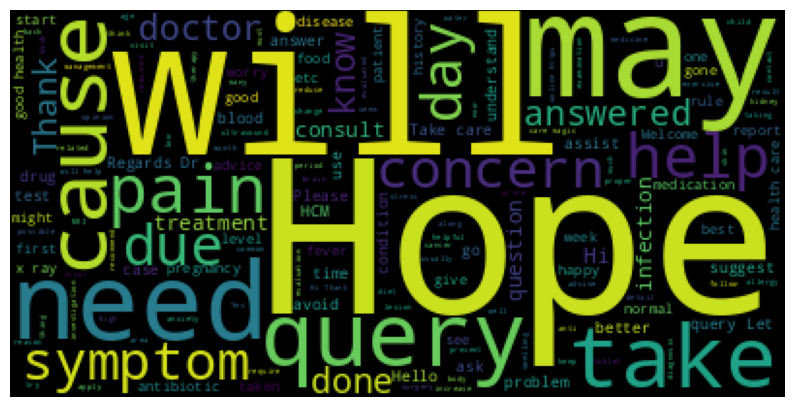

time: 863 ms (started: 2024-04-29 14:52:25 +00:00)


In [ ]:
# Generate Wordcloud to visualize Human word pattern
wordcloud=WordCloud().generate(str(X_train[(y_train['ai-generated']==0)&(y_train['type']=='medicine')].values))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

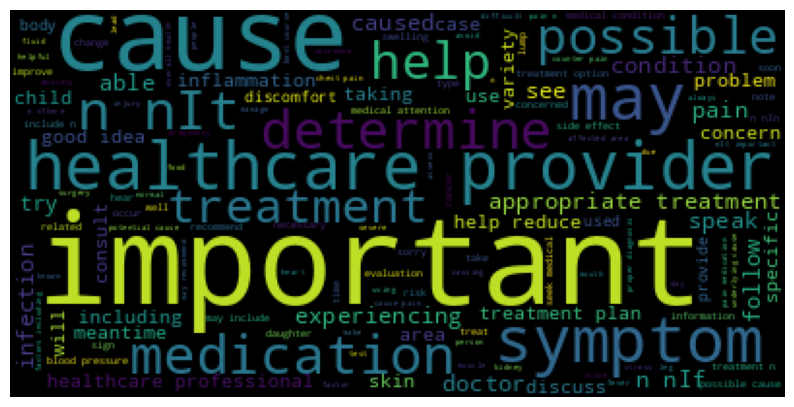

time: 1.09 s (started: 2024-04-29 14:52:27 +00:00)


In [ ]:
# Generate Wordcloud to visualize AI word pattern
wordcloud=WordCloud().generate(str(X_train[(y_train['ai-generated']==1)&(y_train['type']=='medicine')].values))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Get number of records of minority class
sample = len(raw_df[raw_df['ai-generated'] == 1])

time: 6.95 ms (started: 2024-05-07 11:36:12 +00:00)


In [ ]:
# Downsample human's response
filtered_df = raw_df[raw_df['ai-generated'] == 0]
downsampled_df = filtered_df.sample(n=sample, random_state=42)
raw_df = pd.concat([downsampled_df, raw_df[raw_df['ai-generated'] == 1]], ignore_index=True)

time: 17.6 ms (started: 2024-05-07 11:36:13 +00:00)


In [ ]:
X_train, X_val, y_train, y_val, X_test_raw, y_test_raw = _split_test_set(raw_df, test_size=0.2, validation_size=0.2)

time: 20 ms (started: 2024-05-07 11:36:14 +00:00)


In [ ]:
print(Counter(raw_df['ai-generated']))

Counter({0: 26903, 1: 26903})
time: 18.6 ms (started: 2024-05-07 09:00:07 +00:00)


In [ ]:
print(Counter(y_train['ai-generated']))
print(Counter(y_test_raw['ai-generated']))
print(Counter(y_val['ai-generated']))

Counter({1: 16168, 0: 16115})
Counter({1: 5401, 0: 5361})
Counter({0: 5427, 1: 5334})
time: 13.3 ms (started: 2024-05-07 08:59:59 +00:00)


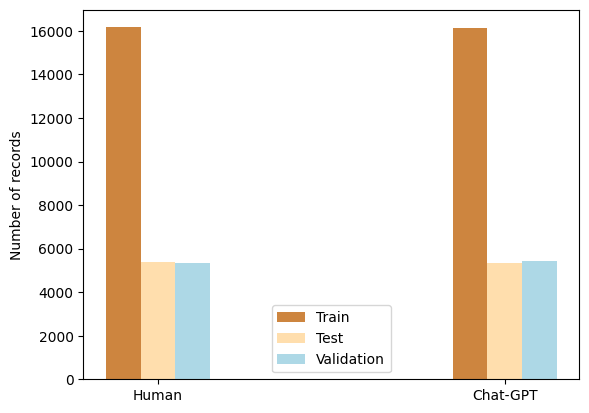

time: 183 ms (started: 2024-04-29 14:55:09 +00:00)


In [ ]:
# Count records for each subset
train_counter = Counter(y_train['ai-generated'])
test_counter = Counter(y_test_raw['ai-generated'])
val_counter = Counter(y_val['ai-generated'])

# Get record count
labels = list(train_counter.keys())
train_counts = list(train_counter.values())
test_counts = [test_counter[label] for label in labels]
val_counts = [val_counter[label] for label in labels]

# chart's config
bar_width = 0.1
index = range(len(labels))

# Plot record count for each subset
plt.bar(index, train_counts, bar_width, label='Train', color='peru')
plt.bar([i + bar_width for i in index], test_counts, bar_width, label='Test', color='navajowhite')
plt.bar([i + 2 * bar_width for i in index], val_counts, bar_width, label='Validation', color='lightblue')

plt.ylabel('Number of records')
plt.xticks([i + bar_width for i in index], ['Human', 'Chat-GPT'])
plt.legend()
plt.show()

In [ ]:
# Perform data preprocesing
df = _data_cleaning(raw_df)

# Split into train-test-validation set
X_train, X_val, y_train, y_val, X_test, y_test = _split_test_set(df, test_size=0.2, validation_size=0.2)

time: 1min 1s (started: 2024-05-07 11:36:17 +00:00)


In [ ]:
# Visualize stopwords trend of both human and AI generated response
df['stopwords_per_tokens'] = df['stopwords_count']/df['tokens_count']

time: 2.41 ms (started: 2024-04-29 14:56:28 +00:00)


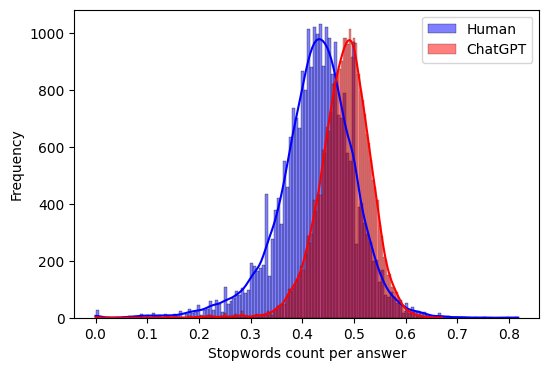

time: 1.23 s (started: 2024-04-29 14:56:28 +00:00)


In [ ]:
plt.figure(figsize=(6, 4))

# Histogram Plot for number of stopwords found in Human and ChatGPT text
sns.histplot(df[df['ai-generated']==0]['stopwords_per_tokens'], color='blue', label='Human', kde=True)
sns.histplot(df[df['ai-generated']==1]['stopwords_per_tokens'], color='red', label='ChatGPT', kde=True)

# Add labels and title
plt.xlabel('Stopwords count per answer')
plt.ylabel('Frequency')

# Show legend
plt.legend()
plt.show()

In [ ]:
# Calculate an average of number of word in each data source

# Average for overall dataset
ai_length_mean = (df[df['ai-generated']==1]['tokens_count']).mean()
human_length_mean = (df[df['ai-generated']==0]['tokens_count']).mean()

# Average for each dataset from different sources
ai_length_fin_mean = (df[(df['ai-generated']==1)&(df['type']=='finance')]['tokens_count']).mean()
human_length_fin_mean = (df[(df['ai-generated']==0)&(df['type']=='finance')]['tokens_count']).mean()

ai_length_med_mean = (df[(df['ai-generated']==1)&(df['type']=='medicine')]['tokens_count']).mean()
human_length_med_mean = (df[(df['ai-generated']==0)&(df['type']=='medicine')]['tokens_count']).mean()

ai_length_openqa_mean = (df[(df['ai-generated']==1)&(df['type']=='open_qa')]['tokens_count']).mean()
human_length_openqa_mean = (df[(df['ai-generated']==0)&(df['type']=='open_qa')]['tokens_count']).mean()

ai_length_reddit_mean = (df[(df['ai-generated']==1)&(df['type']=='reddit_eli5')]['tokens_count']).mean()
human_length_reddit_mean = (df[(df['ai-generated']==0)&(df['type']=='reddit_eli5')]['tokens_count']).mean()

ai_length_wiki_mean = (df[(df['ai-generated']==1)&(df['type']=='wiki_csai')]['tokens_count']).mean()
human_length_wiki_mean = (df[(df['ai-generated']==0)&(df['type']=='wiki_csai')]['tokens_count']).mean()

time: 81.1 ms (started: 2024-04-29 14:56:29 +00:00)


In [ ]:
print(f"ai_length_mean : {ai_length_mean}")
print(f"human_length_mean : {human_length_mean}")
print(f"ai_length_fin_mean : {ai_length_fin_mean}")
print(f"human_length_fin_mean : {human_length_fin_mean}")
print(f"ai_length_med_mean : {ai_length_med_mean}")
print(f"human_length_med_mean : {human_length_med_mean}")
print(f"ai_length_openqa_mean : {ai_length_openqa_mean}")
print(f"human_length_openqa_mean : {human_length_openqa_mean}")
print(f"ai_length_reddit_mean : {ai_length_reddit_mean}")
print(f"human_length_reddit_mean : {human_length_reddit_mean}")
print(f"ai_length_wiki_mean : {ai_length_wiki_mean}")
print(f"human_length_wiki_mean : {human_length_wiki_mean}")

ai_length_mean : 173.06928595323942
human_length_mean : 133.11099133925583
ai_length_fin_mean : 203.793915167666
human_length_fin_mean : 170.55133928571428
ai_length_med_mean : 186.40239341810022
human_length_med_mean : 82.05061082024433
ai_length_openqa_mean : 117.8562201628756
human_length_openqa_mean : 32.78984238178634
ai_length_reddit_mean : 174.8762905162065
human_length_reddit_mean : 132.98129929607327
ai_length_wiki_mean : 185.3372921615202
human_length_wiki_mean : 191.56883116883117
time: 1.45 ms (started: 2024-04-29 14:56:30 +00:00)


# Baseline I : Random Prediction

In [ ]:
# Initialize random guess model
class RandomGuessClassifier:

    def predict(self, X, y):
        np.random.seed(42)
        return np.random.choice([0, 1], size=len(X))

time: 674 µs (started: 2024-05-05 18:35:45 +00:00)


In [ ]:
model_path = 'random_guess_model.pkl'

# Save model
with open(f'{MODEL_PATH}/{model_path}', 'wb') as file:
    pickle.dump(RandomGuessClassifier, file)

              precision    recall  f1-score   support

           0       0.49      0.50      0.50      5361
           1       0.50      0.49      0.50      5401

    accuracy                           0.50     10762
   macro avg       0.50      0.50      0.50     10762
weighted avg       0.50      0.50      0.50     10762



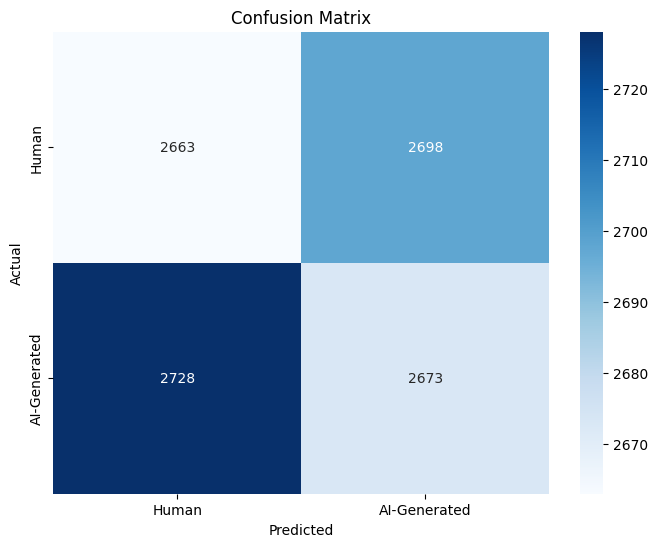

time: 326 ms (started: 2024-05-05 18:35:56 +00:00)


In [ ]:
# Evaluate on test set
y_pred = RandomGuessClassifier().predict(X_test, y_test['ai-generated'])
_performance_matrix(y_test['ai-generated'], y_pred)

# Baseline II : Majority Prediction

In [ ]:
# Initialize majority prediction model
class MajorityClassifier:

    # The model will predict based on the majority label in y test
    def predict(self, X, y):
        majority_class = y['ai-generated'].value_counts().sort_values(ascending=False).index.tolist()[0]

        return np.full(len(X), majority_class)

time: 718 µs (started: 2024-05-05 18:37:12 +00:00)


In [ ]:
model_path = 'majority_model.pkl'

# Save model
with open(f'{MODEL_PATH}/{model_path}', 'wb') as file:
    pickle.dump(MajorityClassifier, file)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5361
           1       0.50      1.00      0.67      5401

    accuracy                           0.50     10762
   macro avg       0.25      0.50      0.33     10762
weighted avg       0.25      0.50      0.34     10762



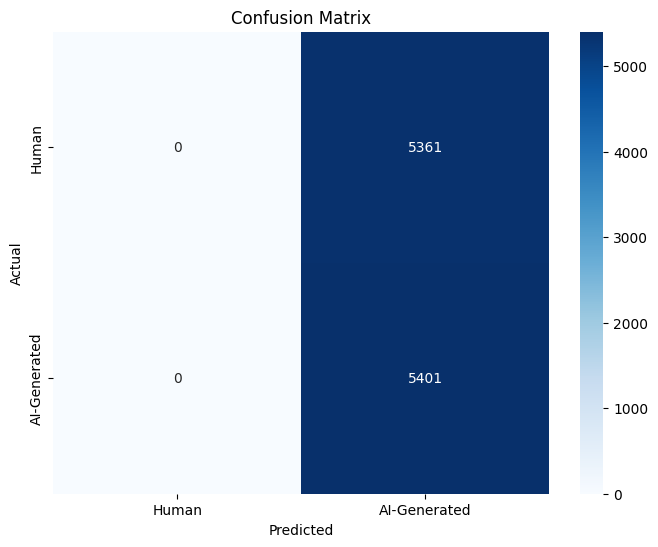

time: 262 ms (started: 2024-05-05 18:38:30 +00:00)


In [ ]:
# Evaluate model's performance on test set
y_pred = MajorityClassifier().predict(X_test, y_test)
_performance_matrix(y_test['ai-generated'], y_pred)

# Random Forest

In [ ]:
# Initialize Random Forest model
def _random_forest(tfidf=False, ngram_range=(1,1), fn=None):

    # Use CountVectorizer with TFIDF
    if tfidf:
      pipeline = Pipeline([
          ('vect', CountVectorizer(ngram_range=ngram_range)),
          ('tfidf', TfidfTransformer()),
          ('clf', RandomForestClassifier())
      ])

    # Use CountVectorizer alone
    else:
      pipeline = Pipeline([
          ('vect', CountVectorizer(ngram_range=ngram_range)),
          ('clf', RandomForestClassifier())
      ])

    # Hyperparameters grid
    param_grid = {
        'clf__n_estimators': [10, 50, 100],
        'clf__max_depth': [10, 20],
        'clf__min_samples_split': [2, 5, 10]
    }

    print("Performing GridSearchCV..")
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

    # Fit grid search
    grid_search.fit(X_train, y_train['ai-generated'])

    # Get best params
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Re-train model with best params
    if tfidf:
        best_clf = Pipeline([
            ('vect', CountVectorizer(ngram_range=ngram_range)),
            ('tfidf', TfidfTransformer()),
            ('clf', RandomForestClassifier(n_estimators=best_params['clf__n_estimators'],
                                           max_depth=best_params['clf__max_depth'],
                                           min_samples_split=best_params['clf__min_samples_split']))
        ])
    else:
        best_clf = Pipeline([
            ('vect', CountVectorizer(ngram_range=ngram_range)),
            ('clf', RandomForestClassifier(n_estimators=best_params['clf__n_estimators'],
                                           max_depth=best_params['clf__max_depth'],
                                           min_samples_split=best_params['clf__min_samples_split']))
        ])

    print("Retrain model with best parameters ..")
    best_clf.fit(X_train, y_train['ai-generated'])

    # Save the best model
    dump(best_clf, f'{MODEL_PATH}/RandomForest_{fn}.joblib')
    print(f"Best model saved to {MODEL_PATH}/RandomForest_{fn}.joblib")

    # Predict train set
    y_pred_train = best_clf.predict(X_train)
    _performance_matrix(y_train['ai-generated'], y_pred_train)

time: 2.06 ms (started: 2024-04-30 09:25:40 +00:00)


In [ ]:
def _evaluate_model(fn, source=None):

    # Load saved model
    clf = load(f'{MODEL_PATH}/RandomForest_{fn}.joblib')

    # Predict test set
    y_pred_test = clf.predict(X_test)
    _performance_matrix(y_test['ai-generated'], y_pred_test)

    # Evaluate each type
    _evaluate_each_type(y_test, y_pred_test)

    # Get example of wrong prediction
    _get_wrong_prediction(y_pred_test, source=source)

time: 714 µs (started: 2024-05-07 11:23:13 +00:00)


#### Unigram

Performing GridSearchCV..
Best Hyperparameters: {'clf__max_depth': 20, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Retrain model with best parameters ..
Best model saved to drive/My Drive/Colab Notebooks/Natural Language Processing/Project/Models/RandomForest_unigram.joblib
              precision    recall  f1-score   support

           0       0.90      0.98      0.93     16115
           1       0.98      0.89      0.93     16168

    accuracy                           0.93     32283
   macro avg       0.94      0.93      0.93     32283
weighted avg       0.94      0.93      0.93     32283



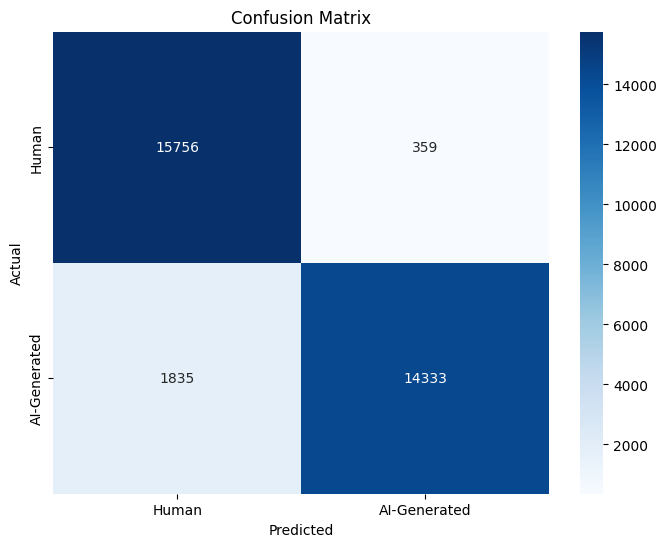

time: 7min 14s (started: 2024-04-30 09:41:04 +00:00)


In [ ]:
# Remove Stopwords
_random_forest(tfidf=False, fn='unigram')

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5361
           1       0.95      0.88      0.91      5401

    accuracy                           0.92     10762
   macro avg       0.92      0.92      0.92     10762
weighted avg       0.92      0.92      0.92     10762



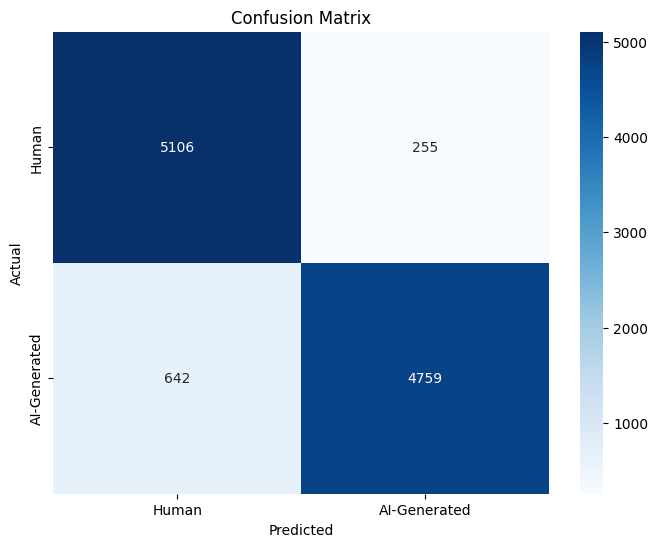

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4709
           1       0.96      0.90      0.93      3399

    accuracy                           0.94      8108
   macro avg       0.95      0.94      0.94      8108
weighted avg       0.94      0.94      0.94      8108



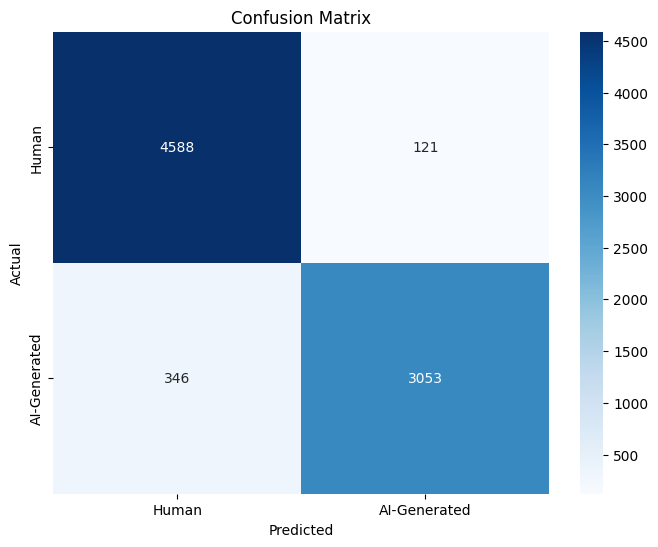

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        98
           1       0.97      0.97      0.97       270

    accuracy                           0.96       368
   macro avg       0.94      0.95      0.94       368
weighted avg       0.96      0.96      0.96       368



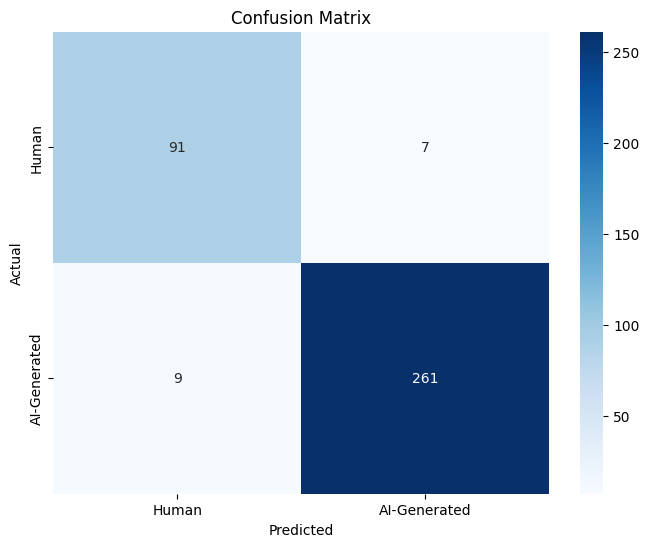

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       349
           1       0.91      0.97      0.94       875

    accuracy                           0.91      1224
   macro avg       0.91      0.87      0.89      1224
weighted avg       0.91      0.91      0.91      1224



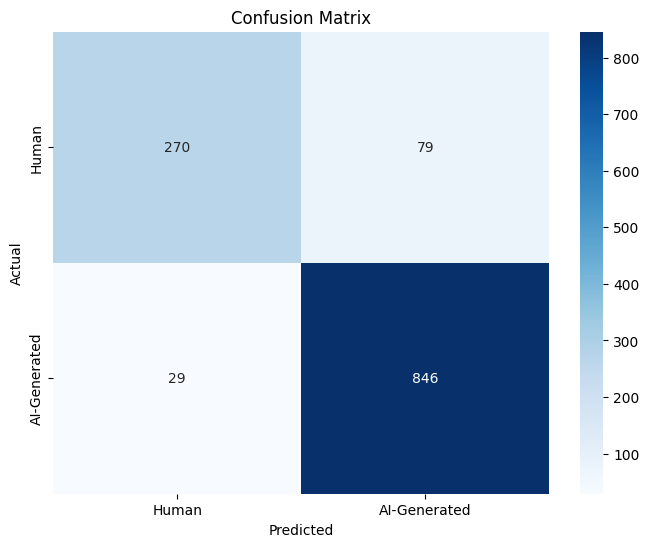

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.98      0.49       125
           1       0.99      0.63      0.77       690

    accuracy                           0.69       815
   macro avg       0.66      0.80      0.63       815
weighted avg       0.89      0.69      0.73       815



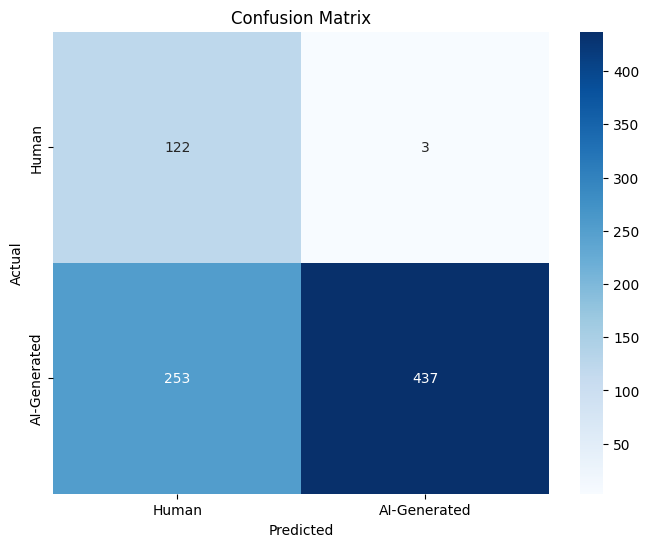

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.44      0.58        80
           1       0.78      0.97      0.87       167

    accuracy                           0.80       247
   macro avg       0.83      0.70      0.72       247
weighted avg       0.81      0.80      0.77       247



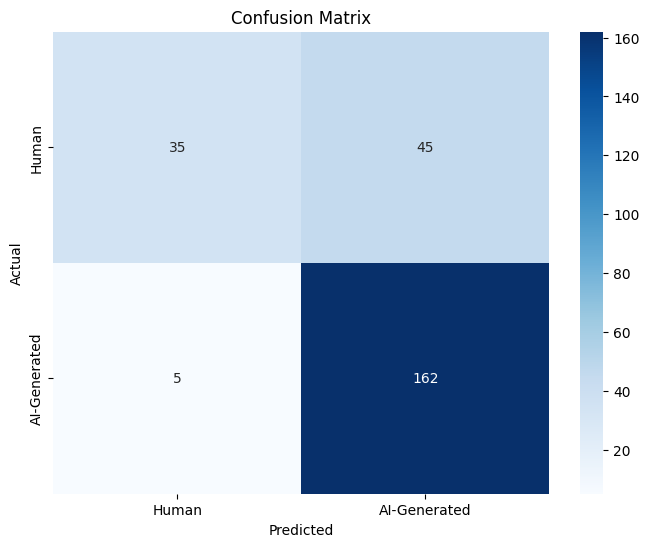

Processed Text: yes object could suspended two massive object space star planet object would attracted massive object due force gravity object would necessarily rest would stable orbit around center mass two object similar earth orbit sun earth attracted sun due gravity also moving certain speed keep falling sun instead follows stable orbit around sun
True Label: 1
Predicted Label: 0
Processed Text: live scotland like add addition usual healthcare service also receive free prescription eyeglass dental supplemented entirely free example regular filling cost around tooth coloured filling cost unless filling one front teeth subsidised price regular one vision test also free every two year
True Label: 0
Predicted Label: 1
Processed Text: escapism one average life andor entertainment reason people watch movie play video game read novel celebrity life like reality show people want like tracking life important imitating style clothes manner habit reason geek like reading quirky habit daily ro

In [ ]:
# Remove Stopwords
_evaluate_model('unigram')

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5361
           1       0.94      0.93      0.94      5401

    accuracy                           0.94     10762
   macro avg       0.94      0.94      0.94     10762
weighted avg       0.94      0.94      0.94     10762



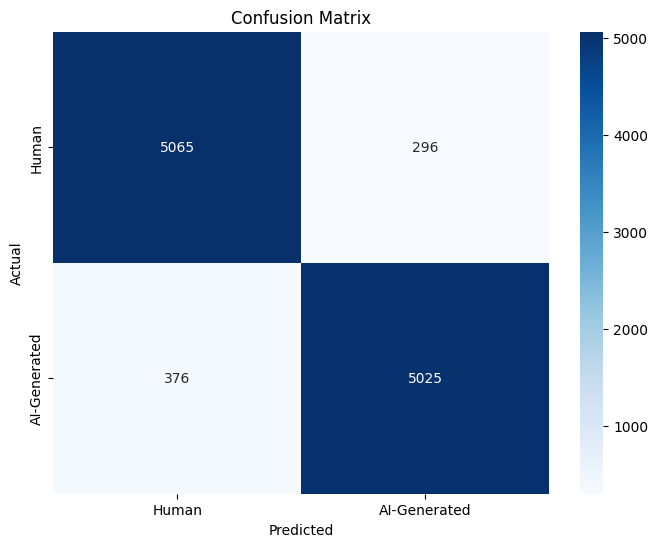

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4716
           1       0.95      0.96      0.95      3343

    accuracy                           0.96      8059
   macro avg       0.96      0.96      0.96      8059
weighted avg       0.96      0.96      0.96      8059



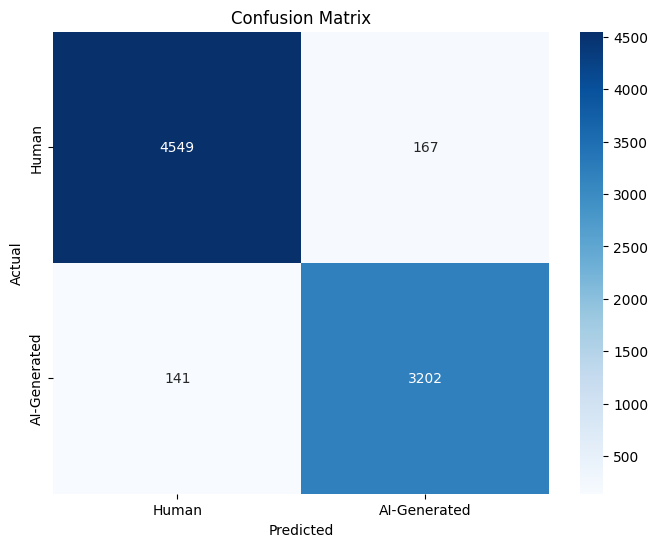

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       359
           1       0.92      0.97      0.94       903

    accuracy                           0.92      1262
   macro avg       0.91      0.88      0.90      1262
weighted avg       0.92      0.92      0.92      1262



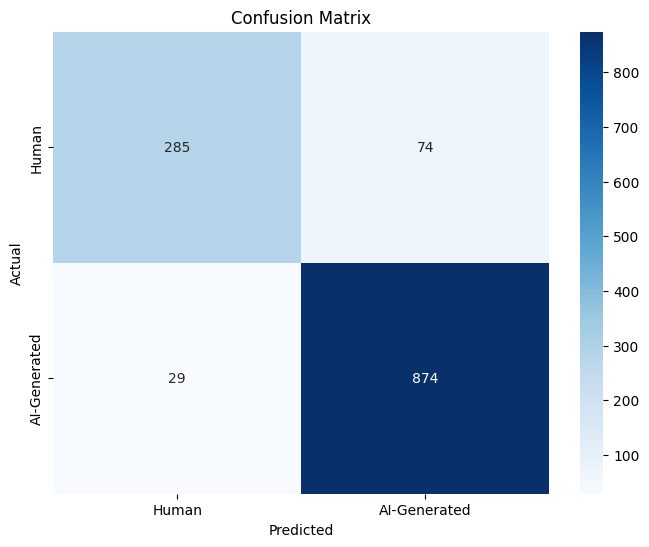

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.34      0.98      0.50       103
           1       1.00      0.72      0.83       699

    accuracy                           0.75       802
   macro avg       0.67      0.85      0.67       802
weighted avg       0.91      0.75      0.79       802



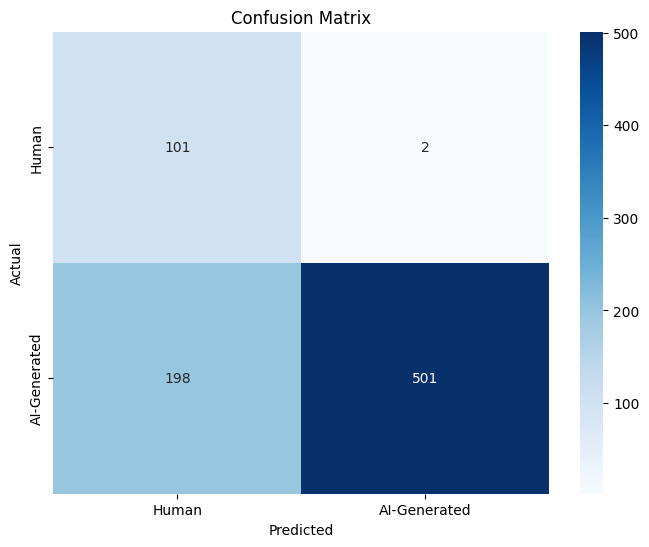

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.43      0.60        69
           1       0.82      0.99      0.90       173

    accuracy                           0.83       242
   macro avg       0.89      0.71      0.75       242
weighted avg       0.86      0.83      0.81       242



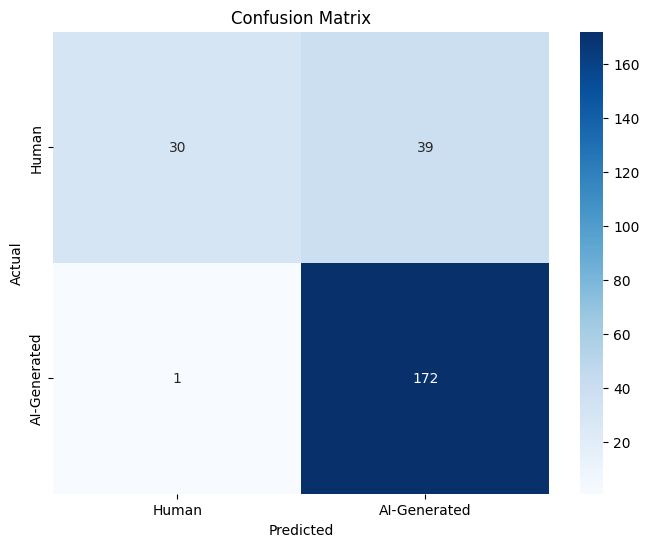

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       114
           1       0.95      0.98      0.96       283

    accuracy                           0.95       397
   macro avg       0.94      0.93      0.93       397
weighted avg       0.95      0.95      0.95       397



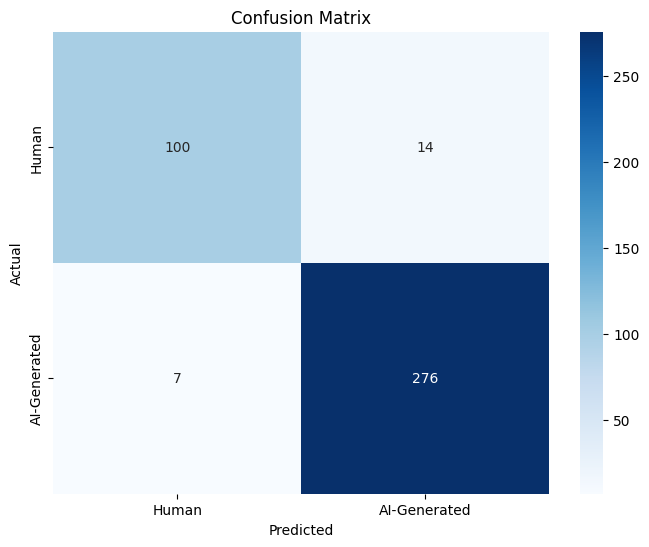

Processed Text: logic programming is a programming paradigm which is largely based on formal logic any program written in a logic programming language is a set of sentence in logical form expressing fact and rule about some problem domain major logic programming language family include prolog answer set programming asp and datalog in all of these language rule are written in the form of clause and are read declaratively a logical implication h is called the head of the rule and b bn is called the body fact are rule that have no body and are written in the simplified form in the simplest case in which h b bn are all atomic formula these clause are called definite clause or horn clause however there are many extension of this simple case the most important one being the case in which condition in the body of a clause can also be negation of atomic formula logic programming language that include this extension have the knowledge representation capability of a nonmonotonic logic in asp and

In [ ]:
# with stopwords
_evaluate_model('unigram_keep_stopwords')

LIME

In [ ]:
!pip install lime
from lime.lime_text import LimeTextExplainer

In [ ]:
X = """"i know this is eli but i d like to add that a with everything in english there is an exception while the vast majority of the time effect is a noun and affect is a verb they can both be used a the other part of speech with different meaning of course effect v to make or bring about to implement it s often used before change the best way to effect change is to work with existing stakeholder affect n obsolete one s mood or inclination mental state thth c obsolete a desire an appetite thth c psychology a subjective feeling experienced in response to a thought or other stimulus mood emotion especially a demonstrated in external physical sign from th c definition and example from url"""

# Load model
clf = load(f'{MODEL_PATH}/RandomForest_unigram_keep_stopwords.joblib')

# Explain instance and display in notebook using LIME
explainer = LimeTextExplainer(class_names=["Human", "AI"])
exp = explainer.explain_instance(X, clf.predict_proba).show_in_notebook()

time: 3.85 s (started: 2024-05-05 13:50:22 +00:00)


#### Bigram

Performing GridSearchCV..
Best Hyperparameters: {'clf__max_depth': 20, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Retrain model with best parameters ..
Best model saved to drive/My Drive/Colab Notebooks/Natural Language Processing/Project/Models/RandomForest_bigram.joblib
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     16115
           1       0.98      0.84      0.91     16168

    accuracy                           0.91     32283
   macro avg       0.92      0.91      0.91     32283
weighted avg       0.92      0.91      0.91     32283



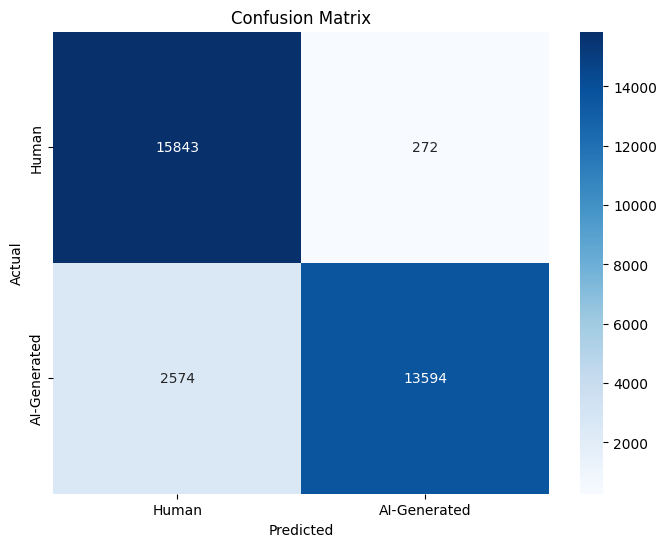

time: 27min 15s (started: 2024-04-30 11:25:32 +00:00)


In [ ]:
_random_forest(tfidf=False, ngram_range=(2,2), fn='bigram')

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5361
           1       0.96      0.84      0.89      5401

    accuracy                           0.90     10762
   macro avg       0.90      0.90      0.90     10762
weighted avg       0.90      0.90      0.90     10762



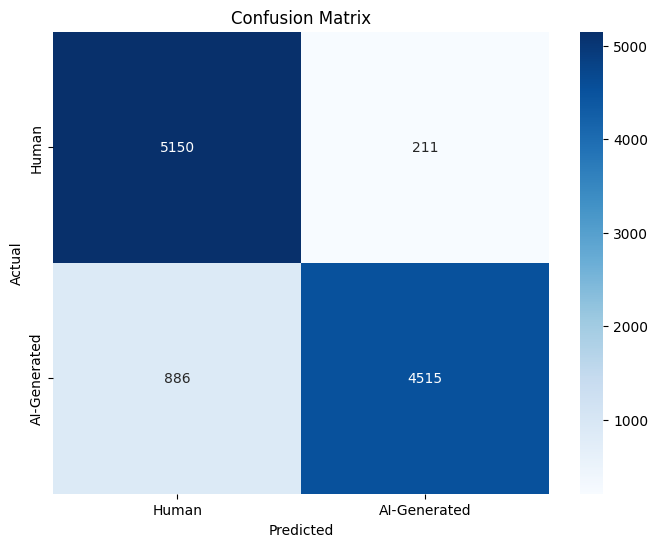

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4716
           1       0.96      0.86      0.91      3343

    accuracy                           0.93      8059
   macro avg       0.94      0.92      0.93      8059
weighted avg       0.93      0.93      0.93      8059



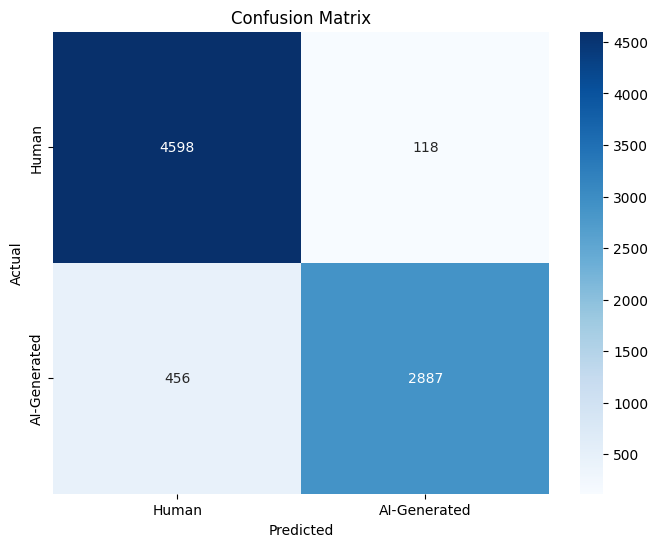

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       359
           1       0.93      0.95      0.94       903

    accuracy                           0.91      1262
   macro avg       0.90      0.89      0.89      1262
weighted avg       0.91      0.91      0.91      1262



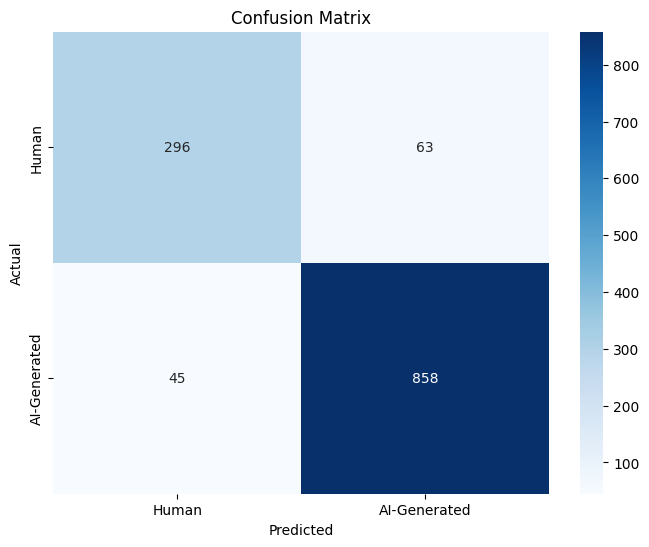

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.22      1.00      0.36       103
           1       1.00      0.48      0.65       699

    accuracy                           0.55       802
   macro avg       0.61      0.74      0.51       802
weighted avg       0.90      0.55      0.61       802



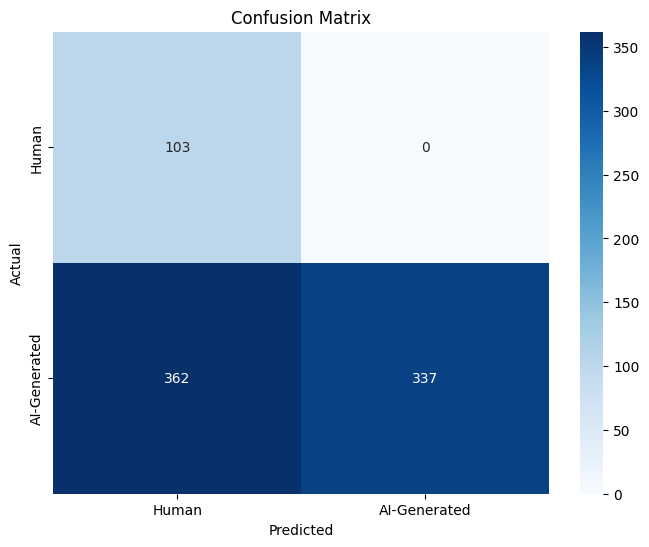

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        69
           1       0.89      0.91      0.90       173

    accuracy                           0.85       242
   macro avg       0.82      0.81      0.81       242
weighted avg       0.85      0.85      0.85       242



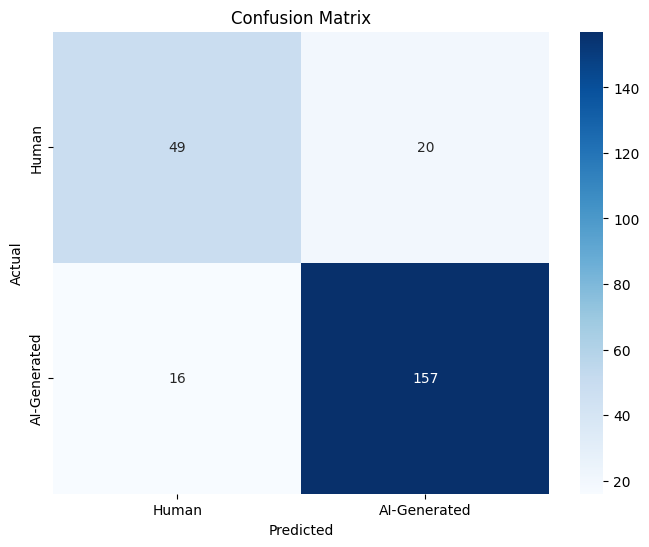

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       114
           1       0.97      0.98      0.97       283

    accuracy                           0.96       397
   macro avg       0.95      0.94      0.95       397
weighted avg       0.96      0.96      0.96       397



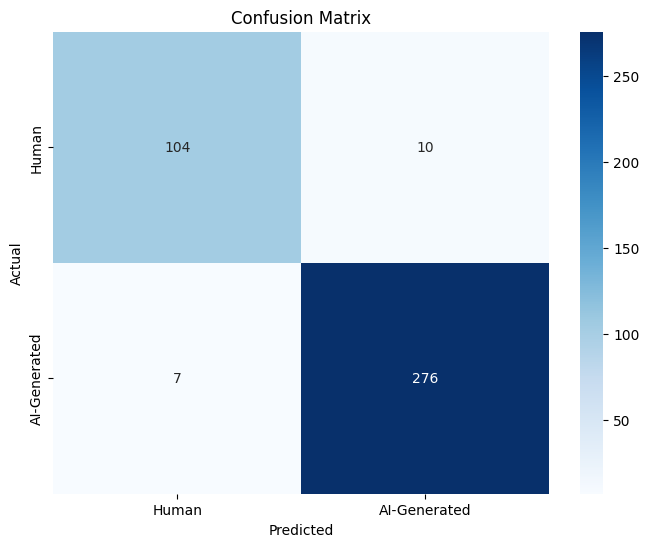

Processed Text: singapore currency is the singapore dollar the currency is abbreviated a sgd and is represented by the symbol or s to differentiate it from other dollardenominated currency the singapore dollar is issued and managed by the monetary authority of singapore the country central bank it is used a the official currency in singapore and is also accepted a legal tender in brunei the singapore dollar is divided into cent and is available in denomination of coin and banknote the coin come in denomination of cent cent cent cent and cent while the banknote come in denomination of and
True Label: 1
Predicted Label: 0
Processed Text: logic programming is a programming paradigm which is largely based on formal logic any program written in a logic programming language is a set of sentence in logical form expressing fact and rule about some problem domain major logic programming language family include prolog answer set programming asp and datalog in all of these language rule are writt

In [ ]:
_evaluate_model('bigram')

### 3 grams

Performing GridSearchCV..
Best Hyperparameters: {'clf__max_depth': 20, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}
Retrain model with best parameters ..
Best model saved to drive/My Drive/Colab Notebooks/Natural Language Processing/Project/Models/RandomForest_three-gram.joblib
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     16115
           1       0.99      0.74      0.85     16168

    accuracy                           0.87     32283
   macro avg       0.89      0.87      0.86     32283
weighted avg       0.89      0.87      0.86     32283



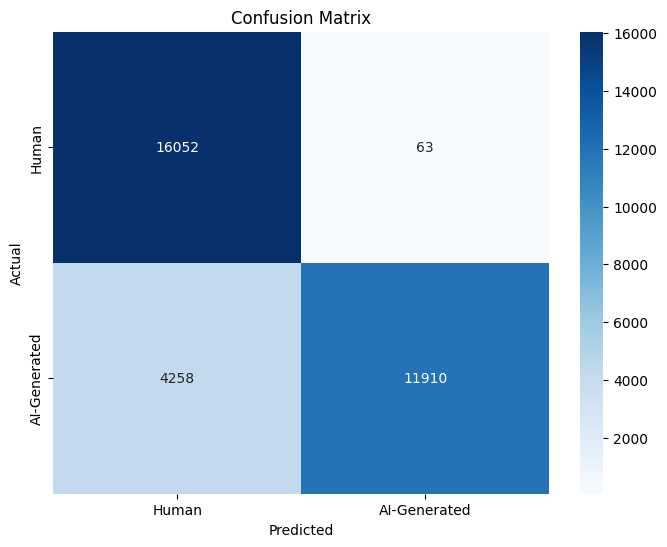

time: 41min 55s (started: 2024-04-30 11:53:05 +00:00)


In [ ]:
_random_forest(tfidf=False, ngram_range=(3,3), fn='three-gram')

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      5361
           1       0.98      0.74      0.84      5401

    accuracy                           0.86     10762
   macro avg       0.88      0.86      0.86     10762
weighted avg       0.88      0.86      0.86     10762



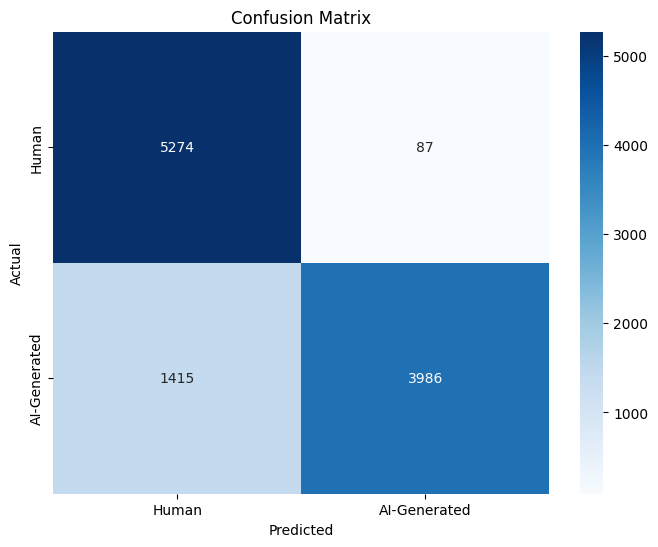

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      4716
           1       0.98      0.75      0.85      3343

    accuracy                           0.89      8059
   macro avg       0.91      0.87      0.88      8059
weighted avg       0.90      0.89      0.88      8059



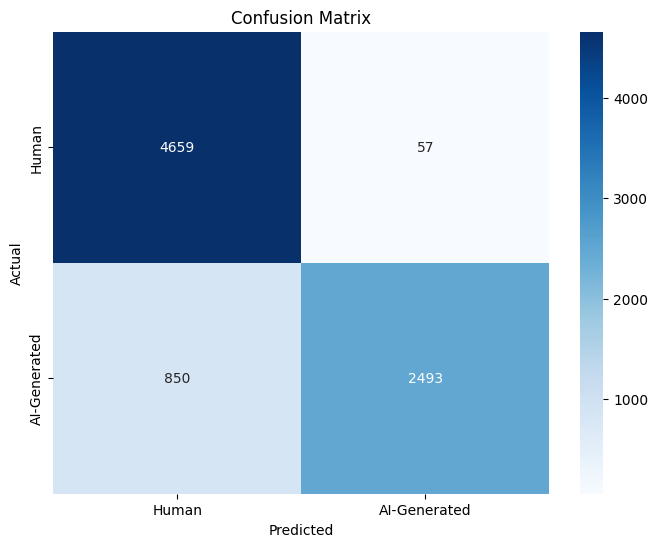

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       359
           1       0.97      0.93      0.95       903

    accuracy                           0.93      1262
   macro avg       0.91      0.93      0.92      1262
weighted avg       0.94      0.93      0.93      1262



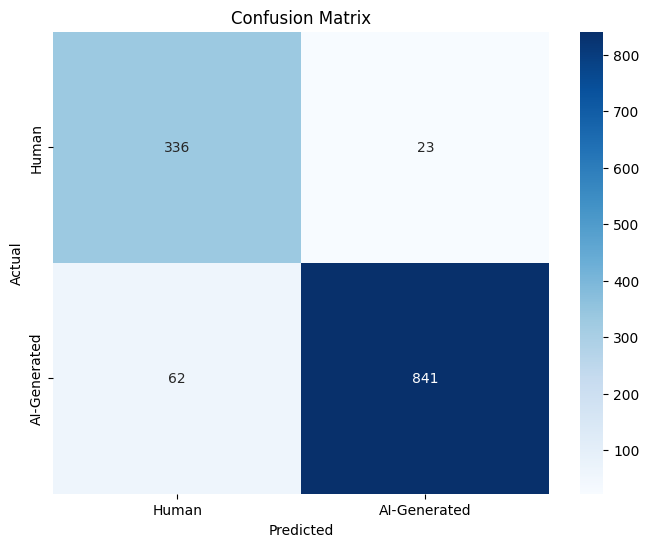

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.19      1.00      0.31       103
           1       1.00      0.35      0.52       699

    accuracy                           0.44       802
   macro avg       0.59      0.68      0.42       802
weighted avg       0.90      0.44      0.50       802



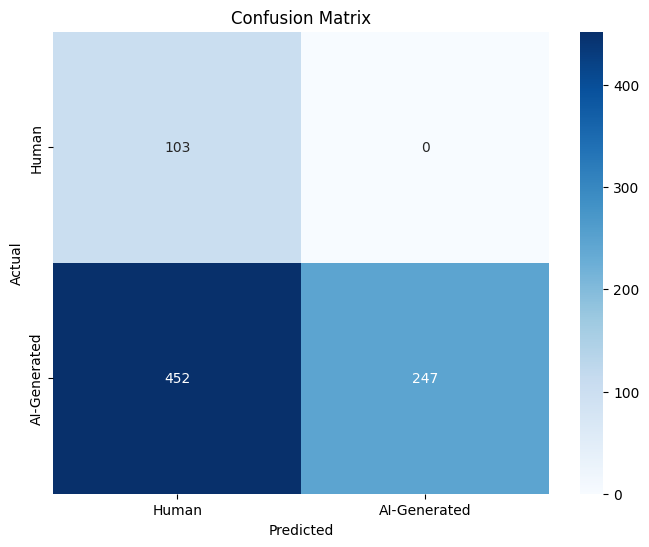

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.93      0.72        69
           1       0.96      0.75      0.84       173

    accuracy                           0.80       242
   macro avg       0.78      0.84      0.78       242
weighted avg       0.86      0.80      0.81       242



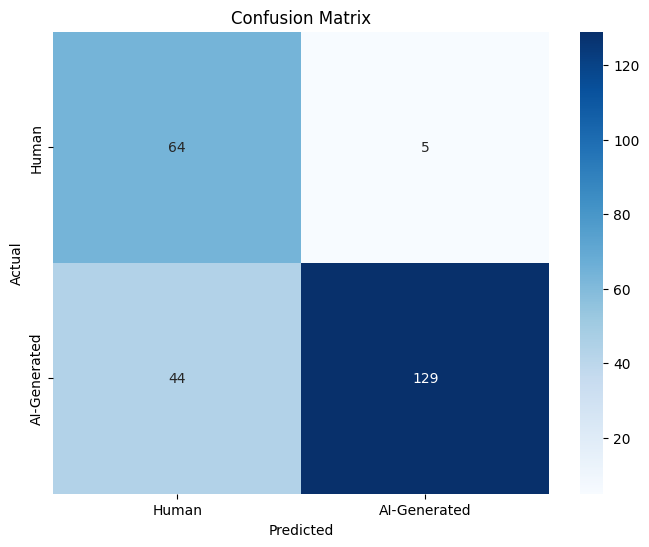

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       114
           1       0.99      0.98      0.98       283

    accuracy                           0.98       397
   macro avg       0.97      0.98      0.97       397
weighted avg       0.98      0.98      0.98       397



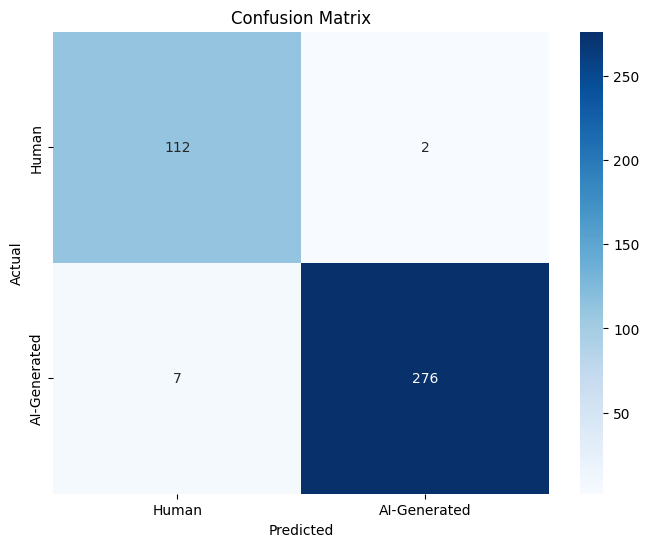

Processed Text: singapore currency is the singapore dollar the currency is abbreviated a sgd and is represented by the symbol or s to differentiate it from other dollardenominated currency the singapore dollar is issued and managed by the monetary authority of singapore the country central bank it is used a the official currency in singapore and is also accepted a legal tender in brunei the singapore dollar is divided into cent and is available in denomination of coin and banknote the coin come in denomination of cent cent cent cent and cent while the banknote come in denomination of and
True Label: 1
Predicted Label: 0
Processed Text: that line is called a signature line and it a place for you to sign your name when youre filling out a form or document the space below the signature line is reserved for use by the financial institution that is processing the form or document financial institution often need to make note or write down important information about the form or document so 

In [ ]:
_evaluate_model('three-gram')

### 4 grams

Performing GridSearchCV..
Best Hyperparameters: {'clf__max_depth': 20, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}
Retrain model with best parameters ..
Best model saved to drive/My Drive/Colab Notebooks/Natural Language Processing/Project/Models/RandomForest_four-gram.joblib
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     16115
           1       1.00      0.61      0.76     16168

    accuracy                           0.81     32283
   macro avg       0.86      0.81      0.80     32283
weighted avg       0.86      0.81      0.80     32283



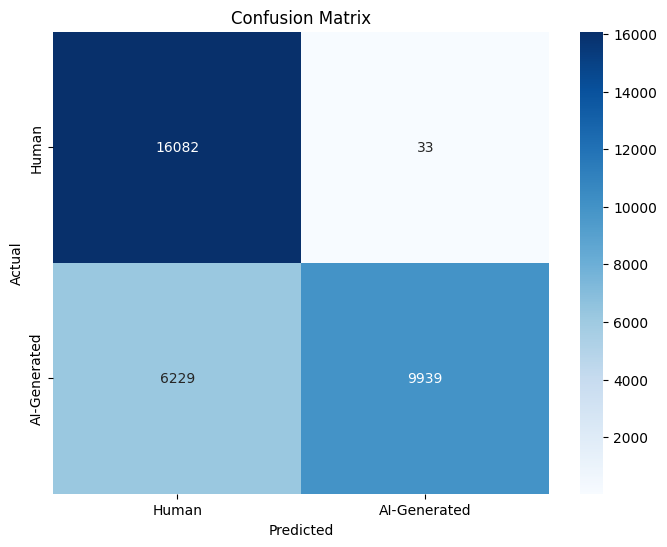

time: 51min 41s (started: 2024-04-30 12:35:29 +00:00)


In [ ]:
_random_forest(tfidf=False, ngram_range=(4,4), fn='four-gram')

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      5361
           1       0.99      0.61      0.75      5401

    accuracy                           0.80     10762
   macro avg       0.85      0.80      0.79     10762
weighted avg       0.85      0.80      0.79     10762



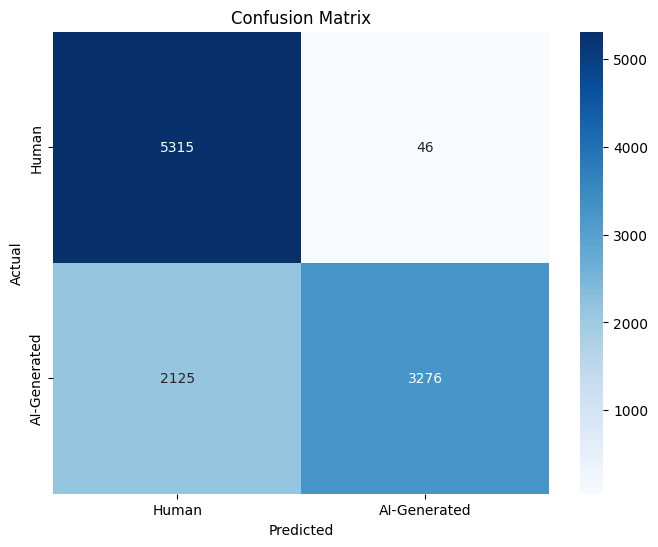

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      4716
           1       0.99      0.57      0.73      3343

    accuracy                           0.82      8059
   macro avg       0.88      0.78      0.80      8059
weighted avg       0.86      0.82      0.81      8059



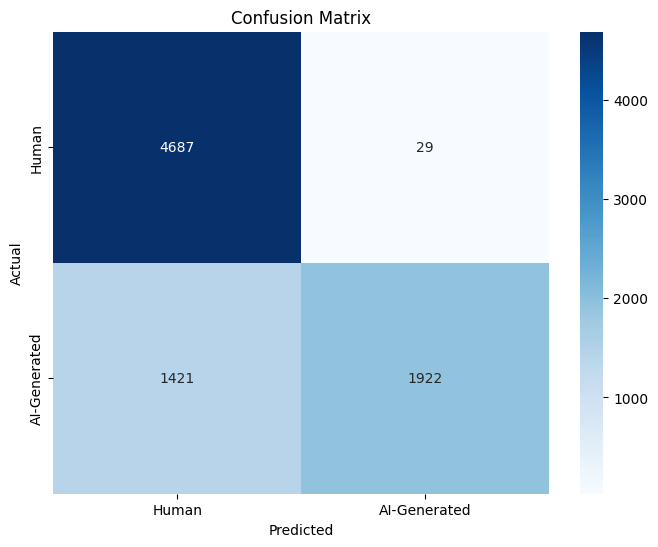

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       359
           1       0.98      0.88      0.93       903

    accuracy                           0.91      1262
   macro avg       0.87      0.92      0.89      1262
weighted avg       0.92      0.91      0.91      1262



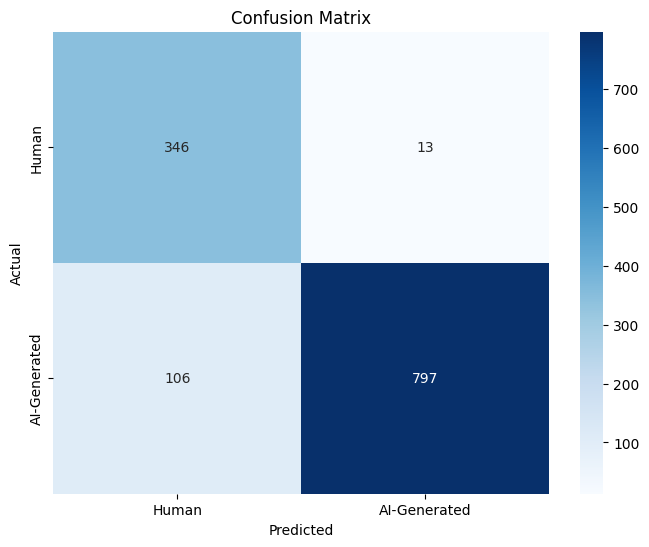

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.17      1.00      0.29       103
           1       1.00      0.27      0.42       699

    accuracy                           0.36       802
   macro avg       0.58      0.63      0.35       802
weighted avg       0.89      0.36      0.40       802



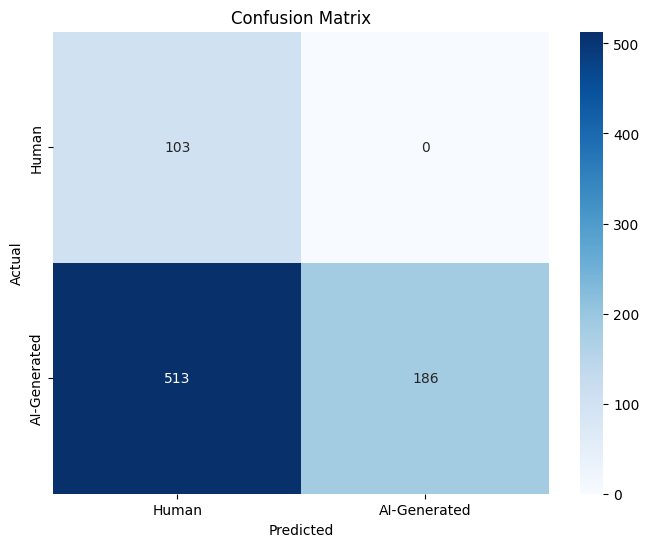

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.96      0.61        69
           1       0.97      0.53      0.69       173

    accuracy                           0.65       242
   macro avg       0.71      0.74      0.65       242
weighted avg       0.82      0.65      0.67       242



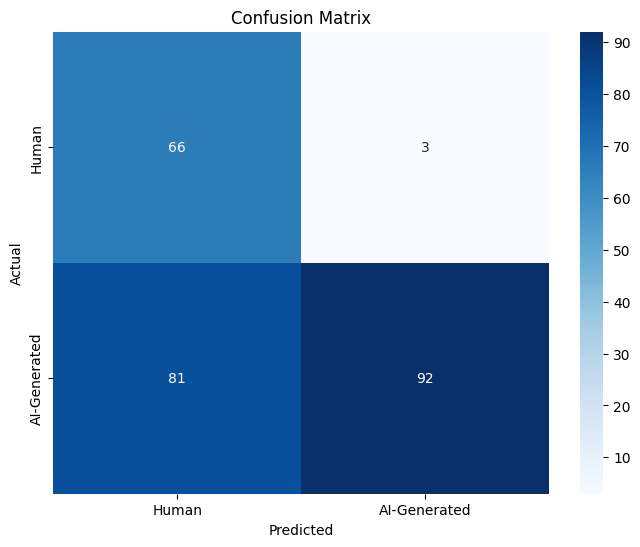

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       114
           1       1.00      0.99      0.99       283

    accuracy                           0.99       397
   macro avg       0.98      0.99      0.98       397
weighted avg       0.99      0.99      0.99       397



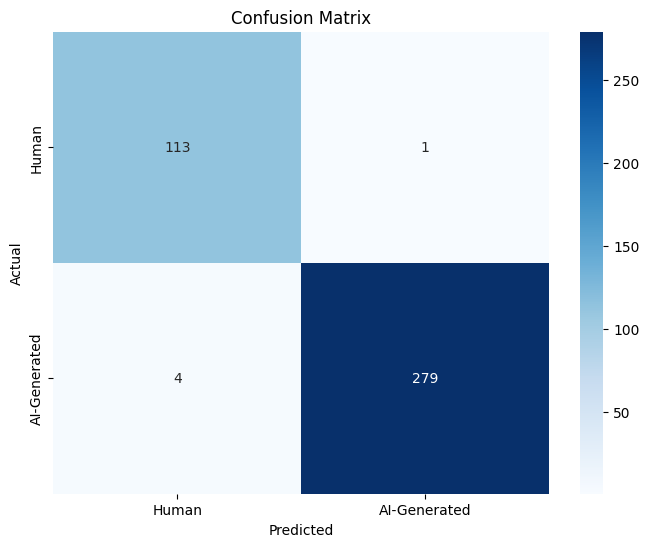

Processed Text: singapore currency is the singapore dollar the currency is abbreviated a sgd and is represented by the symbol or s to differentiate it from other dollardenominated currency the singapore dollar is issued and managed by the monetary authority of singapore the country central bank it is used a the official currency in singapore and is also accepted a legal tender in brunei the singapore dollar is divided into cent and is available in denomination of coin and banknote the coin come in denomination of cent cent cent cent and cent while the banknote come in denomination of and
True Label: 1
Predicted Label: 0
Processed Text: inventing new math is a very creative process that involves coming up with new idea and concept and then finding way to express those idea using mathematical language this can involve coming up with new symbol and rule for manipulating those symbol a well a new way of thinking about and understanding mathematical concept one way to invent new math is to 

In [ ]:
_evaluate_model('four-gram')

### 8 grams

Performing GridSearchCV..
Best Hyperparameters: {'clf__max_depth': 20, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Retrain model with best parameters ..
Best model saved to drive/My Drive/Colab Notebooks/Natural Language Processing/Project/Models/RandomForest_eight-gram.joblib
              precision    recall  f1-score   support

           0       0.57      1.00      0.73     16115
           1       1.00      0.26      0.41     16168

    accuracy                           0.63     32283
   macro avg       0.79      0.63      0.57     32283
weighted avg       0.79      0.63      0.57     32283



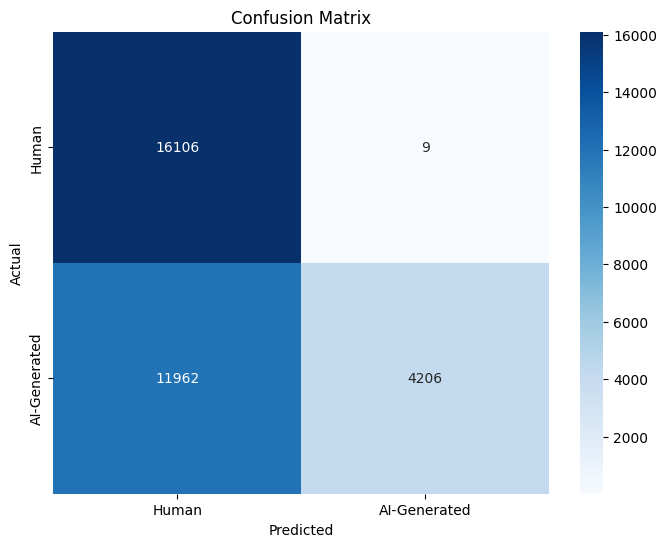

time: 54min 59s (started: 2024-04-30 13:27:43 +00:00)


In [ ]:
_random_forest(tfidf=False, ngram_range=(8,8), fn='eight-gram')

              precision    recall  f1-score   support

           0       0.57      1.00      0.72      5361
           1       1.00      0.24      0.39      5401

    accuracy                           0.62     10762
   macro avg       0.78      0.62      0.56     10762
weighted avg       0.78      0.62      0.56     10762



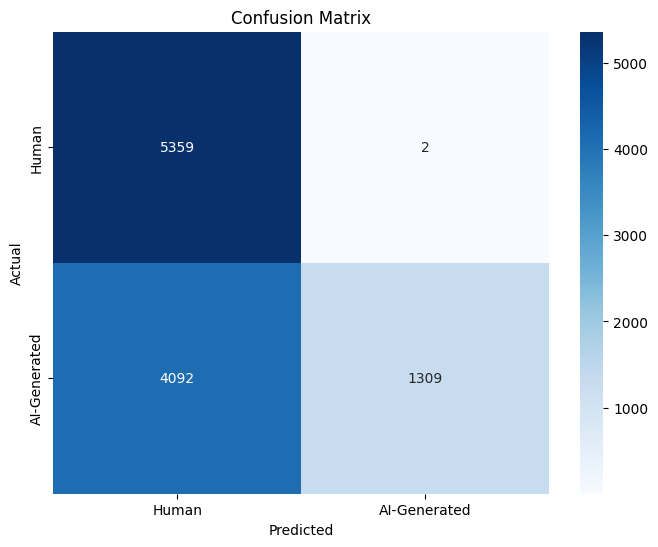

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      4716
           1       1.00      0.19      0.32      3343

    accuracy                           0.66      8059
   macro avg       0.82      0.60      0.55      8059
weighted avg       0.79      0.66      0.59      8059



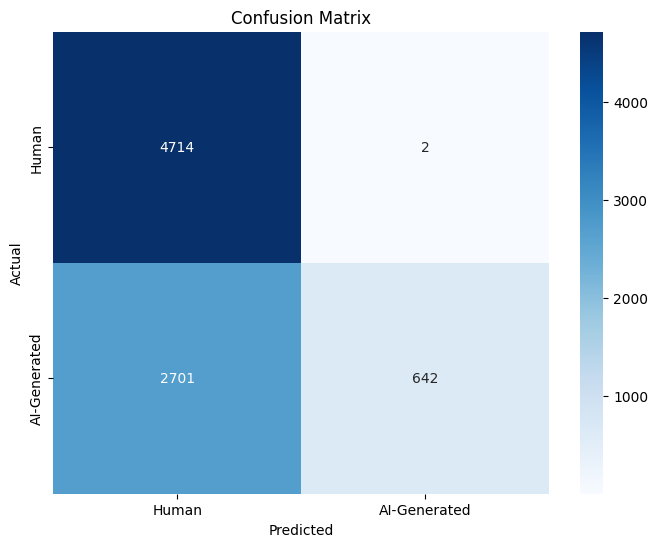

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.42      1.00      0.59       359
           1       1.00      0.45      0.62       903

    accuracy                           0.60      1262
   macro avg       0.71      0.72      0.60      1262
weighted avg       0.83      0.60      0.61      1262



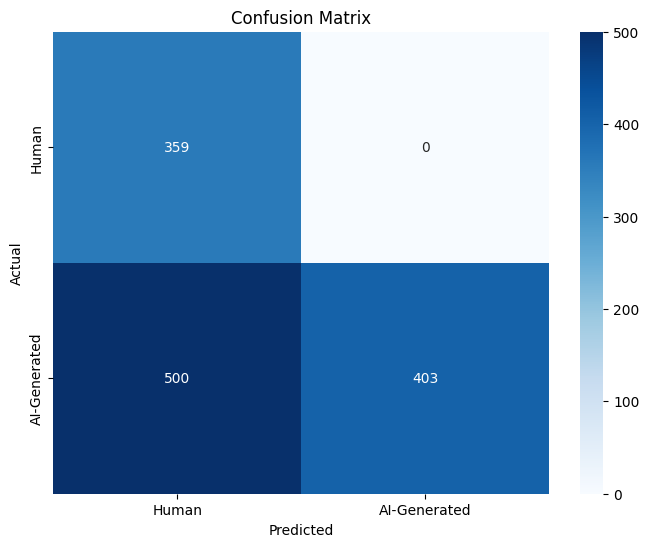

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.14      1.00      0.24       103
           1       1.00      0.08      0.15       699

    accuracy                           0.20       802
   macro avg       0.57      0.54      0.20       802
weighted avg       0.89      0.20      0.16       802



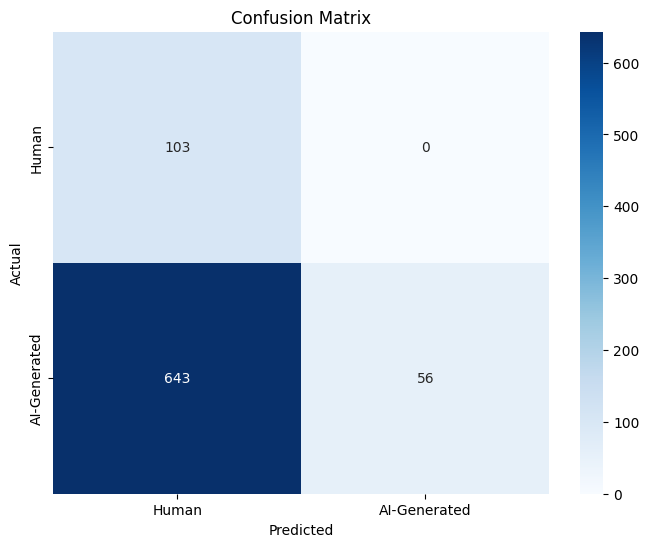

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.31      1.00      0.47        69
           1       1.00      0.10      0.19       173

    accuracy                           0.36       242
   macro avg       0.65      0.55      0.33       242
weighted avg       0.80      0.36      0.27       242



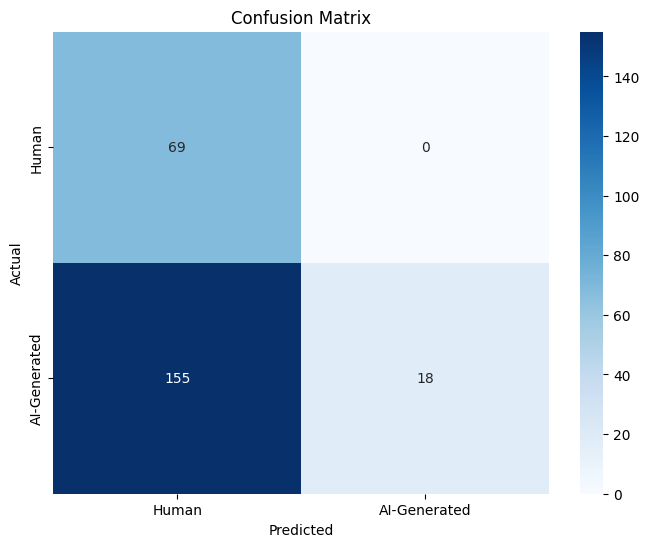

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       114
           1       1.00      0.67      0.80       283

    accuracy                           0.77       397
   macro avg       0.78      0.84      0.76       397
weighted avg       0.87      0.77      0.78       397



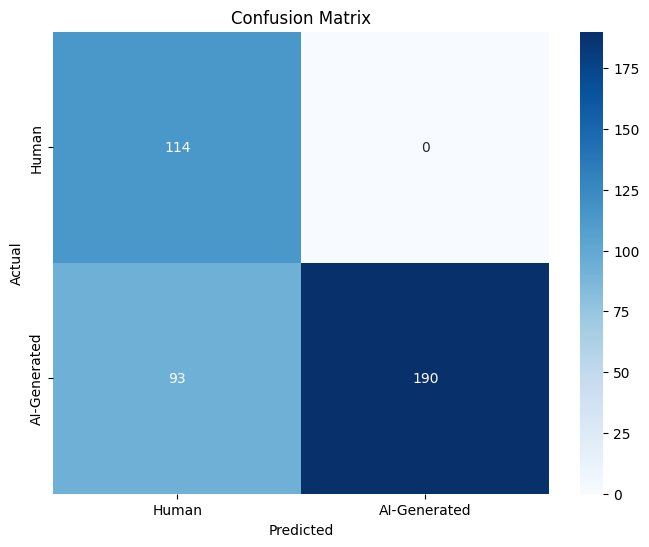

Processed Text: the u dollar is the official currency of the united state and is used a a medium of exchange for good and service it is considered legitimate because it is backed by the government of the united state which ha the power to tax and regulate it use this mean that people trust the u government to ensure that the value of the dollar remains stable and they are willing to accept it a payment for good and service bitcoin is a digital currency that is not backed by any government or central bank instead it is based on a decentralized network of computer that use complex algorithm to verify transaction and create new unit of the currency bitcoin is not considered a legitimate currency in the same way that the u dollar is because it is not backed by a government or other institution that ha the power to regulate it use however some people use bitcoin a a way to make financial transaction because it is fast secure and can be used anonymously
True Label: 1
Predicted Label: 0
Proce

In [ ]:
_evaluate_model('eight-gram')

### The combination of CountVectorizer and TF-IDF

Performing GridSearchCV..
Best Hyperparameters: {'clf__max_depth': 20, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}
Retrain model with best parameters ..
Best model saved to drive/My Drive/Colab Notebooks/Natural Language Processing/Project/Models/RandomForest_unigram-tfidf.joblib
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     16115
           1       0.97      0.92      0.94     16168

    accuracy                           0.95     32283
   macro avg       0.95      0.95      0.95     32283
weighted avg       0.95      0.95      0.95     32283



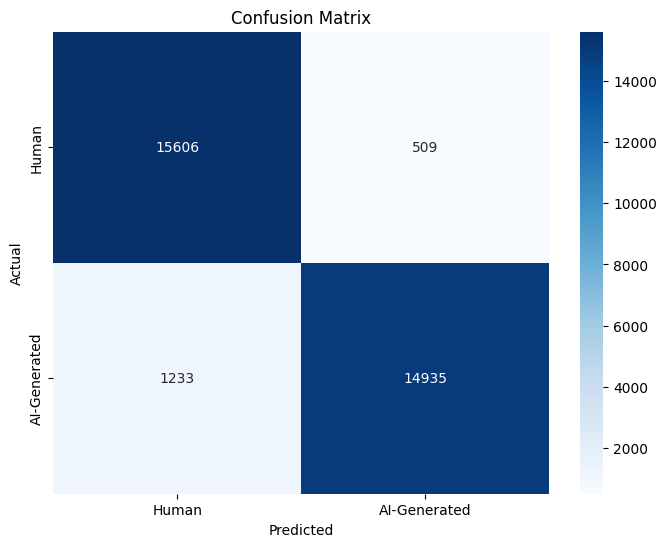

time: 12min 28s (started: 2024-04-30 14:24:15 +00:00)


In [ ]:
_random_forest(tfidf=True, fn='unigram-tfidf')

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5361
           1       0.94      0.92      0.93      5401

    accuracy                           0.93     10762
   macro avg       0.93      0.93      0.93     10762
weighted avg       0.93      0.93      0.93     10762



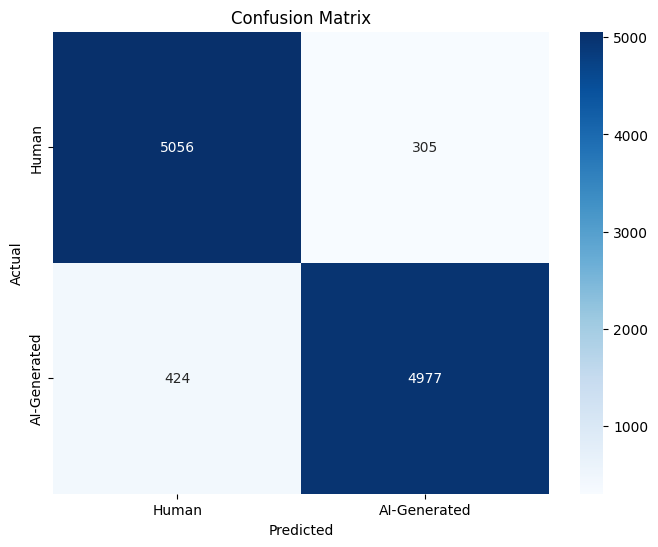

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4716
           1       0.95      0.94      0.95      3343

    accuracy                           0.96      8059
   macro avg       0.95      0.95      0.95      8059
weighted avg       0.96      0.96      0.96      8059



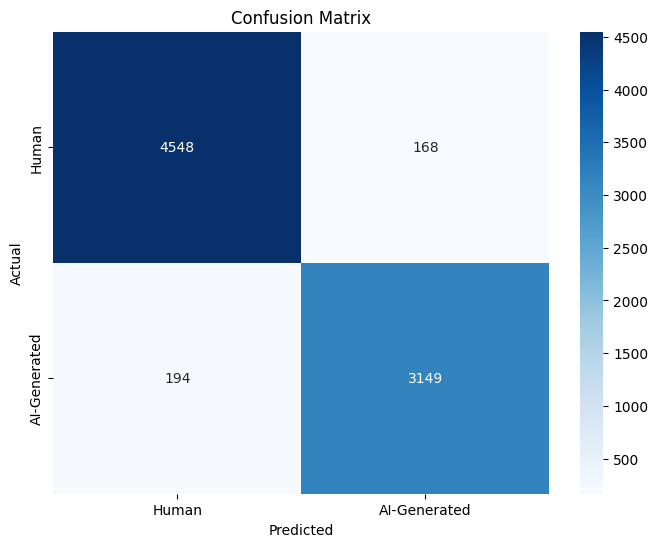

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       359
           1       0.92      0.97      0.94       903

    accuracy                           0.92      1262
   macro avg       0.92      0.88      0.89      1262
weighted avg       0.92      0.92      0.92      1262



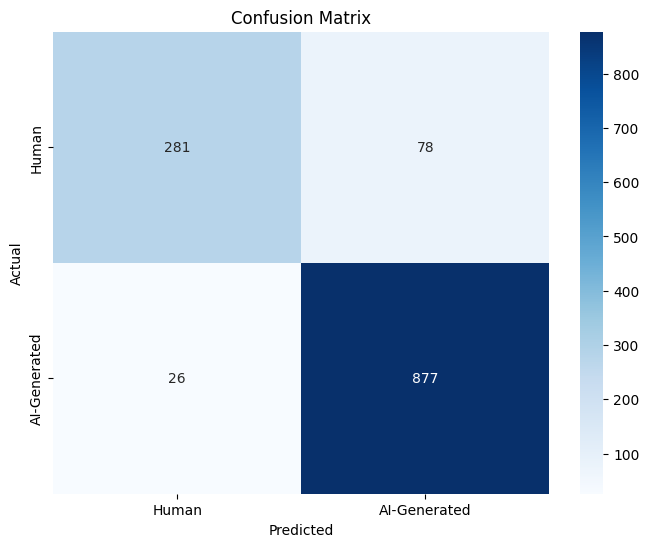

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.34      0.99      0.51       103
           1       1.00      0.72      0.84       699

    accuracy                           0.76       802
   macro avg       0.67      0.86      0.67       802
weighted avg       0.91      0.76      0.80       802



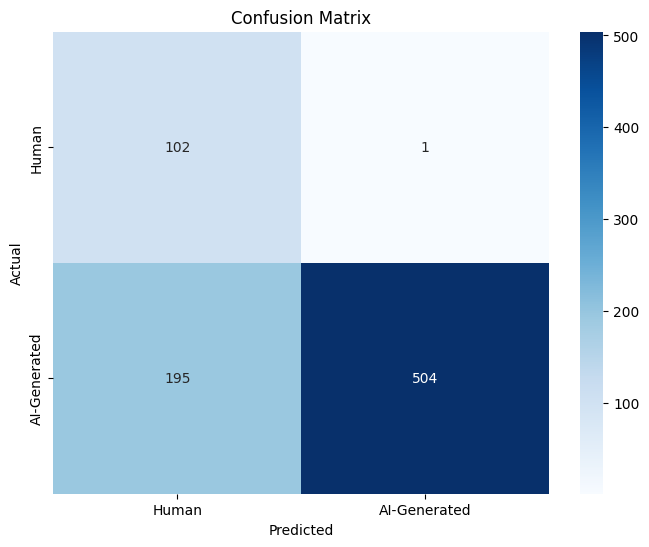

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.39      0.55        69
           1       0.80      0.99      0.89       173

    accuracy                           0.82       242
   macro avg       0.87      0.69      0.72       242
weighted avg       0.84      0.82      0.79       242



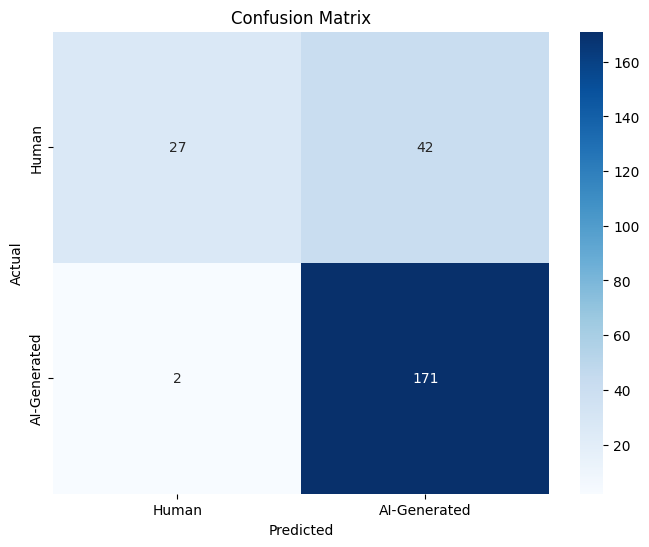

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       114
           1       0.95      0.98      0.96       283

    accuracy                           0.94       397
   macro avg       0.94      0.92      0.93       397
weighted avg       0.94      0.94      0.94       397



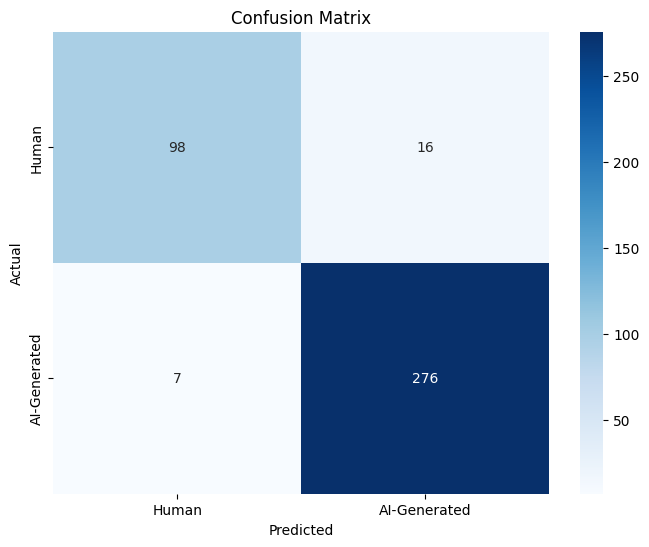

Processed Text: logic programming is a programming paradigm which is largely based on formal logic any program written in a logic programming language is a set of sentence in logical form expressing fact and rule about some problem domain major logic programming language family include prolog answer set programming asp and datalog in all of these language rule are written in the form of clause and are read declaratively a logical implication h is called the head of the rule and b bn is called the body fact are rule that have no body and are written in the simplified form in the simplest case in which h b bn are all atomic formula these clause are called definite clause or horn clause however there are many extension of this simple case the most important one being the case in which condition in the body of a clause can also be negation of atomic formula logic programming language that include this extension have the knowledge representation capability of a nonmonotonic logic in asp and

In [ ]:
_evaluate_model('unigram-tfidf')

# LSTM

In [ ]:
!pip install keras-tuner

time: 7.13 s (started: 2024-05-04 21:56:35 +00:00)


In [ ]:
from kerastuner import HyperModel, RandomSearch
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

time: 573 µs (started: 2024-05-07 11:43:49 +00:00)


In [ ]:
def _evaluate_model(fn):

    # Load the saved model
    clf = load_model(f'{MODEL_PATH}/{fn}.h5')

    # Predict test set
    y_pred_prob = clf.predict(X_test_pad)

    # Convert predicted probabilities to binary predictions using a threshold of 0.5
    y_pred_test = (y_pred_prob > 0.5).astype(int)

    # Generate performance matrix
    _performance_matrix(y_test['ai-generated'], y_pred_test)

    # Evaluate each type
    _evaluate_each_type(y_test, y_pred_test)

    # Get example of wrong prediction
    _get_wrong_prediction(y_pred_test)

time: 794 µs (started: 2024-05-07 11:34:25 +00:00)


In [ ]:
# Explore vocabulary size to select maximum words

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index)
print("Vocabulary size:", vocab_size)

Vocabulary size: 61790
time: 2.9 s (started: 2024-05-07 11:43:52 +00:00)


In [ ]:
max_words = 10000

time: 450 µs (started: 2024-05-07 11:43:55 +00:00)


In [ ]:
# Initialize Tokenizer
tokenizer = Tokenizer(num_words=max_words)

# Fit tokenizer on training data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

time: 5.71 s (started: 2024-05-07 11:43:55 +00:00)


In [ ]:
# Explore minimum and maximum length of sentence
sentence_len = [len(x) for x in X_train_seq]
print(f"Minimum Length = {min(sentence_len)}")
print(f"Maximum Length = {max(sentence_len)}")

Minimum Length = 0
Maximum Length = 1623
time: 5.87 ms (started: 2024-05-05 18:06:18 +00:00)


In [ ]:
max_length = 500

time: 442 µs (started: 2024-05-07 11:44:20 +00:00)


In [ ]:
# Pad sequences for uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

time: 440 ms (started: 2024-05-07 11:44:20 +00:00)


### LSTM

In [ ]:
# Define callbacks

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(f'{MODEL_PATH}/LSTM.h5', monitor='val_loss', save_best_only=True)

# Adjustable learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

time: 842 µs (started: 2024-05-01 18:56:54 +00:00)


In [ ]:
def _build_lstm_model(hp):
    """
      Initialize LSTM model for hyperparameter tuning
    """

    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=max_words, output_dim=hp.Int('embedding_dim', 100, 500, step=100), input_length=max_length))

    # Add LSTM layers
    model.add(LSTM(units=hp.Choice('lstm_units', [64, 128]), activation='tanh', recurrent_activation='sigmoid', return_sequences=True, dropout=hp.Float('dropout_rate', 0.1, 0.3, step=0.1), use_bias=True))
    model.add(LSTM(units=hp.Choice('lstm_units', [64, 128]), activation='tanh', recurrent_activation='sigmoid', return_sequences=False, dropout=hp.Float('dropout_rate', 0.1, 0.3, step=0.1), use_bias=True))

    # Add output Dense layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.01, 0.1])), metrics=['accuracy'])

    return model

time: 754 µs (started: 2024-05-01 18:56:54 +00:00)


In [ ]:
# Hyper parameter tuning using RandomSearch
tuner = RandomSearch(_build_lstm_model,
                     objective='val_loss',
                     max_trials=5,
                     executions_per_trial=1,
                     directory='lstm',
                     project_name='AI-detection')
tuner.search(X_train_pad, y_train, epochs=5, validation_data=(X_val_pad, y_val), callbacks=[early_stopping, reduce_lr])

# Retrieve the best models and hyperparameters
models = tuner.get_best_models(num_models=1)
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hyperparameters.values}")

Trial 5 Complete [00h 10m 27s]
val_loss: 0.11388037353754044

Best val_loss So Far: 0.09896306693553925
Total elapsed time: 00h 53m 41s
Best Hyperparameters: {'embedding_dim': 300, 'lstm_units': 64, 'dropout_rate': 0.1, 'learning_rate': 0.001}
time: 53min 42s (started: 2024-04-22 12:42:58 +00:00)


In [ ]:
# Initialize LSTM model after parameter selection

def _train_LSTM(embedding_dim, lstm_units, dropout_rate, learning_rate):

    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))

    # Add LSTM layers
    model.add(LSTM(units=lstm_units, activation='tanh', recurrent_activation='sigmoid', return_sequences=True, dropout=dropout_rate, use_bias=True))
    model.add(LSTM(units=lstm_units, activation='tanh', recurrent_activation='sigmoid', return_sequences=False, dropout=dropout_rate, use_bias=True))

    # Add output Dense layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy'])

    # Training
    history = model.fit(X_train_pad, y_train['ai-generated'], epochs=20, batch_size=32, validation_data=(X_val_pad, y_val['ai-generated']), callbacks=[early_stopping, model_checkpoint, reduce_lr])

    return history, model

time: 835 µs (started: 2024-05-01 18:56:57 +00:00)


In [ ]:
history, model = _train_LSTM(300, 64, 0.1, 0.001)

Epoch 1/20
1009/1009 [==============================] - 106s 100ms/step - loss: 0.1559 - accuracy: 0.9448 - val_loss: 0.0933 - val_accuracy: 0.9669 - lr: 0.0010
Epoch 2/20
   1/1009 [..............................] - ETA: 48s - loss: 0.0116 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1009/1009 [==============================] - 49s 49ms/step - loss: 0.0580 - accuracy: 0.9818 - val_loss: 0.0992 - val_accuracy: 0.9687 - lr: 0.0010
Epoch 3/20
1009/1009 [==============================] - 43s 43ms/step - loss: 0.0435 - accuracy: 0.9859 - val_loss: 0.0969 - val_accuracy: 0.9733 - lr: 0.0010
Epoch 4/20
1009/1009 [==============================] - 41s 41ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0967 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 5/20
1009/1009 [==============================] - 40s 40ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.0997 - val_accuracy: 0.9749 - lr: 1.0000e-04
Epoch 6/20
1009/1009 [==============================] - 40s 39ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.1115 - val_accuracy: 0.9749 - lr: 1.0000e-04
time: 5min 19s (started: 2024-05-01 18:57:06 +00:00)


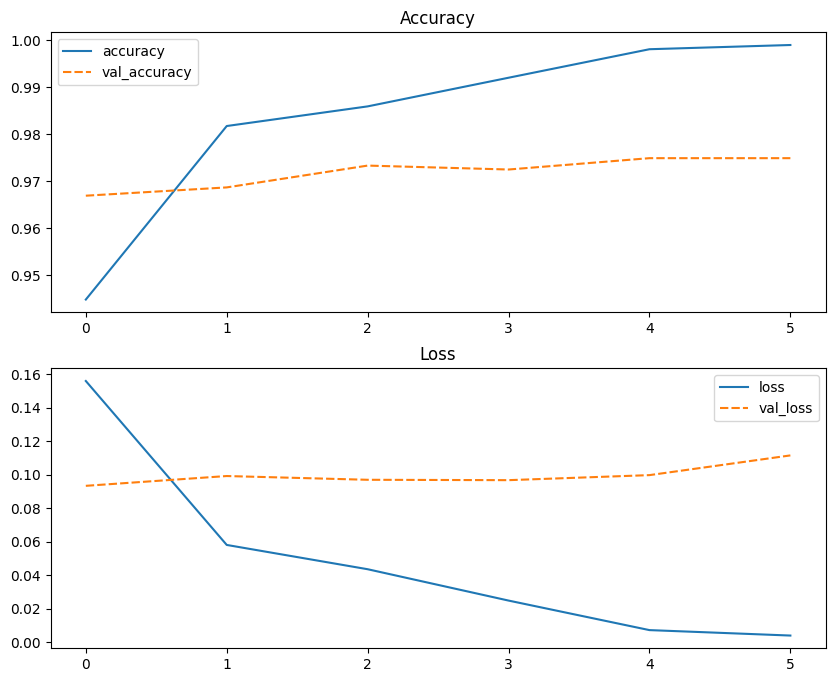

time: 535 ms (started: 2024-05-01 19:09:45 +00:00)


In [ ]:
_history_plot(history.history)

337/337 [==============================] - 6s 16ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5361
           1       0.98      0.95      0.96      5401

    accuracy                           0.96     10762
   macro avg       0.96      0.96      0.96     10762
weighted avg       0.96      0.96      0.96     10762



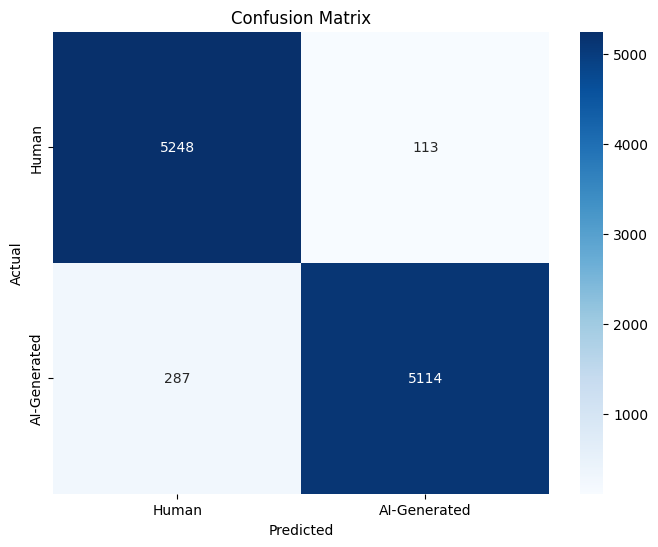

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4739
           1       0.98      0.96      0.97      3261

    accuracy                           0.97      8000
   macro avg       0.98      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000



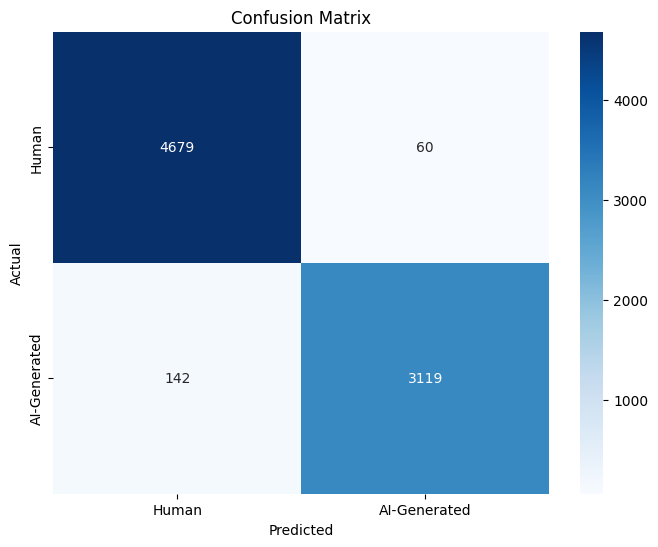

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       347
           1       0.97      0.97      0.97       940

    accuracy                           0.96      1287
   macro avg       0.94      0.95      0.94      1287
weighted avg       0.96      0.96      0.96      1287



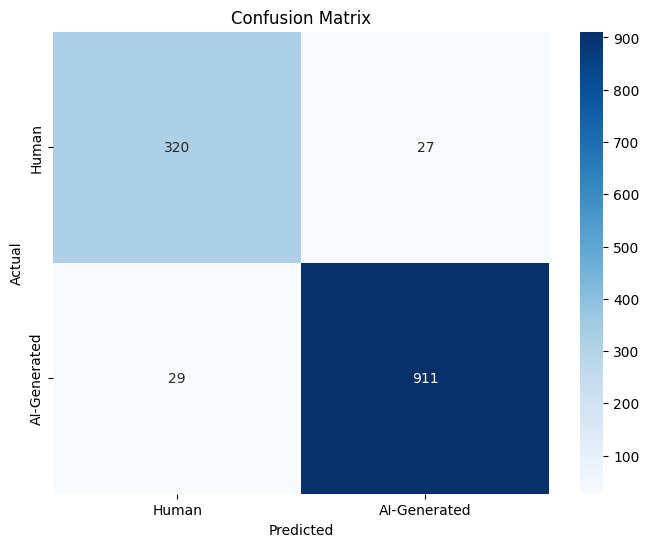

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       275

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



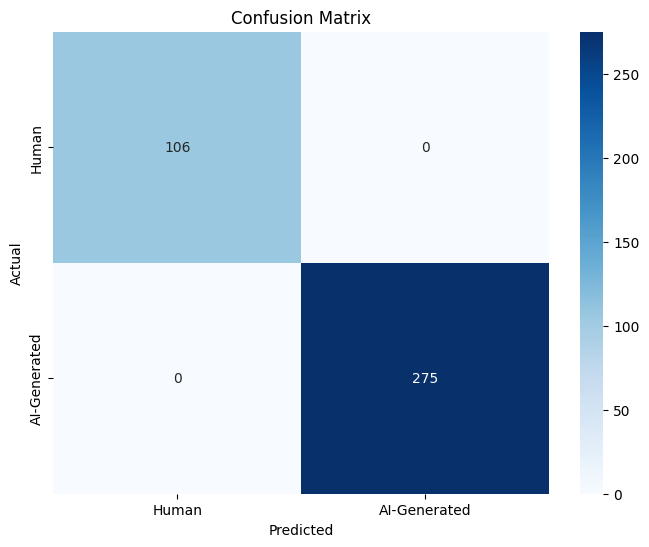

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.95      0.63        97
           1       0.99      0.86      0.92       746

    accuracy                           0.87       843
   macro avg       0.73      0.91      0.78       843
weighted avg       0.93      0.87      0.89       843



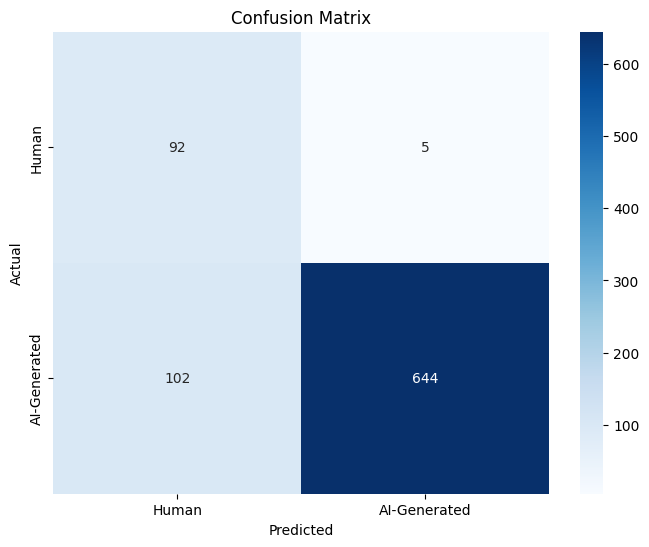

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        72
           1       0.89      0.92      0.90       179

    accuracy                           0.86       251
   macro avg       0.84      0.82      0.82       251
weighted avg       0.86      0.86      0.86       251



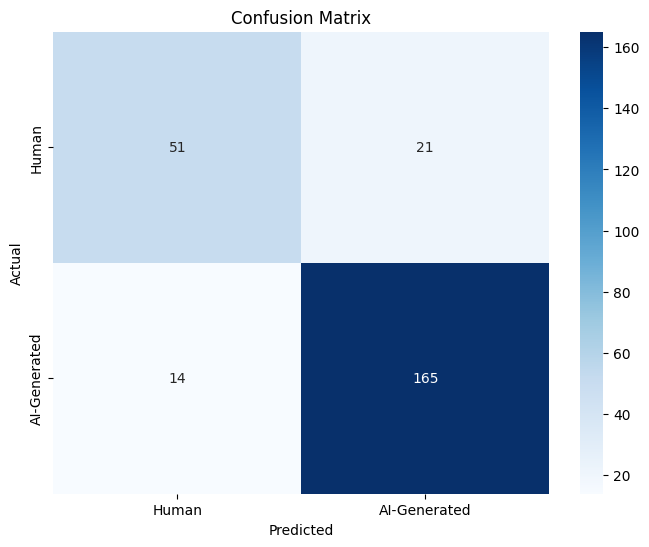

337/337 [==============================] - 5s 16ms/step
Raw Text: \nSure! I'd be happy to help explain this article for you.\n\nFirst of all, it's important to understand that Facebook is a company that makes money by showing ads to its users. In order to show ads, Facebook needs to have a large number of users who visit the site regularly and spend a lot of time on it. This is called "user engagement".\n\nThe article you mentioned suggests that Facebook may need to make some changes to its platform in order to continue growing and attracting new users. These changes might involve compromising the user experience, which means making the site less enjoyable or convenient for users in order to achieve a different goal.\n\nFor example, Facebook might need to show more ads to its users in order to make more money. This could make the site less enjoyable for users, but it might be necessary in order for Facebook to continue growing.\n\nAnother possibility is that Facebook might need to chan

In [ ]:
_evaluate_model('LSTM')

### BiLSTM

In [ ]:
# Define callbacks

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(f'{MODEL_PATH}/LSTM-BI.h5', monitor='val_loss', save_best_only=True)

# Adjustable learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

time: 895 µs (started: 2024-05-01 19:10:05 +00:00)


In [ ]:
def _build_lstm_model(hp):
    """
    Initialize LSTM model with hyperparameters for tuning
    """

    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=max_words, output_dim=hp.Int('embedding_dim', 100, 500, step=100), input_length=max_length))

    # Add BiLSTM layers
    model.add(Bidirectional(LSTM(units=hp.Choice('lstm_units', [64, 128]), activation='tanh', return_sequences=True, dropout=hp.Float('dropout_rate', 0.1, 0.3, step=0.1), use_bias=True)))
    model.add(Bidirectional(LSTM(units=hp.Choice('lstm_units', [64, 128]), activation='tanh', return_sequences=False, dropout=hp.Float('dropout_rate', 0.1, 0.3, step=0.1), use_bias=True)))

    # Add output Dense layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(hp.Choice('learning_rate', [0.001, 0.01, 0.1])), metrics=['accuracy'])

    return model

time: 735 µs (started: 2024-05-01 19:10:05 +00:00)


In [ ]:
# Hyper parameter tuning using RandomSearch
tuner = RandomSearch(_build_lstm_model,
                     objective='val_loss',
                     max_trials=5,
                     executions_per_trial=1,
                     directory='lstm',
                     project_name='AI-detection')

tuner.search(X_train_pad, y_train['ai-generated'], epochs=5, validation_data=(X_val_pad, y_val['ai-generated']), callbacks=[early_stopping, reduce_lr])

# Retrieve the best models and hyperparameters
models = tuner.get_best_models(num_models=1)
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hyperparameters.values}")

Trial 5 Complete [00h 08m 05s]
val_loss: 0.076537124812603

Best val_loss So Far: 0.076537124812603
Total elapsed time: 00h 29m 56s
Best Hyperparameters: {'embedding_dim': 500, 'lstm_units': 64, 'dropout_rate': 0.1, 'learning_rate': 0.001}
time: 24min 39s (started: 2024-04-27 13:26:12 +00:00)


In [ ]:
# Initialize LSTM model after parameter selection

def _train_LSTM(embedding_dim, lstm_units, dropout_rate, learning_rate):

    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))

    # Add BiLSTM layers
    model.add(Bidirectional(LSTM(units=lstm_units, activation='tanh', return_sequences=True, dropout=dropout_rate, use_bias=True)))
    model.add(Bidirectional(LSTM(units=lstm_units, activation='tanh', return_sequences=False, dropout=dropout_rate, use_bias=True)))

    # Add output Dense layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(learning_rate, clipvalue=10), metrics=['accuracy'])

    # Training
    history = model.fit(X_train_pad, y_train['ai-generated'], epochs=20, batch_size=32, validation_data=(X_val_pad, y_val['ai-generated']), callbacks=[early_stopping, model_checkpoint, reduce_lr])

    return history, model

time: 796 µs (started: 2024-05-01 19:10:21 +00:00)


In [ ]:
history, model = _train_LSTM(500, 64, 0.1, 0.001)

Epoch 1/20
1009/1009 [==============================] - ETA: 0s - loss: 0.1511 - accuracy: 0.9398

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1009/1009 [==============================] - 149s 140ms/step - loss: 0.1511 - accuracy: 0.9398 - val_loss: 0.0957 - val_accuracy: 0.9651 - lr: 0.0010
Epoch 2/20
1009/1009 [==============================] - 90s 89ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0701 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 3/20
1009/1009 [==============================] - 86s 85ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0748 - val_accuracy: 0.9744 - lr: 0.0010
Epoch 4/20
1009/1009 [==============================] - 84s 83ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0892 - val_accuracy: 0.9734 - lr: 0.0010
Epoch 5/20
1009/1009 [==============================] - 82s 81ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.0814 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 6/20
1009/1009 [==============================] - 82s 81ms/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.0911 - val_accuracy: 0.9776 - lr: 1.0000e-04
Epoch 7/20
1009/1009 [=============================

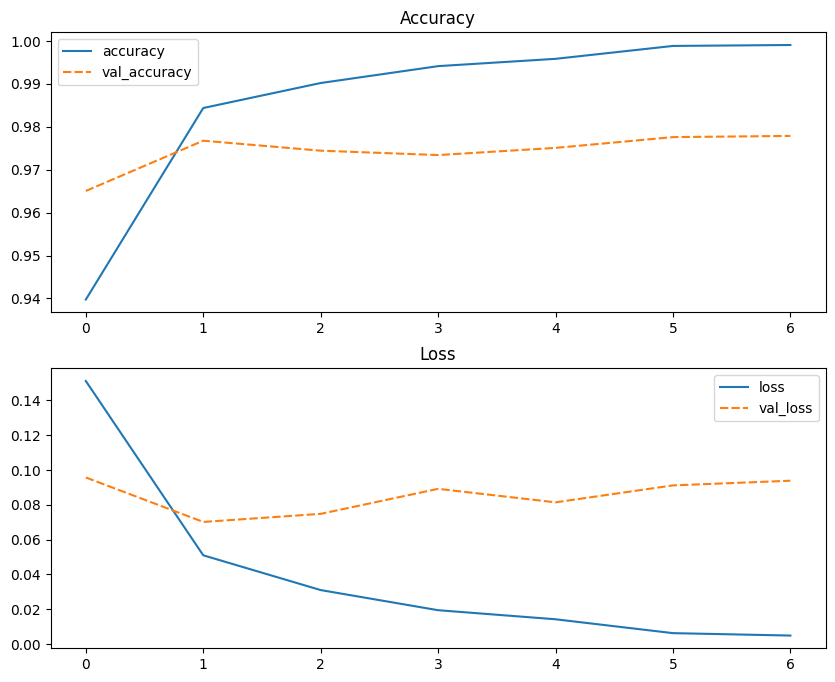

time: 35.8 s (started: 2024-05-01 19:21:18 +00:00)


In [ ]:
_history_plot(history.history)

337/337 [==============================] - 10s 25ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5361
           1       0.98      0.98      0.98      5401

    accuracy                           0.98     10762
   macro avg       0.98      0.98      0.98     10762
weighted avg       0.98      0.98      0.98     10762



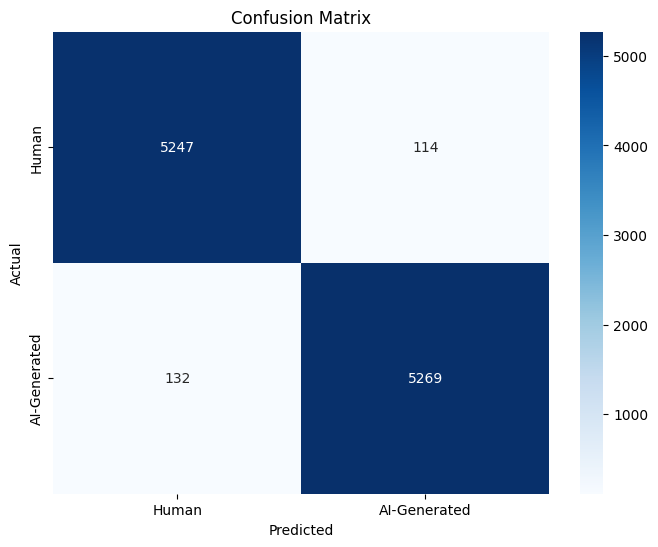

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4739
           1       0.98      0.98      0.98      3261

    accuracy                           0.99      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.99      0.99      0.99      8000



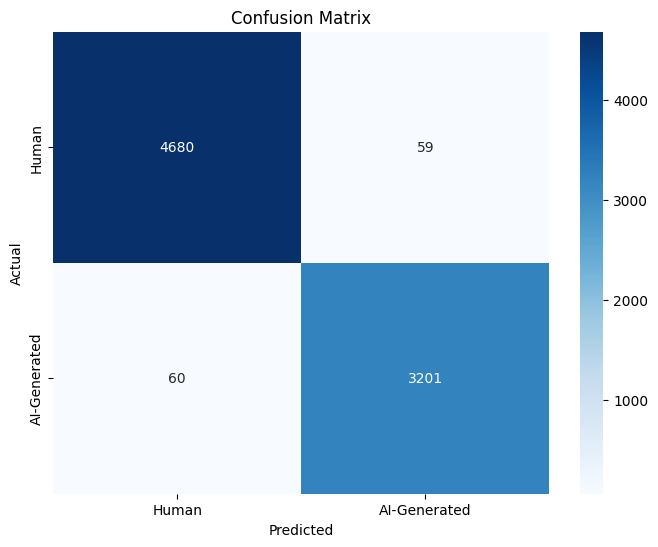

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       347
           1       0.97      0.98      0.98       940

    accuracy                           0.97      1287
   macro avg       0.96      0.95      0.96      1287
weighted avg       0.97      0.97      0.97      1287



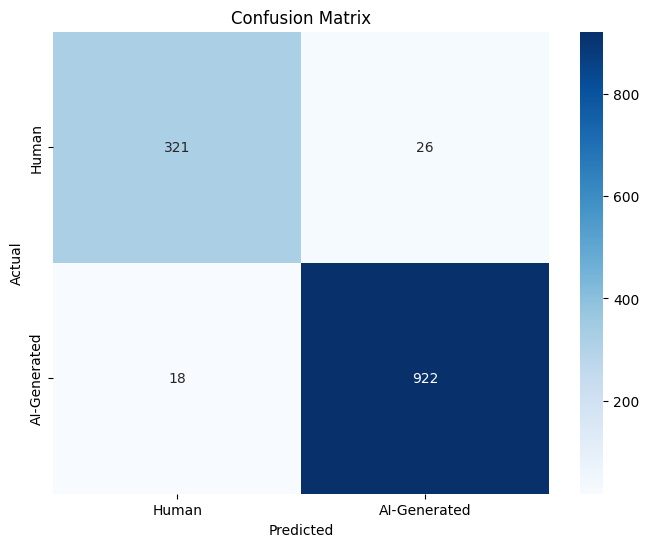

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       275

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



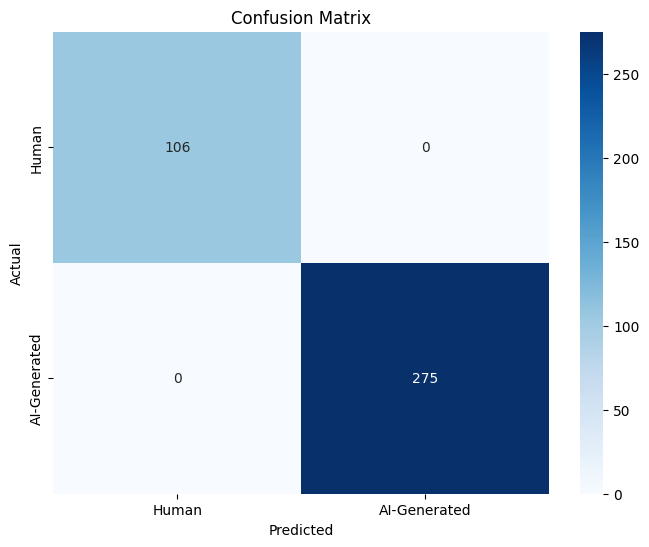

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.90      0.77        97
           1       0.99      0.94      0.96       746

    accuracy                           0.94       843
   macro avg       0.83      0.92      0.87       843
weighted avg       0.95      0.94      0.94       843



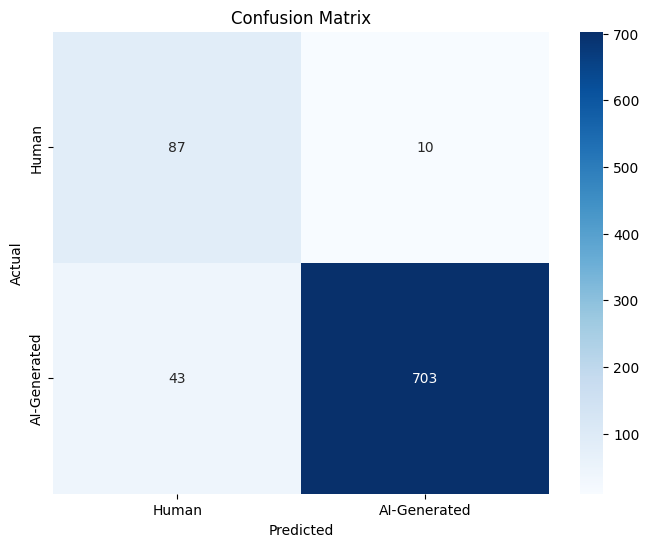

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        72
           1       0.90      0.94      0.92       179

    accuracy                           0.88       251
   macro avg       0.86      0.84      0.85       251
weighted avg       0.88      0.88      0.88       251



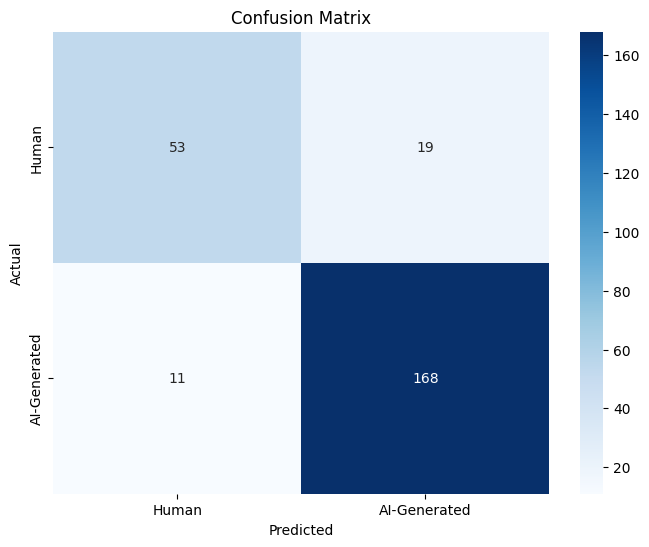

337/337 [==============================] - 8s 25ms/step
Raw Text: \nSure! I'd be happy to help explain this article for you.\n\nFirst of all, it's important to understand that Facebook is a company that makes money by showing ads to its users. In order to show ads, Facebook needs to have a large number of users who visit the site regularly and spend a lot of time on it. This is called "user engagement".\n\nThe article you mentioned suggests that Facebook may need to make some changes to its platform in order to continue growing and attracting new users. These changes might involve compromising the user experience, which means making the site less enjoyable or convenient for users in order to achieve a different goal.\n\nFor example, Facebook might need to show more ads to its users in order to make more money. This could make the site less enjoyable for users, but it might be necessary in order for Facebook to continue growing.\n\nAnother possibility is that Facebook might need to chan

In [ ]:
_evaluate_model('LSTM-BI')

### BILSTM - GloVe

In [ ]:
# Define callbacks

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(f'{MODEL_PATH}/LSTM-BI-glove.h5', monitor='val_loss', save_best_only=True)

# Adjustable learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

time: 894 µs (started: 2024-05-01 19:24:41 +00:00)


In [ ]:
# Pad sequences with post padding
max_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

time: 617 ms (started: 2024-05-07 11:48:41 +00:00)


In [ ]:
# Use pretrained GloVe embedding
# Code derived from : https://keras.io/examples/nlp/pretrained_word_embeddings/

def _glove_embedding(embedding_dim):
    """
      Load pre-trained GloVe embeddings and create embedding matrix
    """

    embedding_index = {}

    # Load GloVe embeddings
    with open(f'{GOOGLE_DRIVE_PATH}/source/glove.6B.100d.txt', encoding='utf-8') as f:

        # Iterate through each line
        for line in f:

            values = line.split()

            # Extract embedding vector and convert to a numpy array
            word = values[0]
            embedding_index[word] = np.asarray(values[1:], dtype='float32')

    # Initialize embedding matrix with zeros
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    # Iterate through each word in the tokenizer's word index
    for word, i in tokenizer.word_index.items():

        # Check if index is within the vocabulary size
        if i < vocab_size:

            # Retrieve embedding vector for each word
            embedding_vector = embedding_index.get(word)

            # If embedding vector is found, assign to the row in the embedding matrix
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

    return embedding_matrix

time: 1.01 ms (started: 2024-05-01 19:24:49 +00:00)


In [ ]:
# Initialize LSTM model after parameter selection

def _train_LSTM(embedding_dim, lstm_units, dropout_rate, learning_rate):

    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[_glove_embedding(embedding_dim)], input_length=max_length, trainable=False))

    # Add BiLSTM layers
    model.add(Bidirectional(LSTM(units=lstm_units, activation='tanh', return_sequences=True, dropout=dropout_rate, use_bias=True)))
    model.add(Bidirectional(LSTM(units=lstm_units, activation='tanh', return_sequences=False, dropout=dropout_rate, use_bias=True)))

    # Add output Dense layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(learning_rate, clipvalue=10), metrics=['accuracy'])

    # Training
    history = model.fit(X_train_pad, y_train['ai-generated'], epochs=20, batch_size=32, validation_data=(X_val_pad, y_val['ai-generated']), callbacks=[early_stopping, model_checkpoint, reduce_lr])

    return history, model

time: 767 µs (started: 2024-05-01 19:24:50 +00:00)


In [ ]:
history, model = _train_LSTM(100, 128, 0.1, 0.01)

Epoch 1/20
1009/1009 [==============================] - ETA: 0s - loss: 0.2912 - accuracy: 0.8701

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1009/1009 [==============================] - 266s 257ms/step - loss: 0.2912 - accuracy: 0.8701 - val_loss: 0.1571 - val_accuracy: 0.9428 - lr: 0.0100
Epoch 2/20
1009/1009 [==============================] - 257s 255ms/step - loss: 0.1336 - accuracy: 0.9493 - val_loss: 0.1390 - val_accuracy: 0.9465 - lr: 0.0100
Epoch 3/20
1009/1009 [==============================] - 258s 255ms/step - loss: 0.0982 - accuracy: 0.9631 - val_loss: 0.0923 - val_accuracy: 0.9641 - lr: 0.0100
Epoch 4/20
1009/1009 [==============================] - 258s 256ms/step - loss: 0.0713 - accuracy: 0.9741 - val_loss: 0.0830 - val_accuracy: 0.9723 - lr: 0.0100
Epoch 5/20
1009/1009 [==============================] - 257s 255ms/step - loss: 0.0584 - accuracy: 0.9788 - val_loss: 0.0711 - val_accuracy: 0.9745 - lr: 0.0100
Epoch 6/20
1009/1009 [==============================] - 258s 255ms/step - loss: 0.0445 - accuracy: 0.9848 - val_loss: 0.0704 - val_accuracy: 0.9744 - lr: 0.0100
Epoch 7/20
1009/1009 [=======================

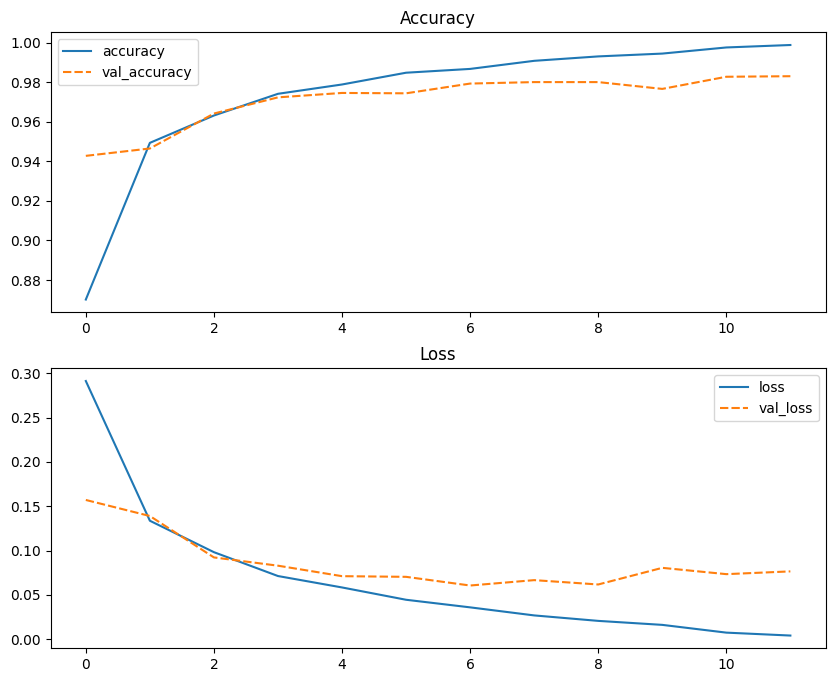

time: 52 s (started: 2024-05-01 20:16:50 +00:00)


In [ ]:
_history_plot(history.history)

337/337 [==============================] - 31s 90ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5361
           1       0.99      0.98      0.98      5401

    accuracy                           0.98     10762
   macro avg       0.98      0.98      0.98     10762
weighted avg       0.98      0.98      0.98     10762



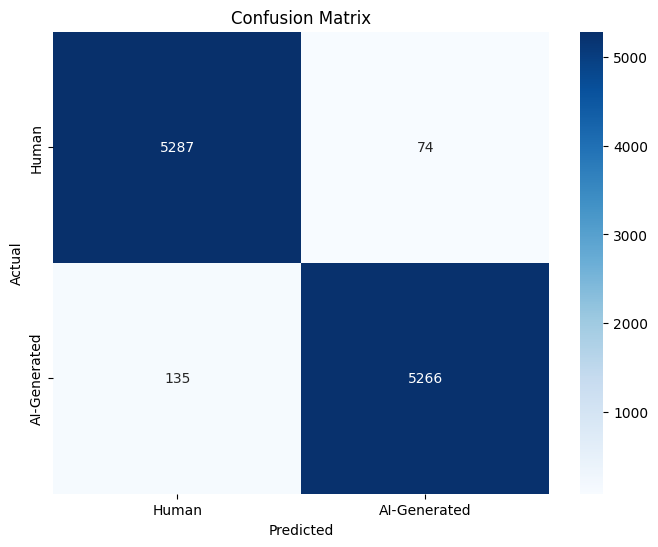

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4739
           1       0.99      0.98      0.98      3261

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000



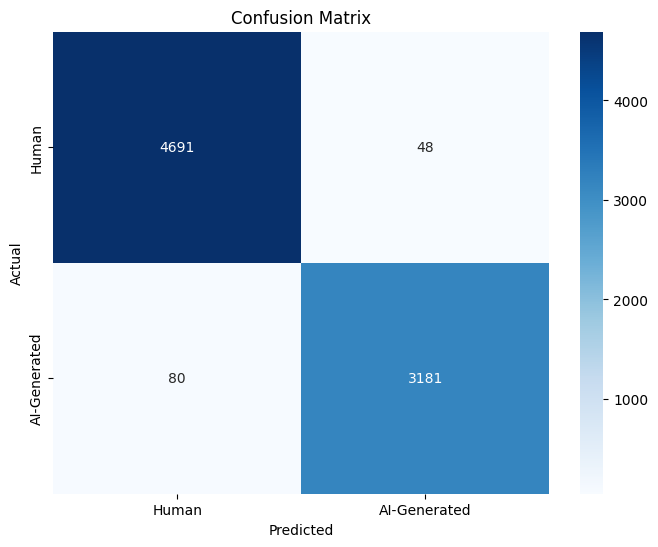

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       347
           1       0.99      0.98      0.99       940

    accuracy                           0.98      1287
   macro avg       0.97      0.98      0.98      1287
weighted avg       0.98      0.98      0.98      1287



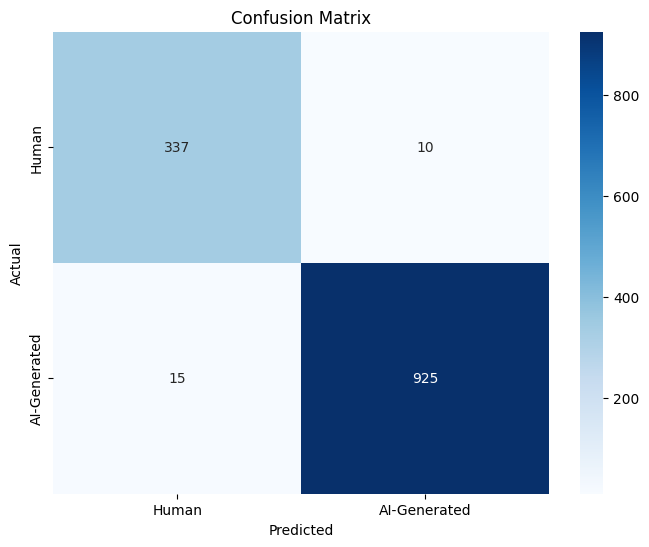

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       106
           1       0.99      1.00      1.00       275

    accuracy                           0.99       381
   macro avg       1.00      0.99      0.99       381
weighted avg       0.99      0.99      0.99       381



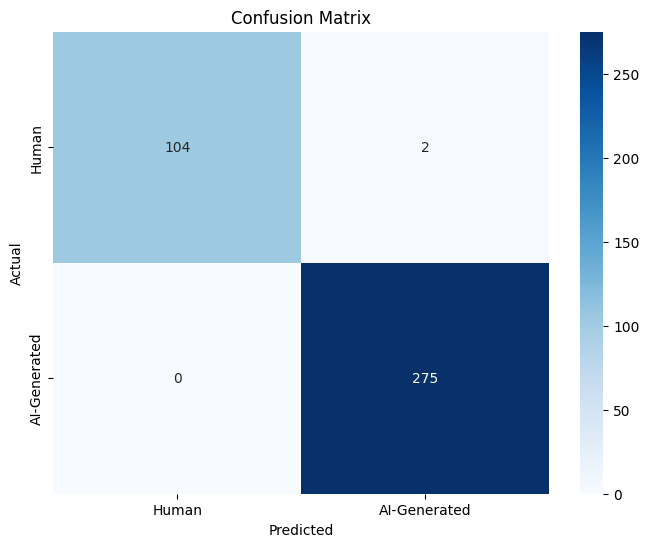

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        97
           1       0.99      0.96      0.98       746

    accuracy                           0.96       843
   macro avg       0.88      0.95      0.91       843
weighted avg       0.97      0.96      0.96       843



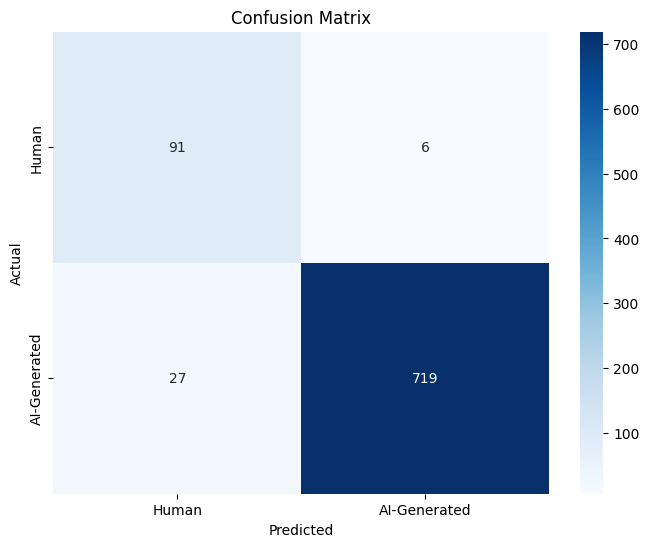

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        72
           1       0.95      0.93      0.94       179

    accuracy                           0.92       251
   macro avg       0.89      0.91      0.90       251
weighted avg       0.92      0.92      0.92       251



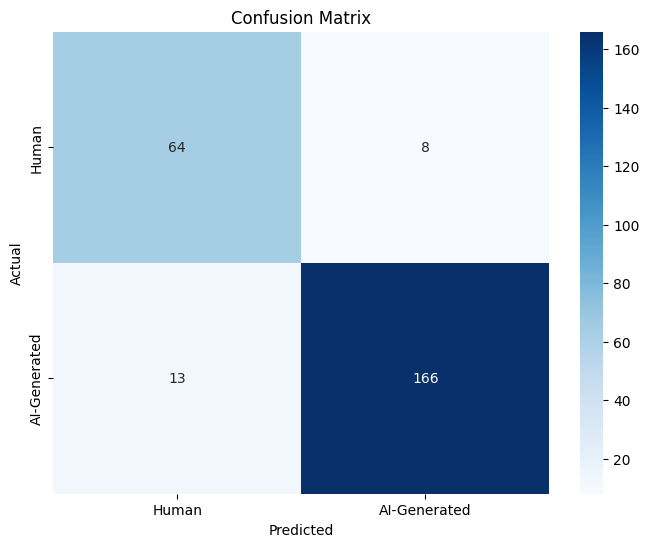

337/337 [==============================] - 29s 81ms/step
Raw Text: \nSure! I'd be happy to help explain this article for you.\n\nFirst of all, it's important to understand that Facebook is a company that makes money by showing ads to its users. In order to show ads, Facebook needs to have a large number of users who visit the site regularly and spend a lot of time on it. This is called "user engagement".\n\nThe article you mentioned suggests that Facebook may need to make some changes to its platform in order to continue growing and attracting new users. These changes might involve compromising the user experience, which means making the site less enjoyable or convenient for users in order to achieve a different goal.\n\nFor example, Facebook might need to show more ads to its users in order to make more money. This could make the site less enjoyable for users, but it might be necessary in order for Facebook to continue growing.\n\nAnother possibility is that Facebook might need to cha

In [ ]:
_evaluate_model('LSTM-BI-glove')

In [ ]:
# Code obtained from : https://towardsdatascience.com/interpreting-an-lstm-through-lime-e294e6ed3a03

# Load model
model = load_model(f'{MODEL_PATH}/LSTM-BI-glove.h5')

# Initialize Tokenizer
tokenizer = Tokenizer(num_words=10000)

# Fit Tokenizer on training data
tokenizer.fit_on_texts(X_train)

# Initialize LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Human', 'AI'])

# Define function to predict probabilities
def predict_proba(x):

    # Tokenize input
    list_t = tokenizer.texts_to_sequences(x)

    # Pad tokenized sequences
    seq = pad_sequences(list_t, maxlen=500)

    # Predict probabilities
    pred = model.predict(seq)
    returnable = []
    for i in pred:
        temp = i[0]
        returnable.append(np.array([1 - temp, temp]))
    return np.array(returnable)

# Generate explanations using LIME
explainer.explain_instance(X, predict_proba).show_in_notebook()

157/157 [==============================] - 104s 643ms/step


time: 1min 50s (started: 2024-05-01 20:42:58 +00:00)


### BiLSTM - Word2Vec

In [ ]:
from gensim.models import Word2Vec

time: 332 µs (started: 2024-05-01 21:46:14 +00:00)


In [ ]:
# Define callbacks

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(f'{MODEL_PATH}/LSTM-word2vec.h5', monitor='val_loss', save_best_only=True)

# Adjustable learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

time: 735 µs (started: 2024-05-01 21:46:15 +00:00)


In [ ]:
# Pad sequences with post padding

max_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

time: 623 ms (started: 2024-05-07 11:50:29 +00:00)


In [ ]:
embedding_dim = 300

time: 311 µs (started: 2024-05-05 18:06:32 +00:00)


In [ ]:
# Function to create embedding matrix from Word2Vec model
# Code derived from https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

# Initialize Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=embedding_dim, window=5, min_count=1, workers=4)

def _word2vec_embedding(embedding_dim):
    """
      Create embedding matrix using Word2Vec word embeddings
    """

    # Initialize embedding matrix with zeros
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    # Iterate through each word in the tokenizer's word index
    for word, i in tokenizer.word_index.items():

        # Check if index is within the vocabulary size and if the word is in the Word2Vec model
        if i < vocab_size and word in word2vec_model.wv:

            # Retrieve embedding vector for each word
            embedding_vector = word2vec_model.wv[word]

            # Assign embedding vector to the row in the embedding matrix
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

time: 40.2 s (started: 2024-05-01 21:47:39 +00:00)


In [ ]:
# Initialize LSTM model using Word2Vec embeddings
def _train_LSTM(embedding_dim, lstm_units, dropout_rate, learning_rate):

    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[_word2vec_embedding(embedding_dim)], input_length=max_length, trainable=False))

    # Add BiLSTM layers
    model.add(Bidirectional(LSTM(units=lstm_units, activation='tanh', return_sequences=True, dropout=dropout_rate, use_bias=True)))
    model.add(Bidirectional(LSTM(units=lstm_units, activation='tanh', return_sequences=False, dropout=dropout_rate, use_bias=True)))

    # Add output Dense layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(learning_rate, clipvalue=10), metrics=['accuracy'])

    # Training
    history = model.fit(X_train_pad, y_train['ai-generated'], epochs=20, batch_size=32, validation_data=(X_val_pad, y_val['ai-generated']), callbacks=[early_stopping, model_checkpoint, reduce_lr])

    return history, model

time: 689 µs (started: 2024-05-01 21:48:19 +00:00)


In [ ]:
history, model = _train_LSTM(300, 128, 0.1, 0.01)

Epoch 1/20
1009/1009 [==============================] - ETA: 0s - loss: 0.5445 - accuracy: 0.7286

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1009/1009 [==============================] - 264s 253ms/step - loss: 0.5445 - accuracy: 0.7286 - val_loss: 0.4613 - val_accuracy: 0.8017 - lr: 0.0100
Epoch 2/20
1009/1009 [==============================] - 256s 254ms/step - loss: 0.4799 - accuracy: 0.7697 - val_loss: 0.4180 - val_accuracy: 0.8123 - lr: 0.0100
Epoch 3/20
1009/1009 [==============================] - 256s 254ms/step - loss: 0.4324 - accuracy: 0.7985 - val_loss: 0.3902 - val_accuracy: 0.8330 - lr: 0.0100
Epoch 4/20
1009/1009 [==============================] - 256s 253ms/step - loss: 0.4053 - accuracy: 0.8158 - val_loss: 0.3821 - val_accuracy: 0.8319 - lr: 0.0100
Epoch 5/20
1009/1009 [==============================] - 256s 254ms/step - loss: 0.3849 - accuracy: 0.8315 - val_loss: 0.3804 - val_accuracy: 0.8364 - lr: 0.0100
Epoch 6/20
1009/1009 [==============================] - 254s 252ms/step - loss: 0.3885 - accuracy: 0.8311 - val_loss: 0.3931 - val_accuracy: 0.8232 - lr: 0.0100
Epoch 7/20
1009/1009 [=======================

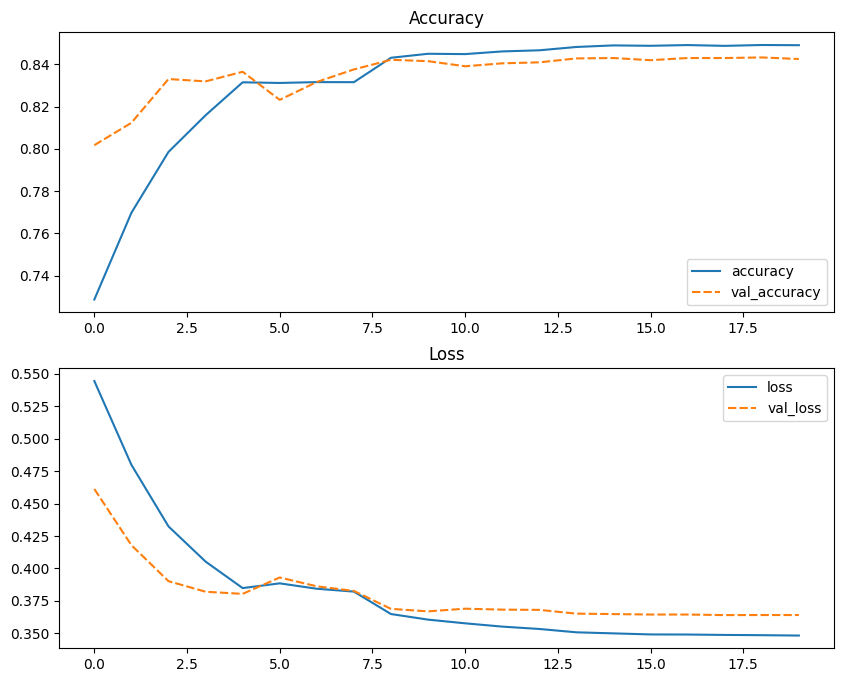

time: 489 ms (started: 2024-05-01 23:14:57 +00:00)


In [ ]:
_history_plot(history.history)

337/337 [==============================] - 33s 93ms/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      5401
           1       0.85      0.84      0.84      5360

    accuracy                           0.84     10761
   macro avg       0.84      0.84      0.84     10761
weighted avg       0.84      0.84      0.84     10761



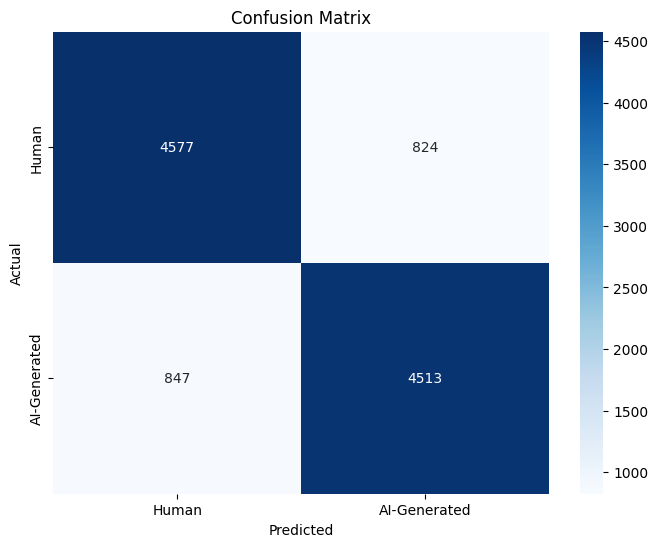

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      4735
           1       0.80      0.87      0.83      3284

    accuracy                           0.86      8019
   macro avg       0.85      0.86      0.86      8019
weighted avg       0.86      0.86      0.86      8019



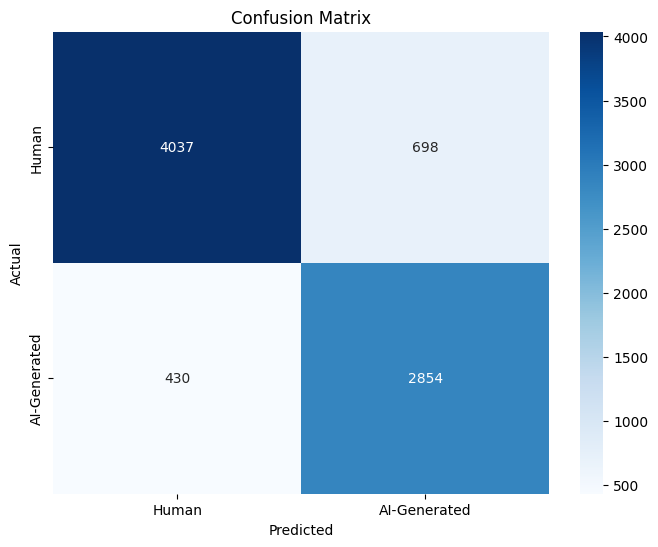

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.31      1.00      0.47       116
           1       1.00      0.66      0.79       754

    accuracy                           0.70       870
   macro avg       0.66      0.83      0.63       870
weighted avg       0.91      0.70      0.75       870



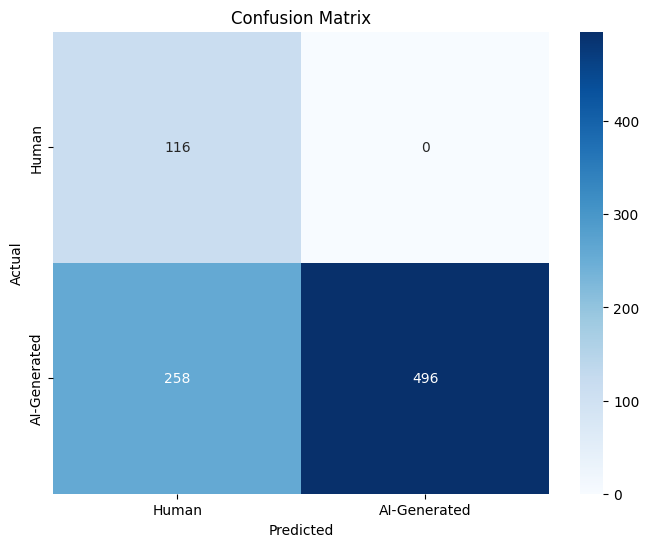

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       379
           1       0.90      0.88      0.89       880

    accuracy                           0.85      1259
   macro avg       0.82      0.83      0.82      1259
weighted avg       0.85      0.85      0.85      1259



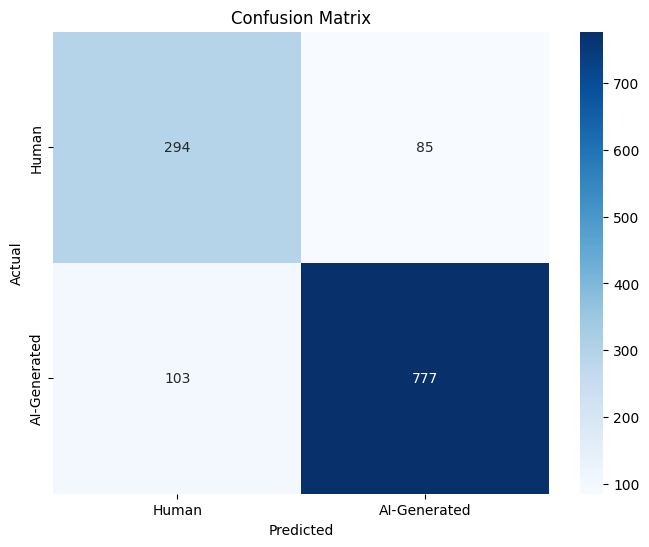

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       108
           1       0.98      0.84      0.90       262

    accuracy                           0.87       370
   macro avg       0.84      0.90      0.86       370
weighted avg       0.90      0.87      0.88       370



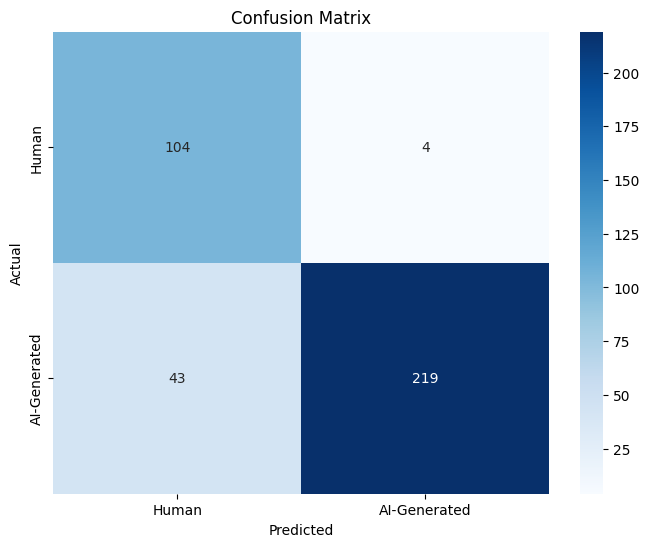

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.41      0.51        63
           1       0.82      0.93      0.87       180

    accuracy                           0.79       243
   macro avg       0.74      0.67      0.69       243
weighted avg       0.78      0.79      0.78       243



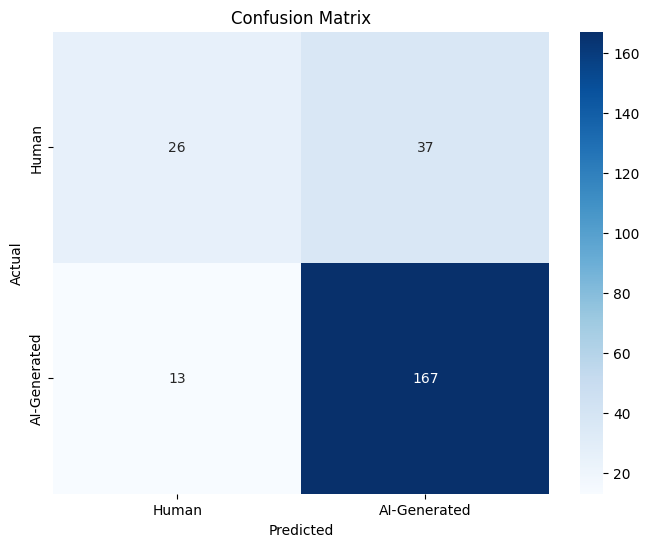

337/337 [==============================] - 31s 88ms/step
Raw Text: Your short term or ultra - short term memory is weak . Causes : # You 're young . # Personal variations ( some people inherently have strong memory some have weak ) . # Distracted mind : You 're preoccupied with something , or many things , it overwhelms your brain . You 're thinking of too many things at once . # Mtv - Youtube - Meme generation , you depended too much on visual stimulation since you were born , reading is an entirely different process , in entirely different brain parts which your rarely use . # Bad diet and lack of exercise you are what you eat . # Could be anemia . What can you do about it : # Do n't worry too much about it . # Practice , you 'll get better at it . If you 're smart enough reading will slowly creep in as one of your hobbies . Reading loudly sometime help , but it gets too boring too fast . Studying with a partner is perfect . # Exercise regularly ( cardio in open air ) . # Healthy die

In [ ]:
_evaluate_model('LSTM-word2vec')

# BERT

Code derived from : https://keras.io/api/keras_nlp/models/distil_bert/distil_bert_classifier/

In [ ]:
!pip install -q --upgrade keras-nlp
!pip install -q --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatibl

In [ ]:
import keras
import os
import keras_nlp

os.environ["KERAS_BACKEND"] = "jax"
keras.mixed_precision.set_global_policy("mixed_float16")

In [ ]:
def _evaluate_model(fn):

    # Load the saved model
    clf = load_model(f'{MODEL_PATH}/{fn}')

    # Predict test set
    y_pred_prob = clf.predict(X_test)

    # Get predicted labels from predicted probabilities
    y_pred_test = np.argmax(y_pred_prob, axis=1)

    # Generate performance matrix
    _performance_matrix(y_test['ai-generated'], y_pred_test)

    # Evaluate each type
    _evaluate_each_type(y_test, y_pred_test)

    # Get example of wrong prediction
    _get_wrong_prediction(y_pred_test)

time: 4.39 ms (started: 2024-05-07 11:15:53 +00:00)


## DistilBERT

In [ ]:
# Define callbacks

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(f'{MODEL_PATH}/distilbert.keras', monitor='val_loss', save_best_only=True)

time: 468 µs (started: 2024-05-04 13:17:20 +00:00)


In [ ]:
# Define BERT preprocessor using a preset configuration
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=256,
)

# Define BERT classifier using a preset configuration and preprocessor
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    preprocessor=preprocessor,
)

# Allow model to be trainable
classifier.trainable = True

# Compile model with specified loss function, optimizer, and jit compile option
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(1e-5),
    jit_compile=True
)

# Train model using the training data, validation data, batch size, number of epochs, and callbacks
history = classifier.fit(
    x=X_train,
    y=y_train['ai-generated'],
    validation_data=(X_val, y_val['ai-generated']),
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping, model_checkpoint]
)

100%|██████████| 580/580 [00:00<00:00, 726kB/s]
100%|██████████| 226k/226k [00:00<00:00, 699kB/s]
100%|██████████| 515/515 [00:00<00:00, 623kB/s]
100%|██████████| 253M/253M [00:07<00:00, 34.1MB/s]


Epoch 1/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 570s 249ms/step - loss: 0.1604 - sparse_categorical_accuracy: 0.9318 - val_loss: 0.0510 - val_sparse_categorical_accuracy: 0.9828
Epoch 2/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 447s 221ms/step - loss: 0.0215 - sparse_categorical_accuracy: 0.9925 - val_loss: 0.0275 - val_sparse_categorical_accuracy: 0.9915
Epoch 3/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 441s 218ms/step - loss: 0.0120 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.0510 - val_sparse_categorical_accuracy: 0.9874
Epoch 4/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 439s 218ms/step - loss: 0.0059 - sparse_categorical_accuracy: 0.9984 - val_loss: 0.0661 - val_sparse_categorical_accuracy: 0.9860
Epoch 5/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 440s 218ms/step - loss: 0.0047 - sparse_categorical_accuracy: 0.9986 - val_loss: 0.0652 - val_sparse_categorical_accuracy: 0.9822
Epoch 6/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 438s 217ms/step - loss: 0.0021 - sparse_categorical_accuracy: 0.9996 - val_loss: 0.1298 - va

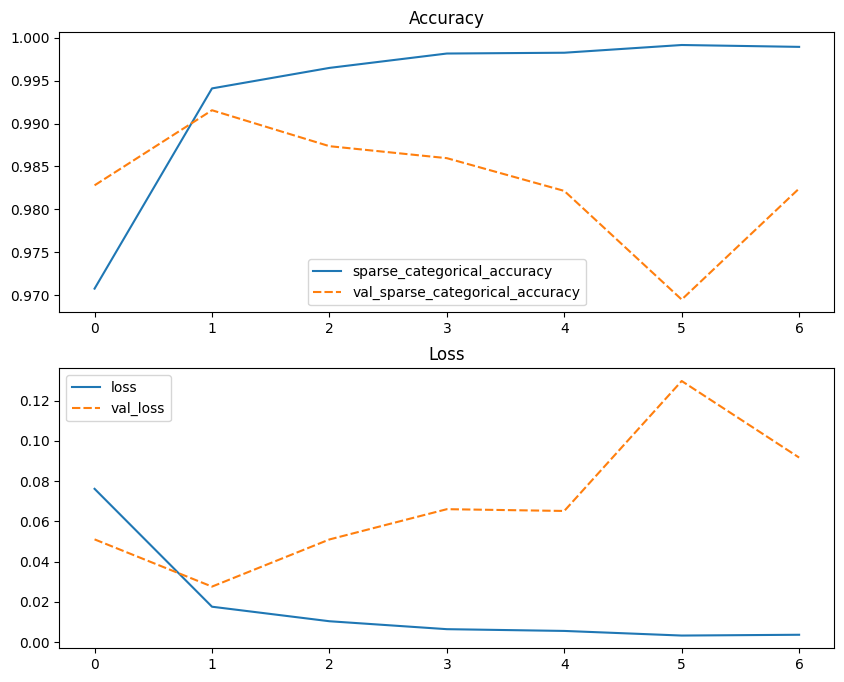

time: 591 ms (started: 2024-05-04 14:12:21 +00:00)


In [ ]:
_history_plot(history.history, metric_name=['sparse_categorical_accuracy','val_sparse_categorical_accuracy', 'loss','val_loss'])

/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 4 variables whereas the saved optimizer has 214 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 210 variables. 
  saveable.load_own_variables(weights_store.get(inner_pa

337/337 ━━━━━━━━━━━━━━━━━━━━ 50s 131ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5361
           1       0.99      1.00      0.99      5401

    accuracy                           0.99     10762
   macro avg       0.99      0.99      0.99     10762
weighted avg       0.99      0.99      0.99     10762



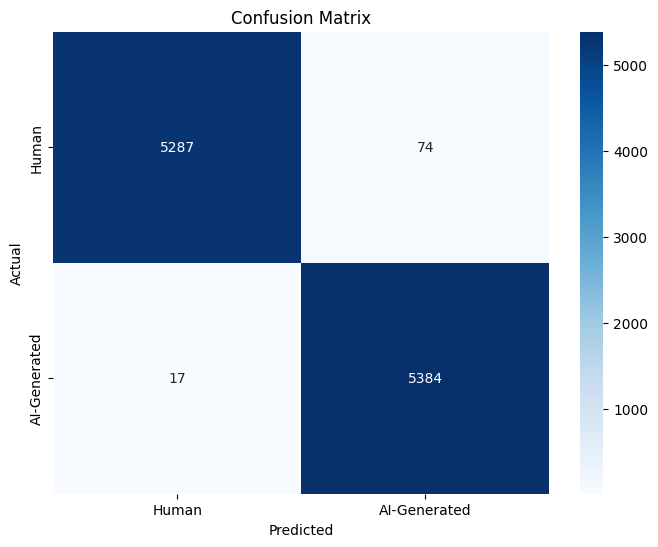

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4686
           1       0.99      1.00      0.99      3375

    accuracy                           1.00      8061
   macro avg       0.99      1.00      1.00      8061
weighted avg       1.00      1.00      1.00      8061



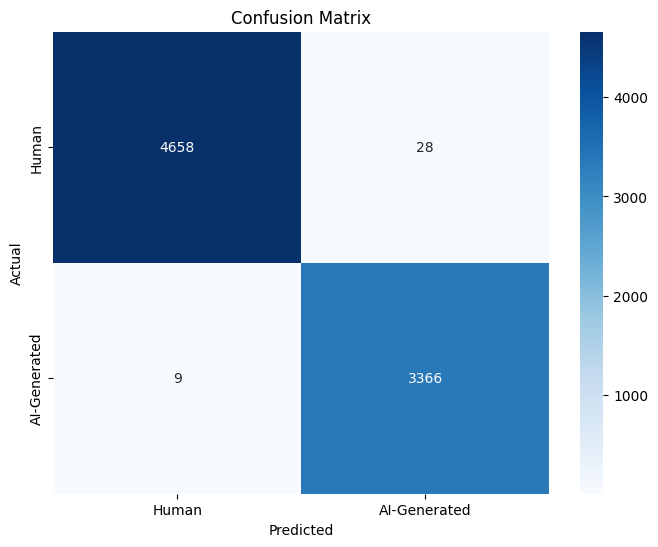

--------------------------------------------------
Evaluating finance
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       365
           1       0.98      1.00      0.99       898

    accuracy                           0.99      1263
   macro avg       0.99      0.98      0.98      1263
weighted avg       0.99      0.99      0.99      1263



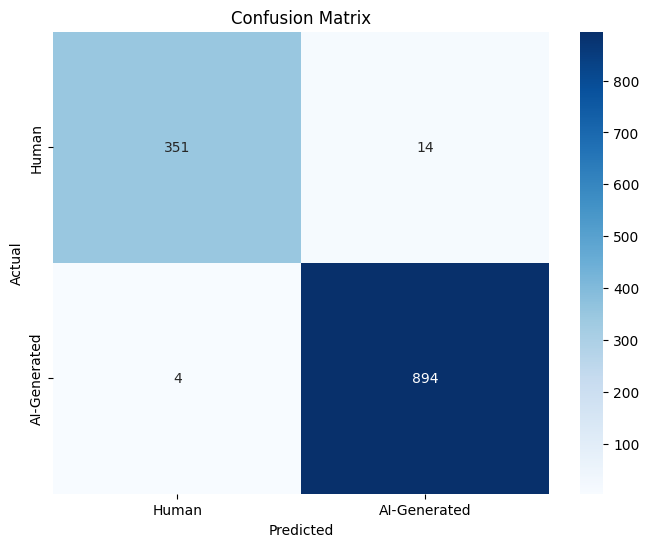

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       117
           1       0.98      1.00      0.99       695

    accuracy                           0.98       812
   macro avg       0.98      0.93      0.95       812
weighted avg       0.98      0.98      0.98       812



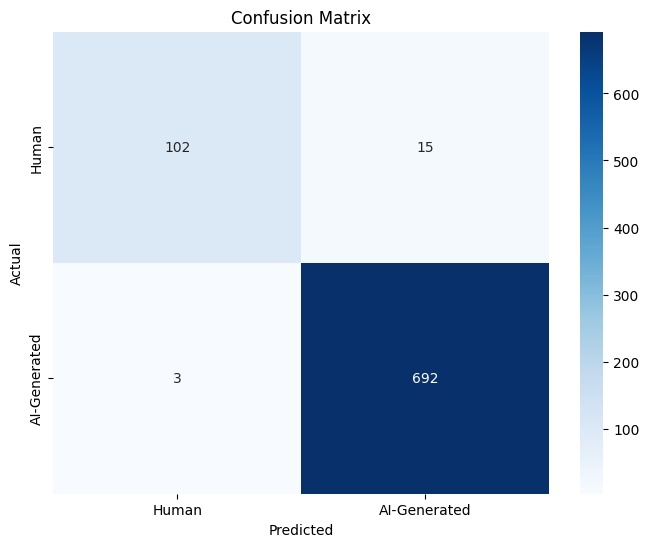

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.99      1.00      0.99       266

    accuracy                           0.99       376
   macro avg       0.99      0.99      0.99       376
weighted avg       0.99      0.99      0.99       376



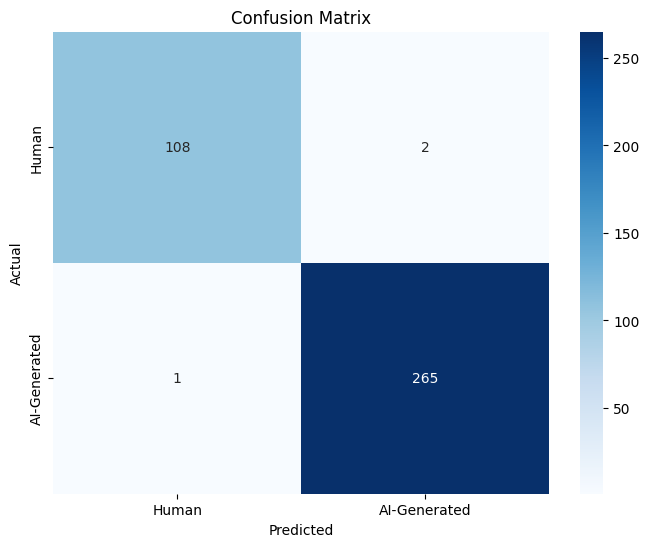

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        83
           1       0.92      1.00      0.96       167

    accuracy                           0.94       250
   macro avg       0.96      0.91      0.93       250
weighted avg       0.94      0.94      0.94       250



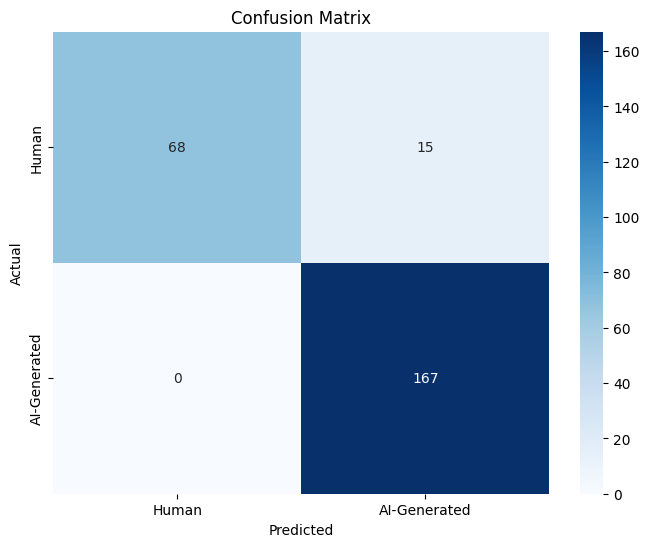

Raw Text: Interestingly , we drink the amount of water that we do drink because our kidneys are so inefficient . They can only excrete the waste substances to a maximum concentration , so we need a large amount of water to allow our urine to be excreted by our kidneys . Of course there are other reasons why we drink water . It is important to stay hydrated , and a lot of water is lost through exercise and heat .
Processed Text: interestingly we drink the amount of water that we do drink because our kidney are so inefficient they can only excrete the waste substance to a maximum concentration so we need a large amount of water to allow our urine to be excreted by our kidney of course there are other reason why we drink water it is important to stay hydrated and a lot of water is lost through exercise and heat
True Label: 0
Predicted Label: 1
Raw Text: A.I. Artificial Intelligence (also known as A.I.) is a 2001 American science fiction film directed by Steven Spielberg. The screenplay by

In [ ]:
_evaluate_model('distilbert.keras')

## BERT-Tiny

In [ ]:
# Define callbacks

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(f'{MODEL_PATH}/BERT-Tiny.keras', monitor='val_loss', save_best_only=True)

time: 481 µs (started: 2024-05-05 12:31:08 +00:00)


In [ ]:
# Without fine-tuning, by freezeing all weights

# Code derived from : https://keras.io/api/keras_nlp/models/distil_bert/distil_bert_classifier/

# Define BERT preprocessor using a preset configuration
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_tiny_en_uncased",
    sequence_length=256,
)

# Define BERT classifier using a preset configuration and preprocessor
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased",
    num_classes=2,
    preprocessor=preprocessor,
)

# Compile model with specified loss function, optimizer, and jit compile option
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(1e-5),
    jit_compile=True
)

# Freeze weight
classifier.backbone.trainable = False

# Train model using the training data, validation data, batch size, number of epochs, and callbacks
history = classifier.fit(
    x=X_train,
    y=y_train['ai-generated'],
    validation_data=(X_val, y_val['ai-generated']),
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping, model_checkpoint]
)

100%|██████████| 547/547 [00:00<00:00, 750kB/s]
100%|██████████| 226k/226k [00:00<00:00, 687kB/s]
100%|██████████| 507/507 [00:00<00:00, 704kB/s]
100%|██████████| 16.8M/16.8M [00:01<00:00, 15.6MB/s]


Epoch 1/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - loss: 0.6764 - sparse_categorical_accuracy: 0.6078 - val_loss: 0.6294 - val_sparse_categorical_accuracy: 0.7328
Epoch 2/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.6295 - sparse_categorical_accuracy: 0.7132 - val_loss: 0.5916 - val_sparse_categorical_accuracy: 0.7378
Epoch 3/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.5989 - sparse_categorical_accuracy: 0.7280 - val_loss: 0.5670 - val_sparse_categorical_accuracy: 0.7414
Epoch 4/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.5780 - sparse_categorical_accuracy: 0.7348 - val_loss: 0.5504 - val_sparse_categorical_accuracy: 0.7444
Epoch 5/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.5627 - sparse_categorical_accuracy: 0.7398 - val_loss: 0.5390 - val_sparse_categorical_accuracy: 0.7477
Epoch 6/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.5510 - sparse_categorical_accuracy: 0.7421 - val_loss: 0.5304 - val_sparse_categori

In [ ]:
# Define BERT preprocessor using a preset configuration
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_tiny_en_uncased",
    sequence_length=256,
)

# Define BERT classifier using a preset configuration and preprocessor
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased",
    num_classes=2,
    preprocessor=preprocessor,
)

# Allow model to be trainable
classifier.trainable = True

# Compile model with specified loss function, optimizer, and jit compile option
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(1e-5),
    jit_compile=True
)

# Train model using the training data, validation data, batch size, number of epochs, and callbacks
history = classifier.fit(
    x=X_train,
    y=y_train['ai-generated'],
    validation_data=(X_val, y_val['ai-generated']),
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - loss: 0.4770 - sparse_categorical_accuracy: 0.8056 - val_loss: 0.1515 - val_sparse_categorical_accuracy: 0.9512
Epoch 2/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - loss: 0.1413 - sparse_categorical_accuracy: 0.9516 - val_loss: 0.0983 - val_sparse_categorical_accuracy: 0.9667
Epoch 3/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 69s 34ms/step - loss: 0.0954 - sparse_categorical_accuracy: 0.9678 - val_loss: 0.0996 - val_sparse_categorical_accuracy: 0.9654
Epoch 4/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - loss: 0.0683 - sparse_categorical_accuracy: 0.9761 - val_loss: 0.0701 - val_sparse_categorical_accuracy: 0.9765
Epoch 5/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - loss: 0.0541 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.0637 - val_sparse_categorical_accuracy: 0.9796
Epoch 6/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - loss: 0.0419 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0628 - val_sparse_cat

/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 4 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path)

337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      5361
           1       0.78      0.82      0.80      5401

    accuracy                           0.80     10762
   macro avg       0.80      0.79      0.79     10762
weighted avg       0.80      0.80      0.79     10762



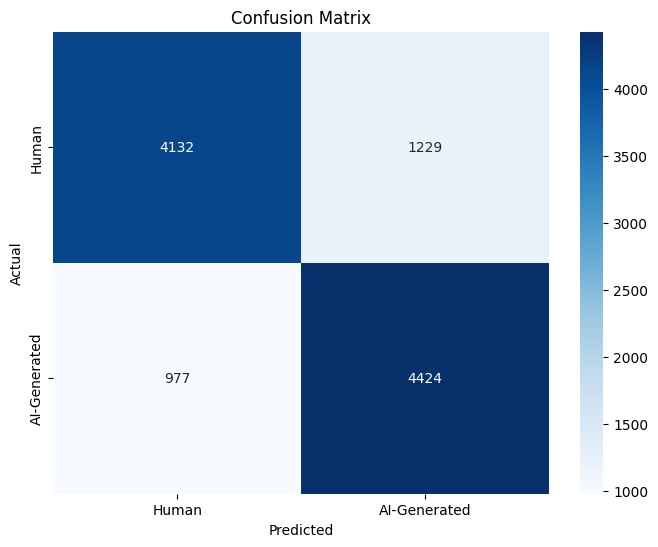

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4686
           1       0.73      0.77      0.75      3375

    accuracy                           0.79      8061
   macro avg       0.78      0.78      0.78      8061
weighted avg       0.79      0.79      0.79      8061



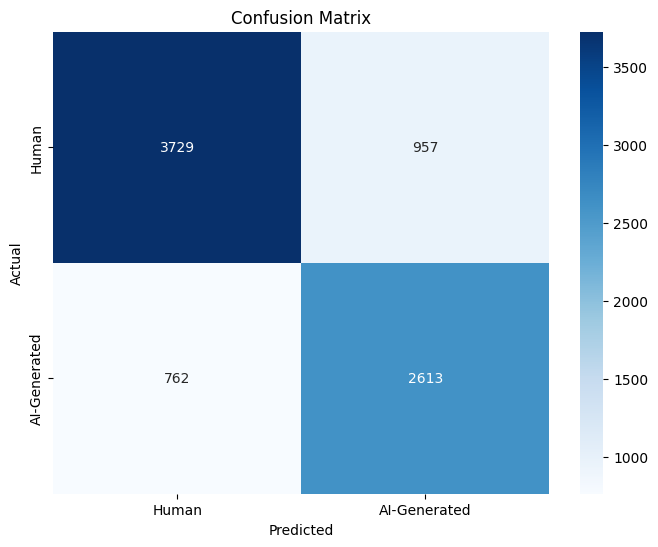

--------------------------------------------------
Evaluating finance
--------------------------------------------------
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       365
           1       0.87      0.92      0.90       898

    accuracy                           0.85      1263
   macro avg       0.82      0.79      0.81      1263
weighted avg       0.84      0.85      0.84      1263



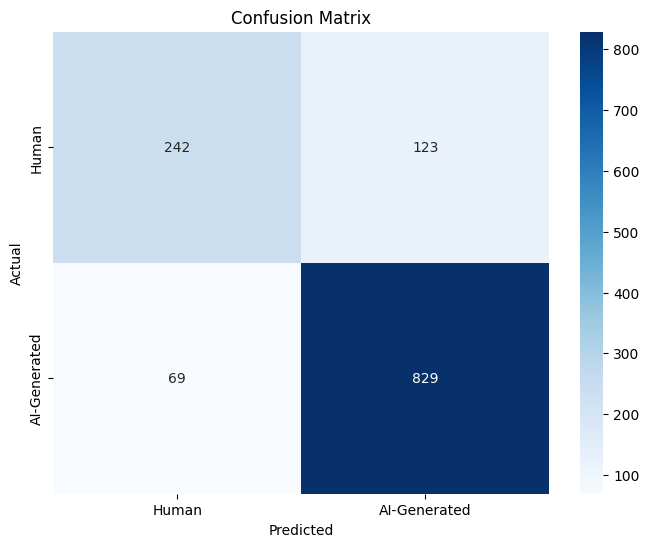

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
              precision    recall  f1-score   support

           0       0.37      0.62      0.46       117
           1       0.93      0.82      0.87       695

    accuracy                           0.79       812
   macro avg       0.65      0.72      0.67       812
weighted avg       0.85      0.79      0.81       812



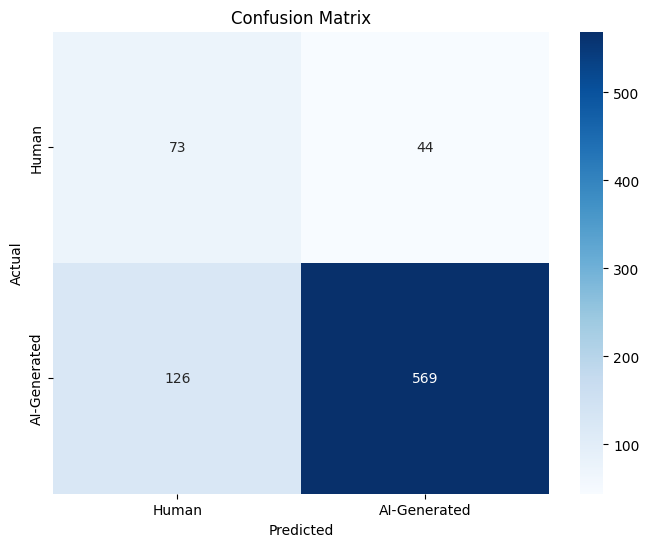

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       110
           1       0.89      0.94      0.91       266

    accuracy                           0.87       376
   macro avg       0.86      0.83      0.84       376
weighted avg       0.87      0.87      0.87       376



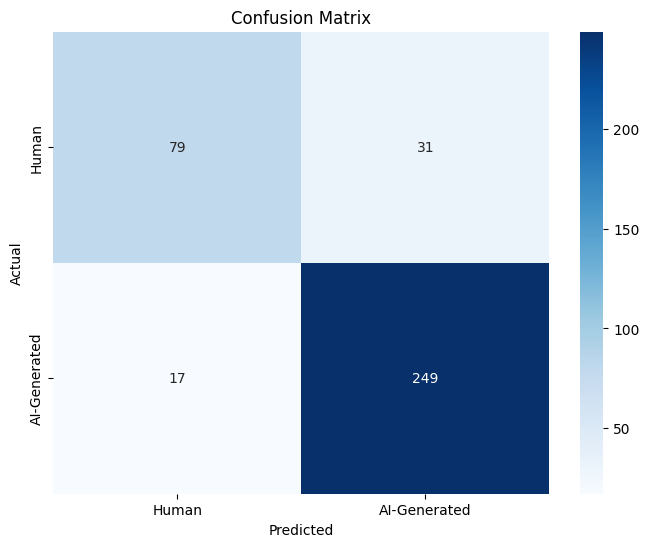

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step
              precision    recall  f1-score   support

           0       0.75      0.11      0.19        83
           1       0.69      0.98      0.81       167

    accuracy                           0.69       250
   macro avg       0.72      0.55      0.50       250
weighted avg       0.71      0.69      0.60       250



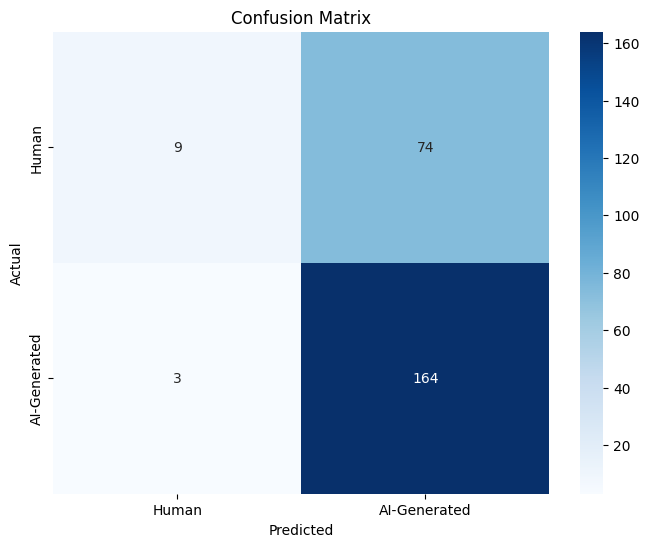

Raw Text: You can withdraw from CPP as early as 60. However, by doing so, you will permanently reduce the payments. The reduction is calculated based on average life expectancies. If you live for an average amount of time, that means you'll receive approximately the same total amount (after inflation adjustments) whether you start pulling from CPP at 60, 65, or even delay your pension later. People may have pensions through systems other than CPP. This is often true for big business or government work. They may work differently. People who retire at 55 with a pension are not getting their pension through CPP. A person retiring at 55 would need to wait at least five years to draw from the CPP, and ten years before he or she was eligible for a full pension through CPP. Canada also offers Old Age Security (OAS). This is only available once you are 65 years old or older, though this is changing. Starting in 2023, this will gradually change to 67 years or older. See this page for more detai

In [ ]:
_evaluate_model('BERT-Tiny_freeze_weight.keras')

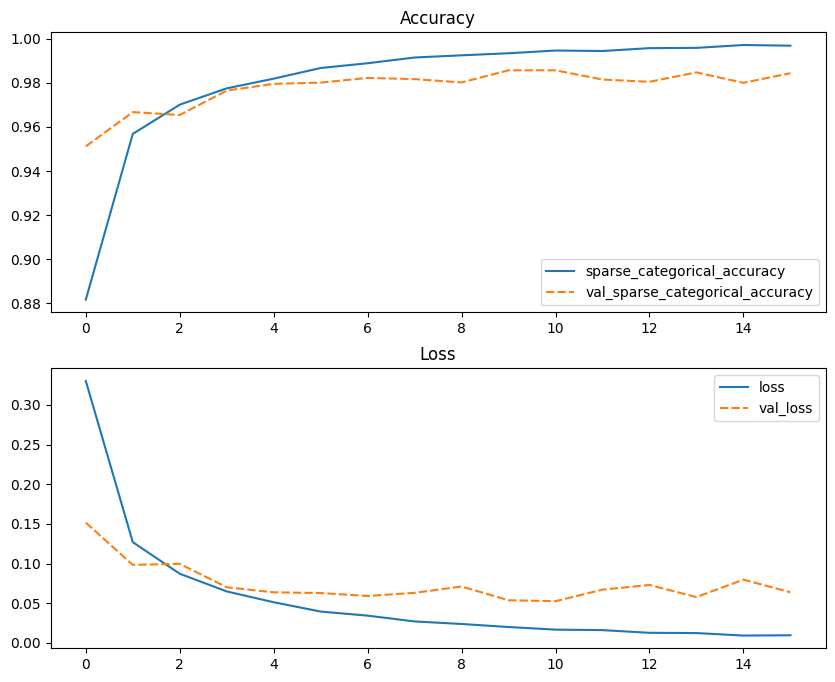

time: 604 ms (started: 2024-05-04 13:19:29 +00:00)


In [ ]:
_history_plot(history.history, metric_name=['sparse_categorical_accuracy','val_sparse_categorical_accuracy', 'loss','val_loss'])

/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 4 variables whereas the saved optimizer has 88 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 84 variables. 
  saveable.load_own_variables(weights_store.get(inner_path

337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5361
           1       0.99      0.99      0.99      5401

    accuracy                           0.99     10762
   macro avg       0.99      0.99      0.99     10762
weighted avg       0.99      0.99      0.99     10762



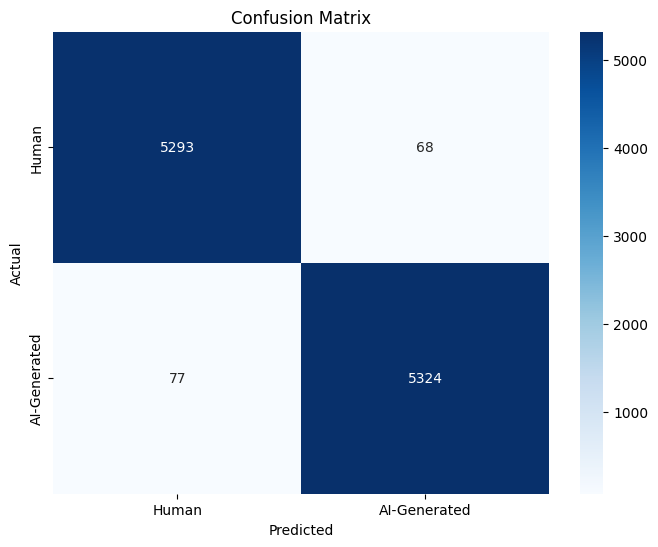

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4686
           1       0.99      0.99      0.99      3375

    accuracy                           0.99      8061
   macro avg       0.99      0.99      0.99      8061
weighted avg       0.99      0.99      0.99      8061



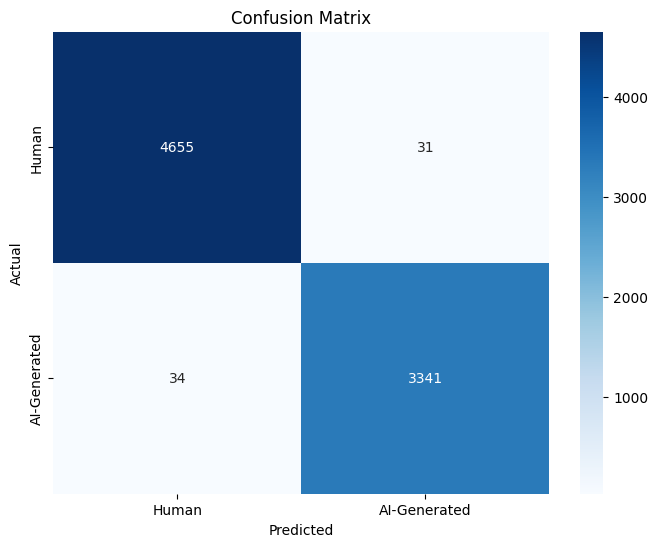

--------------------------------------------------
Evaluating finance
--------------------------------------------------
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       365
           1       0.99      0.98      0.99       898

    accuracy                           0.98      1263
   macro avg       0.97      0.98      0.98      1263
weighted avg       0.98      0.98      0.98      1263



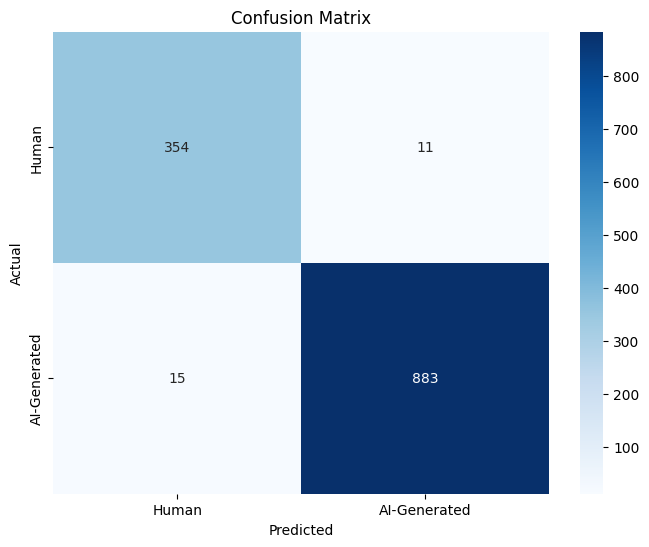

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       117
           1       0.99      0.97      0.98       695

    accuracy                           0.96       812
   macro avg       0.91      0.95      0.93       812
weighted avg       0.97      0.96      0.96       812



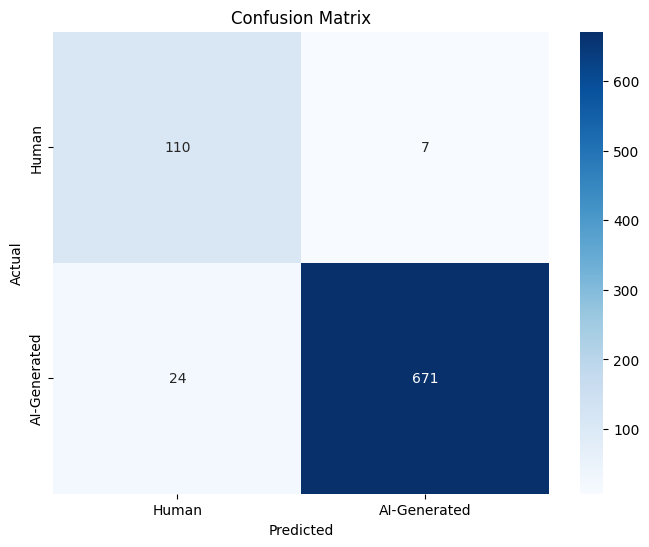

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       1.00      0.99      1.00       266

    accuracy                           0.99       376
   macro avg       0.99      1.00      0.99       376
weighted avg       0.99      0.99      0.99       376



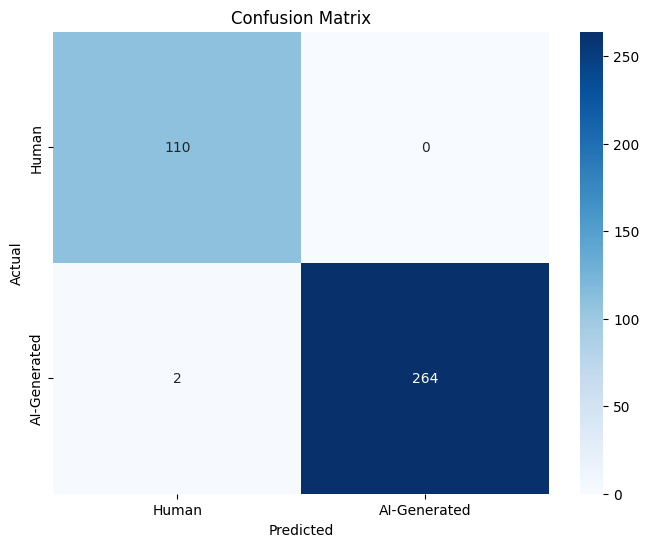

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        83
           1       0.90      0.99      0.94       167

    accuracy                           0.92       250
   macro avg       0.93      0.88      0.90       250
weighted avg       0.92      0.92      0.91       250



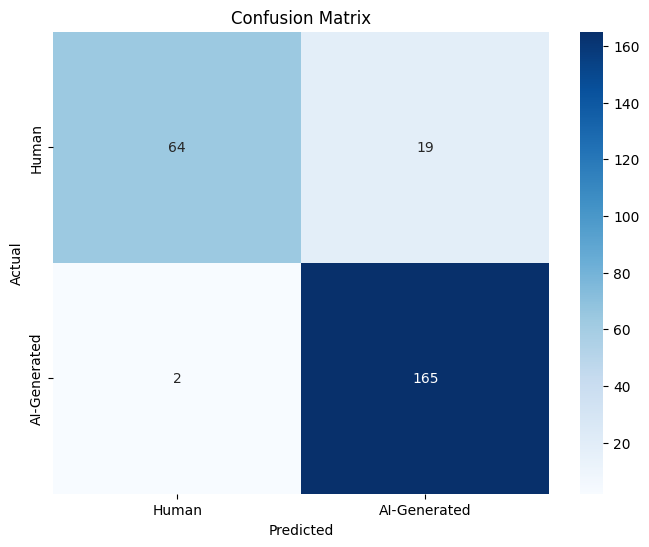

Raw Text: Different European languages have different names for Germany because they developed independently and have different ways of saying the same thing. For example, the French word for Germany is "Allemagne" and the Russian word is "Германия" (Germaniya). The English word "Germany" comes from the Old High German word "Deutschland," which means "land of the people who speak a Germanic language." The word "Saksa" is the Finnish word for Germany and it also comes from "Deutschland." So even though the names are different, they all refer to the same country.
Processed Text: different european language have different name for germany because they developed independently and have different way of saying the same thing for example the french word for germany is allemagne and the russian word is germaniya the english word germany come from the old high german word deutschland which mean land of the people who speak a germanic language the word saksa is the finnish word for germany and i

In [ ]:
_evaluate_model('BERT-Tiny.keras')

## BERT-Small

In [ ]:
# Define callbacks

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(f'{MODEL_PATH}/BERT-Small.keras', monitor='val_loss', save_best_only=True)

time: 810 µs (started: 2024-05-04 12:57:36 +00:00)


In [ ]:
# Code derived from : https://keras.io/api/keras_nlp/models/distil_bert/distil_bert_classifier/

# Define BERT preprocessor using a preset configuration
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_small_en_uncased",
    sequence_length=256,
)

# Define BERT classifier using a preset configuration and preprocessor
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_small_en_uncased",
    num_classes=2,
    preprocessor=preprocessor,
)

# Allow model to be trainable
classifier.trainable = True

# Compile model with specified loss function, optimizer, and jit compile option
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(1e-5),
    jit_compile=True
)

# Train model using the training data, validation data, batch size, number of epochs, and callbacks
history = classifier.fit(
    x=X_train,
    y=y_train['ai-generated'],
    validation_data=(X_val, y_val['ai-generated']),
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 268s 111ms/step - loss: 0.1830 - sparse_categorical_accuracy: 0.9305 - val_loss: 0.0346 - val_sparse_categorical_accuracy: 0.9889
Epoch 2/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 212s 105ms/step - loss: 0.0268 - sparse_categorical_accuracy: 0.9905 - val_loss: 0.0284 - val_sparse_categorical_accuracy: 0.9920
Epoch 3/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 192s 95ms/step - loss: 0.0153 - sparse_categorical_accuracy: 0.9954 - val_loss: 0.0503 - val_sparse_categorical_accuracy: 0.9867
Epoch 4/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 208s 103ms/step - loss: 0.0095 - sparse_categorical_accuracy: 0.9972 - val_loss: 0.0420 - val_sparse_categorical_accuracy: 0.9891
Epoch 5/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 192s 95ms/step - loss: 0.0054 - sparse_categorical_accuracy: 0.9982 - val_loss: 0.0566 - val_sparse_categorical_accuracy: 0.9859
Epoch 6/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 211s 105ms/step - loss: 0.0040 - sparse_categorical_accuracy: 0.9985 - val_loss: 0.0441 - val_

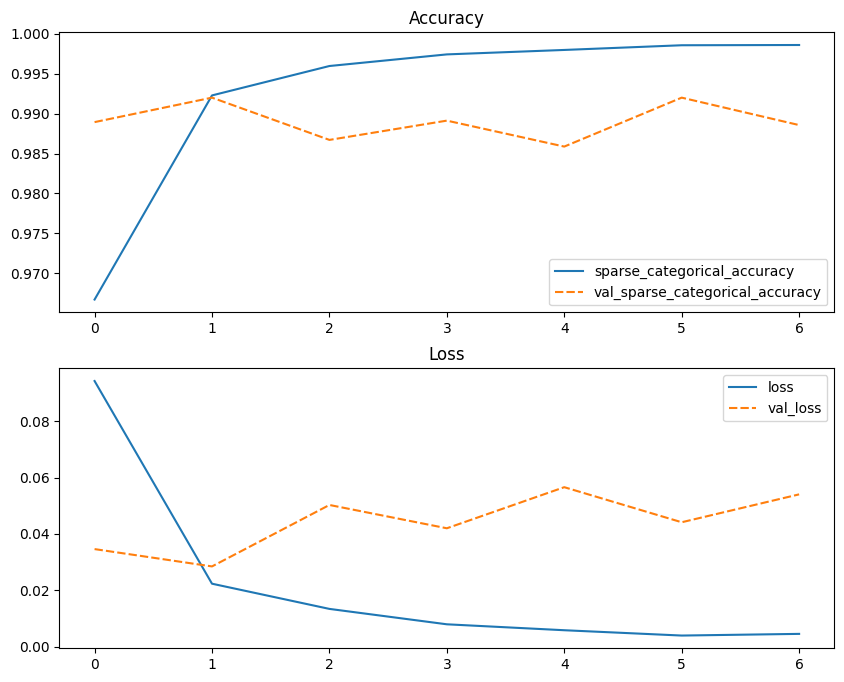

time: 525 ms (started: 2024-05-04 13:23:22 +00:00)


In [ ]:
_history_plot(history.history, metric_name=['sparse_categorical_accuracy','val_sparse_categorical_accuracy', 'loss','val_loss'])

/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 4 variables whereas the saved optimizer has 152 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 148 variables. 
  saveable.load_own_variables(weights_store.get(inner_pa

337/337 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5361
           1       0.99      1.00      0.99      5401

    accuracy                           0.99     10762
   macro avg       0.99      0.99      0.99     10762
weighted avg       0.99      0.99      0.99     10762



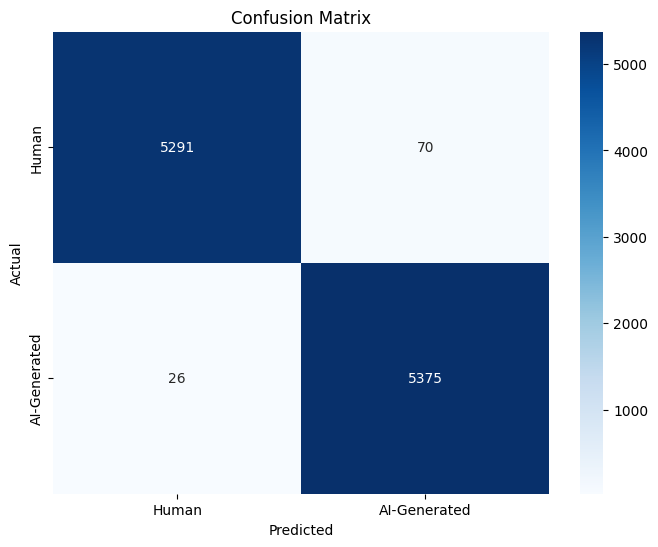

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
252/252 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4686
           1       0.99      1.00      0.99      3375

    accuracy                           0.99      8061
   macro avg       0.99      1.00      0.99      8061
weighted avg       0.99      0.99      0.99      8061



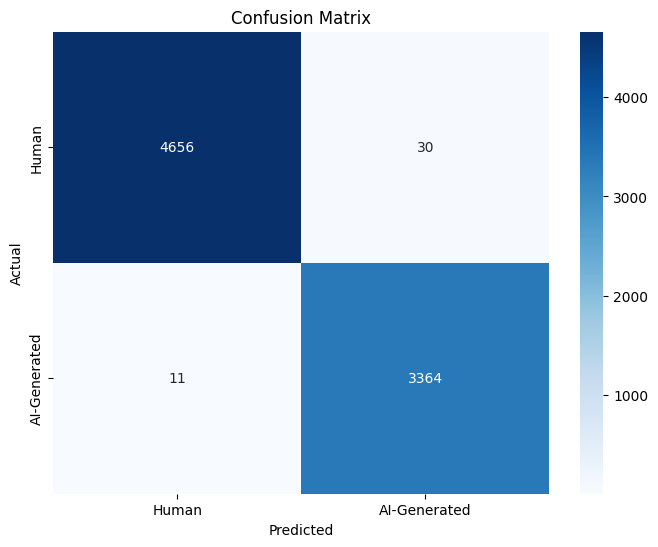

--------------------------------------------------
Evaluating finance
--------------------------------------------------
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       365
           1       0.99      0.99      0.99       898

    accuracy                           0.99      1263
   macro avg       0.98      0.98      0.98      1263
weighted avg       0.99      0.99      0.99      1263



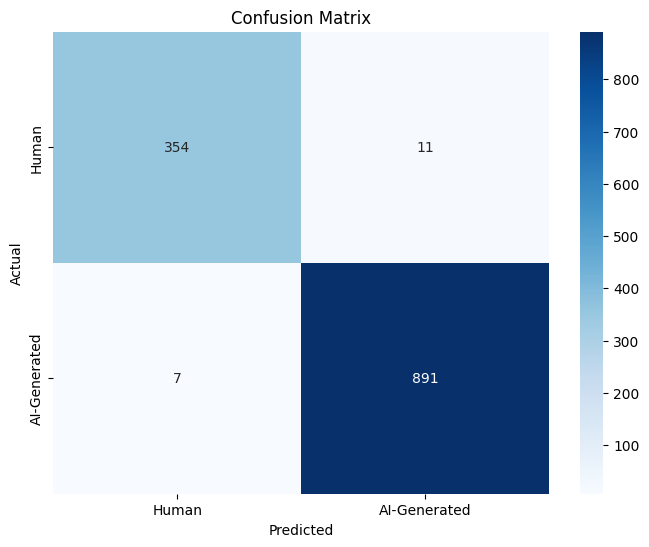

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       117
           1       0.98      0.99      0.99       695

    accuracy                           0.98       812
   macro avg       0.96      0.94      0.95       812
weighted avg       0.98      0.98      0.98       812



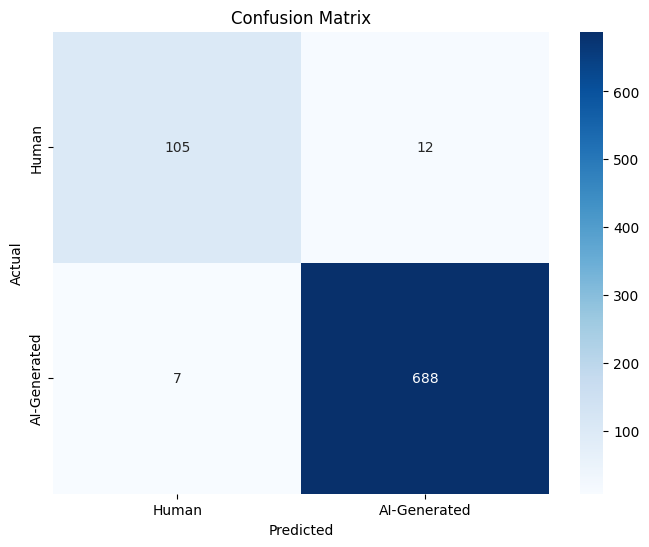

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       110
           1       1.00      1.00      1.00       266

    accuracy                           0.99       376
   macro avg       0.99      0.99      0.99       376
weighted avg       0.99      0.99      0.99       376



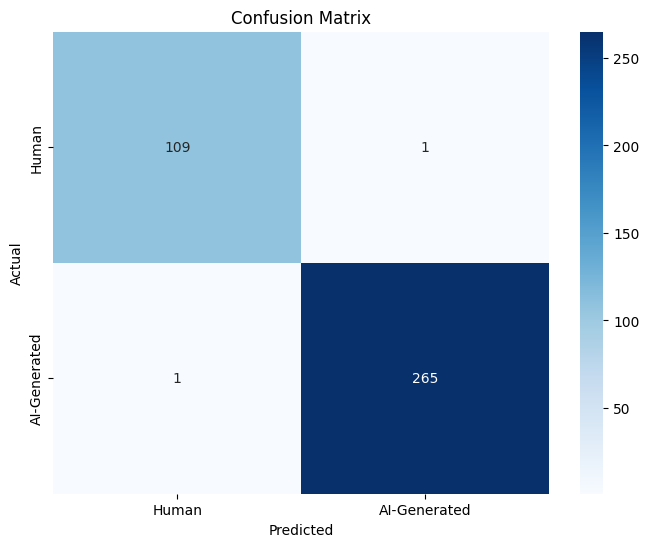

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        83
           1       0.91      1.00      0.95       167

    accuracy                           0.94       250
   macro avg       0.96      0.90      0.92       250
weighted avg       0.94      0.94      0.93       250



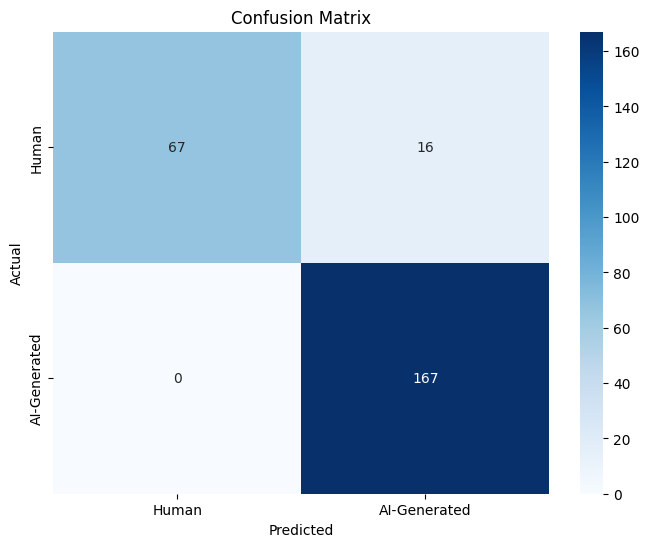

Raw Text: Interestingly , we drink the amount of water that we do drink because our kidneys are so inefficient . They can only excrete the waste substances to a maximum concentration , so we need a large amount of water to allow our urine to be excreted by our kidneys . Of course there are other reasons why we drink water . It is important to stay hydrated , and a lot of water is lost through exercise and heat .
Processed Text: interestingly we drink the amount of water that we do drink because our kidney are so inefficient they can only excrete the waste substance to a maximum concentration so we need a large amount of water to allow our urine to be excreted by our kidney of course there are other reason why we drink water it is important to stay hydrated and a lot of water is lost through exercise and heat
True Label: 0
Predicted Label: 1
Raw Text: This is called the Baader-Meinhof Phenomenon. It's a psychological phenomenon where you notice something more often after you've learned 

In [ ]:
_evaluate_model('BERT-Small.keras')

## BERT-Medium

In [ ]:
# Define callbacks

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(f'{MODEL_PATH}/BERT-Medium.keras', monitor='val_loss', save_best_only=True)

time: 604 µs (started: 2024-05-05 12:42:54 +00:00)


In [ ]:
# Code derived from : https://keras.io/api/keras_nlp/models/distil_bert/distil_bert_classifier/

# Define BERT preprocessor using a preset configuration
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_medium_en_uncased",
    sequence_length=256,
)

# Define BERT classifier using a preset configuration and preprocessor
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_medium_en_uncased",
    num_classes=2,
    preprocessor=preprocessor,
)

# Allow model to be trainable
classifier.trainable = True

# Compile model with specified loss function, optimizer, and jit compile option
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(1e-5),
    jit_compile=True
)

# Train model using the training data, validation data, batch size, number of epochs, and callbacks
history = classifier.fit(
    x=X_train,
    y=y_train['ai-generated'],
    validation_data=(X_val, y_val['ai-generated']),
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping, model_checkpoint]
)

100%|██████████| 547/547 [00:00<00:00, 513kB/s]
100%|██████████| 226k/226k [00:00<00:00, 308kB/s]
100%|██████████| 508/508 [00:00<00:00, 267kB/s]
100%|██████████| 158M/158M [00:11<00:00, 14.0MB/s]


Epoch 1/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 573s 231ms/step - loss: 0.1574 - sparse_categorical_accuracy: 0.9352 - val_loss: 0.0303 - val_sparse_categorical_accuracy: 0.9905
Epoch 2/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 414s 205ms/step - loss: 0.0209 - sparse_categorical_accuracy: 0.9934 - val_loss: 0.0368 - val_sparse_categorical_accuracy: 0.9894
Epoch 3/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 362s 179ms/step - loss: 0.0126 - sparse_categorical_accuracy: 0.9956 - val_loss: 0.0376 - val_sparse_categorical_accuracy: 0.9896
time: 23min 14s (started: 2024-05-05 12:42:54 +00:00)


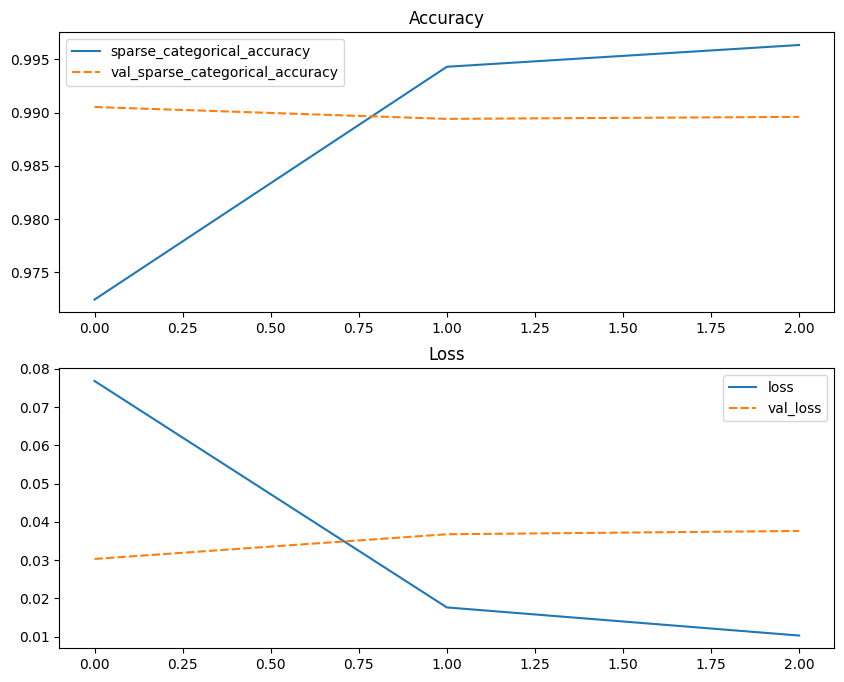

time: 960 ms (started: 2024-05-05 13:06:15 +00:00)


In [ ]:
_history_plot(history.history, metric_name=['sparse_categorical_accuracy','val_sparse_categorical_accuracy', 'loss','val_loss'])

/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 4 variables whereas the saved optimizer has 280 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 276 variables. 
  saveable.load_own_variables(weights_store.get(inner_pa

337/337 ━━━━━━━━━━━━━━━━━━━━ 42s 114ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5361
           1       0.99      1.00      0.99      5401

    accuracy                           0.99     10762
   macro avg       0.99      0.99      0.99     10762
weighted avg       0.99      0.99      0.99     10762



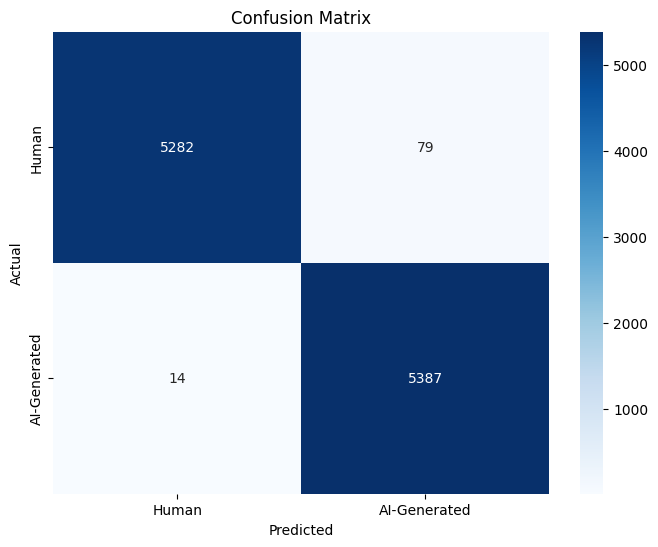

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
252/252 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4686
           1       0.99      1.00      0.99      3375

    accuracy                           0.99      8061
   macro avg       0.99      1.00      0.99      8061
weighted avg       0.99      0.99      0.99      8061



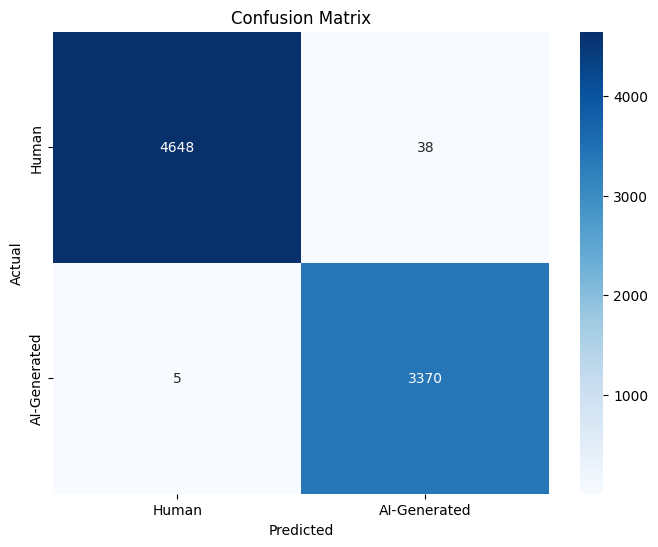

--------------------------------------------------
Evaluating finance
--------------------------------------------------
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 278ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       365
           1       0.98      1.00      0.99       898

    accuracy                           0.98      1263
   macro avg       0.99      0.97      0.98      1263
weighted avg       0.98      0.98      0.98      1263



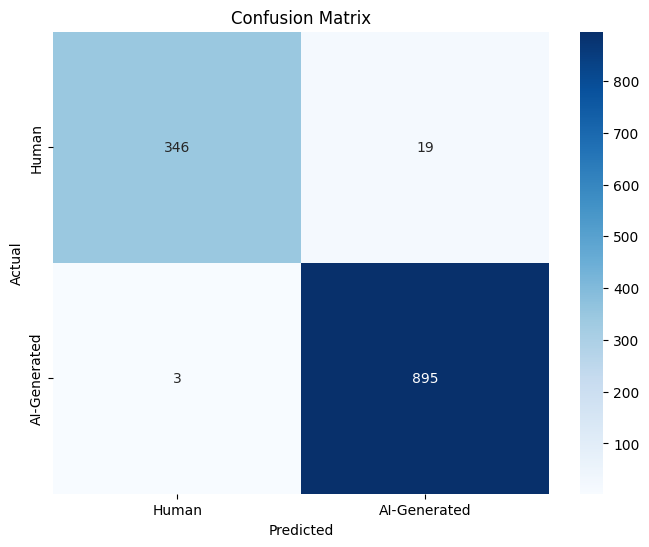

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       117
           1       0.99      0.99      0.99       695

    accuracy                           0.98       812
   macro avg       0.97      0.96      0.96       812
weighted avg       0.98      0.98      0.98       812



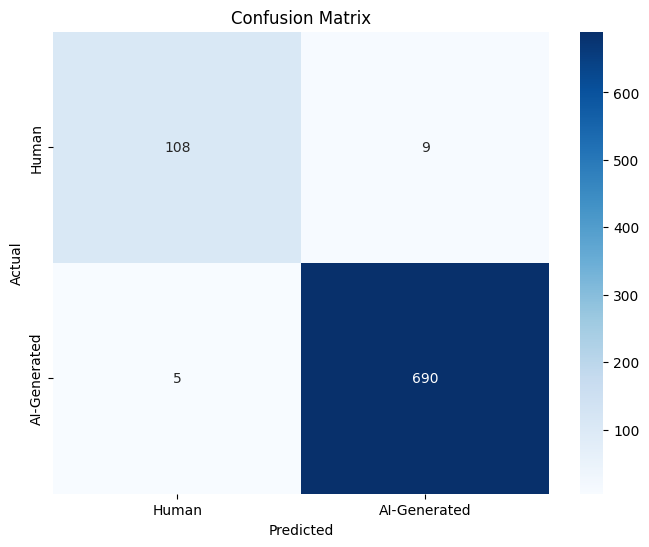

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       110
           1       1.00      1.00      1.00       266

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



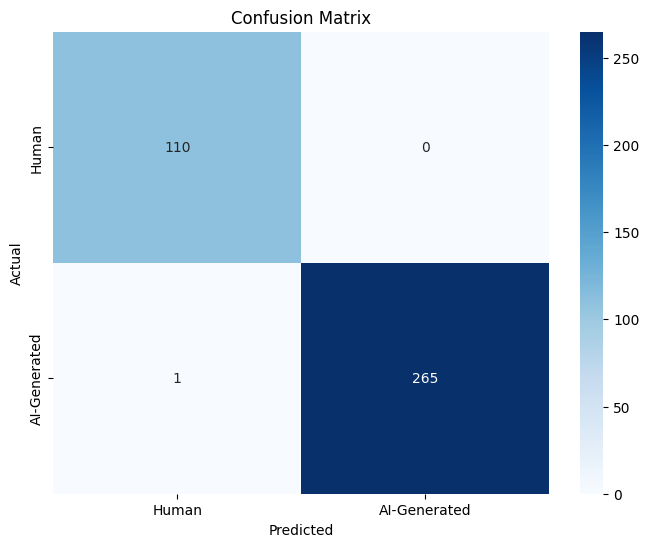

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step
              precision    recall  f1-score   support

           0       1.00      0.84      0.92        83
           1       0.93      1.00      0.96       167

    accuracy                           0.95       250
   macro avg       0.96      0.92      0.94       250
weighted avg       0.95      0.95      0.95       250



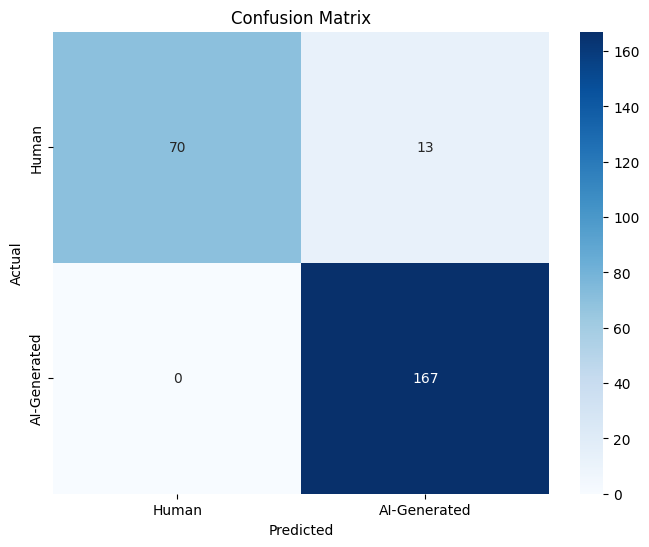

Raw Text: Interestingly , we drink the amount of water that we do drink because our kidneys are so inefficient . They can only excrete the waste substances to a maximum concentration , so we need a large amount of water to allow our urine to be excreted by our kidneys . Of course there are other reasons why we drink water . It is important to stay hydrated , and a lot of water is lost through exercise and heat .
Processed Text: interestingly we drink the amount of water that we do drink because our kidney are so inefficient they can only excrete the waste substance to a maximum concentration so we need a large amount of water to allow our urine to be excreted by our kidney of course there are other reason why we drink water it is important to stay hydrated and a lot of water is lost through exercise and heat
True Label: 0
Predicted Label: 1
Raw Text: This is called the Baader-Meinhof Phenomenon. It's a psychological phenomenon where you notice something more often after you've learned 

In [ ]:
_evaluate_model('BERT-Medium.keras')

## BERT-Base

In [ ]:
# Define callbacks

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(f'{MODEL_PATH}/BERT-Base.keras', monitor='val_loss', save_best_only=True)

time: 492 µs (started: 2024-05-05 09:51:20 +00:00)


In [ ]:
# Code derived from : https://keras.io/api/keras_nlp/models/distil_bert/distil_bert_classifier/

# Define BERT preprocessor using a preset configuration
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_base_en_uncased",
    sequence_length=256,
)

# Define BERT classifier using a preset configuration and preprocessor
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en_uncased",
    num_classes=2,
    preprocessor=preprocessor,
)

# Allow model to be trainable
classifier.trainable = True

# Compile model with specified loss function, optimizer, and jit compile option
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(1e-5),
    jit_compile=True
)

# Train model using the training data, validation data, batch size, number of epochs, and callbacks
history = classifier.fit(
    x=X_train,
    y=y_train['ai-generated'],
    validation_data=(X_val, y_val['ai-generated']),
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping, model_checkpoint]
)

100%|██████████| 547/547 [00:00<00:00, 680kB/s]
100%|██████████| 226k/226k [00:00<00:00, 309kB/s]
100%|██████████| 510/510 [00:00<00:00, 520kB/s]
100%|██████████| 418M/418M [00:28<00:00, 15.6MB/s]


Epoch 1/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 1142s 504ms/step - loss: 0.1390 - sparse_categorical_accuracy: 0.9448 - val_loss: 0.1357 - val_sparse_categorical_accuracy: 0.9537
Epoch 2/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 919s 455ms/step - loss: 0.0185 - sparse_categorical_accuracy: 0.9946 - val_loss: 0.0414 - val_sparse_categorical_accuracy: 0.9881
Epoch 3/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 922s 457ms/step - loss: 0.0084 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.0241 - val_sparse_categorical_accuracy: 0.9927
Epoch 4/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 907s 449ms/step - loss: 0.0071 - sparse_categorical_accuracy: 0.9977 - val_loss: 0.0557 - val_sparse_categorical_accuracy: 0.9867
Epoch 5/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 906s 449ms/step - loss: 0.0037 - sparse_categorical_accuracy: 0.9986 - val_loss: 0.0245 - val_sparse_categorical_accuracy: 0.9955
time: 1h 20min 38s (started: 2024-05-05 09:51:22 +00:00)


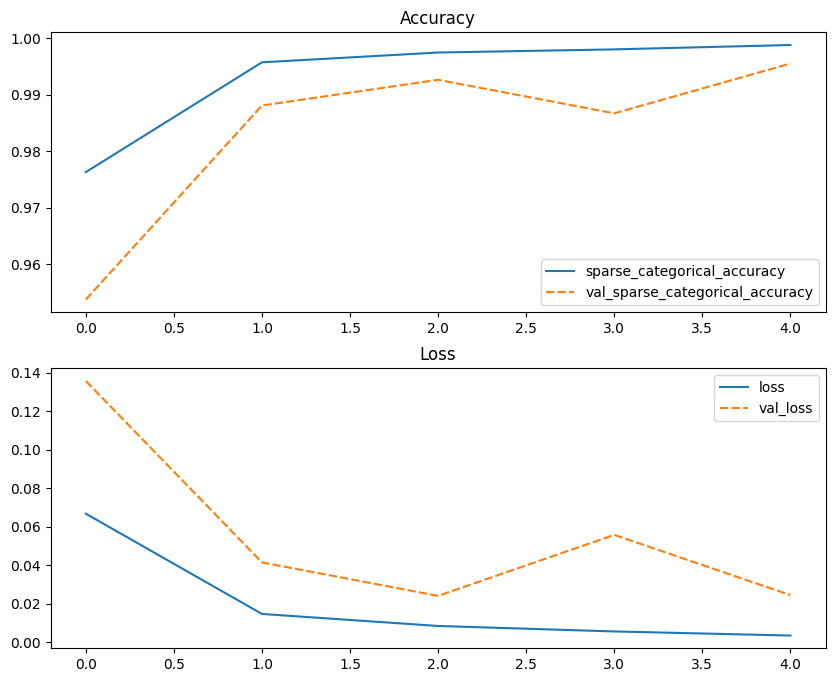

time: 521 ms (started: 2024-05-05 11:12:11 +00:00)


In [ ]:
_history_plot(history.history, metric_name=['sparse_categorical_accuracy','val_sparse_categorical_accuracy', 'loss','val_loss'])

/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 4 variables whereas the saved optimizer has 408 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 404 variables. 
  saveable.load_own_variables(weights_store.get(inner_pa

337/337 ━━━━━━━━━━━━━━━━━━━━ 96s 274ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5361
           1       0.99      1.00      0.99      5401

    accuracy                           0.99     10762
   macro avg       0.99      0.99      0.99     10762
weighted avg       0.99      0.99      0.99     10762



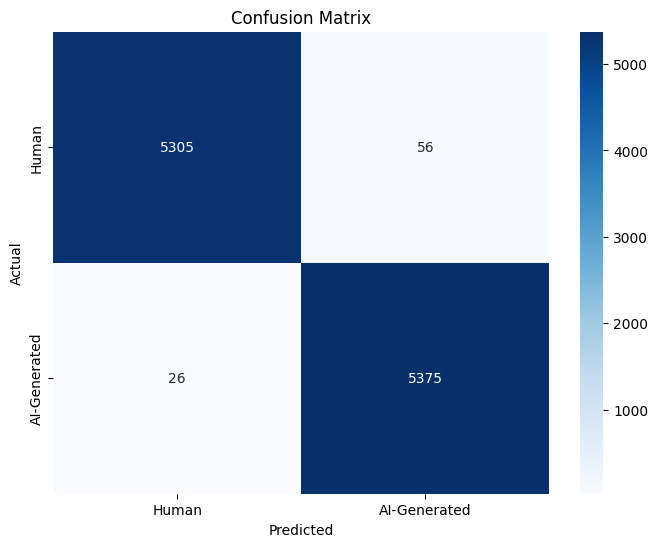

--------------------------------------------------
Evaluating reddit_eli5
--------------------------------------------------
252/252 ━━━━━━━━━━━━━━━━━━━━ 67s 268ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4686
           1       0.99      1.00      1.00      3375

    accuracy                           1.00      8061
   macro avg       1.00      1.00      1.00      8061
weighted avg       1.00      1.00      1.00      8061



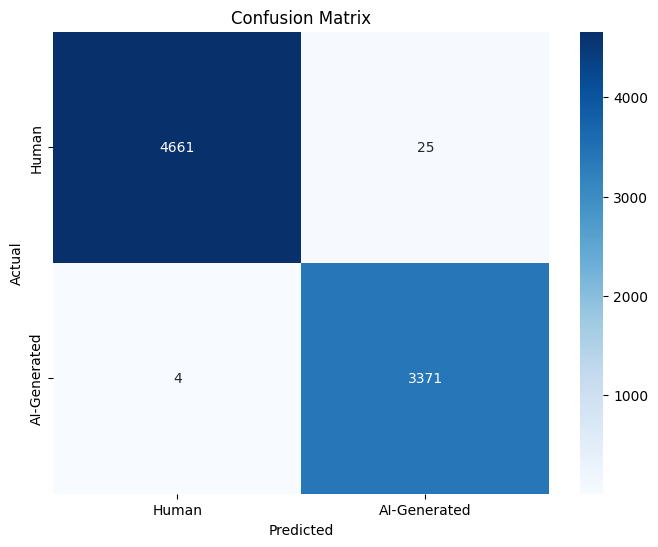

--------------------------------------------------
Evaluating finance
--------------------------------------------------
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 288ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       365
           1       0.98      0.99      0.99       898

    accuracy                           0.98      1263
   macro avg       0.98      0.97      0.98      1263
weighted avg       0.98      0.98      0.98      1263



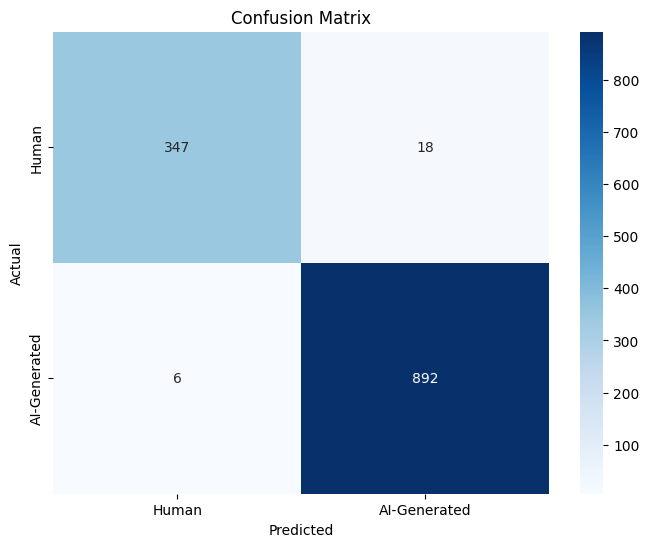

--------------------------------------------------
Evaluating open_qa
--------------------------------------------------
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       117
           1       0.99      0.98      0.98       695

    accuracy                           0.97       812
   macro avg       0.93      0.96      0.94       812
weighted avg       0.97      0.97      0.97       812



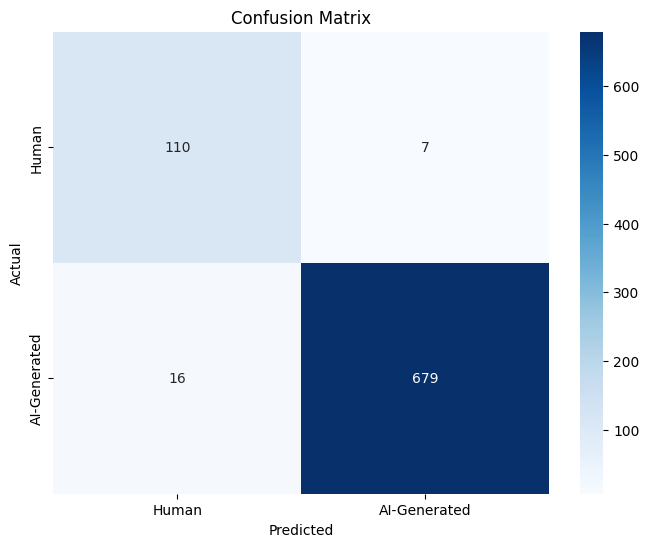

--------------------------------------------------
Evaluating medicine
--------------------------------------------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       266

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



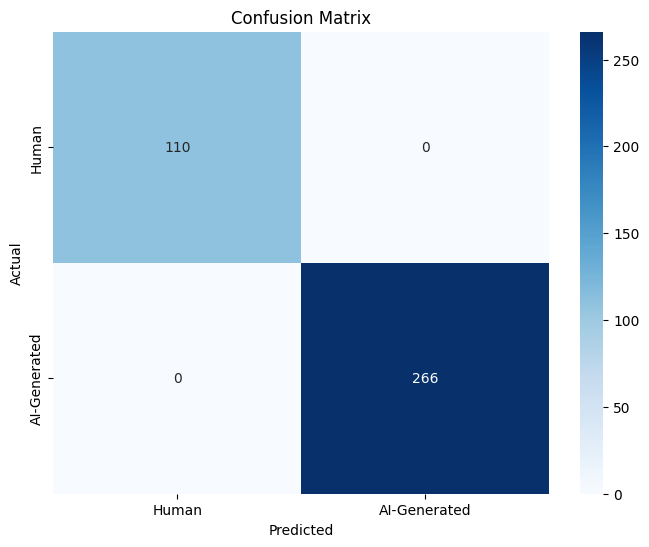

--------------------------------------------------
Evaluating wiki_csai
--------------------------------------------------
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 442ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        83
           1       0.97      1.00      0.98       167

    accuracy                           0.98       250
   macro avg       0.98      0.96      0.97       250
weighted avg       0.98      0.98      0.98       250



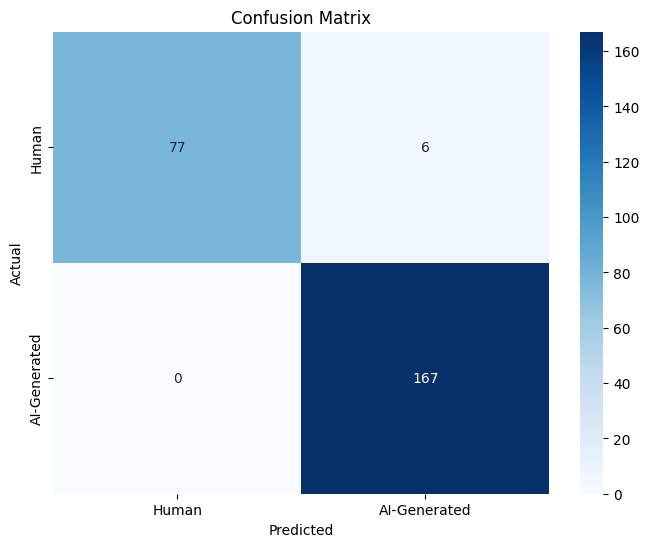

Raw Text: Interestingly , we drink the amount of water that we do drink because our kidneys are so inefficient . They can only excrete the waste substances to a maximum concentration , so we need a large amount of water to allow our urine to be excreted by our kidneys . Of course there are other reasons why we drink water . It is important to stay hydrated , and a lot of water is lost through exercise and heat .
Processed Text: interestingly we drink the amount of water that we do drink because our kidney are so inefficient they can only excrete the waste substance to a maximum concentration so we need a large amount of water to allow our urine to be excreted by our kidney of course there are other reason why we drink water it is important to stay hydrated and a lot of water is lost through exercise and heat
True Label: 0
Predicted Label: 1
Raw Text: The kidneys are a pair of organs located in the abdomen, on either side of the spine. They are responsible for filtering waste products a

In [ ]:
_evaluate_model('BERT-Base.keras')